# Anticipez les besoins en consommation électrique de bâtiments

# Exploration des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Lire fichier 2015
df_build_2015_original = pd.read_csv('2015-building-energy-benchmarking.csv')

# Lire fichier 2016
df_build_2016_original = pd.read_csv('2016-building-energy-benchmarking.csv')

In [2]:
# Travailler avec des copies des df

df_build_2015 = df_build_2015_original.copy()

df_build_2016 = df_build_2016_original.copy()

## Data Set 2015

### Informations sur fichier 2015 

In [3]:
# Dimensions du tableau 
df_build_2015.shape

(3340, 47)

In [4]:
# Informations de bases
df_build_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [5]:
# Lister toutes les colonnes 

pd.set_option('display.max_columns', None)

colonnes = list(df_build_2015.columns.values)
colonnes

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Location',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'DefaultData',
 'Comment',
 'ComplianceStatus',
 'Outlier',
 '2010 Census Tracts',

In [6]:
# Observer les types de données pour chaque colonne
df_build_2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [7]:
# Compte des différents types de données du df
df_build_2015.dtypes.value_counts()

float64    23
object     15
int64       9
dtype: int64

([<matplotlib.patches.Wedge at 0x7fceb7fa70d0>,
 [Text(-1.1993298766360605, 0.0400979676309388, 'float'),
  Text(1.0465910552405404, -0.7711336869119988, 'object'),
  Text(0.7923259573548066, 1.1542181671165073, 'int')])

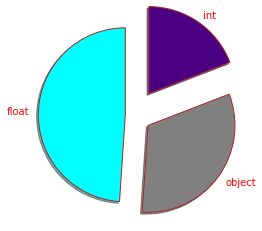

In [8]:
# Faire un graphique avec des différents types de données

piechart_2015 = df_build_2015.dtypes.value_counts()

# Rajouter légende
legende = ['float', 'object', 'int']

# Creating explode data 
explode = (0.1, 0.2, 0.3 ) 
  
# Creating color parameters 
colors = ('cyan', 
          'grey', 'indigo') 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : 'brown' } 

plt.pie(piechart_2015, 
        explode = explode,
        labels = legende, 
        shadow = True, 
        colors = colors, 
        startangle = 90, 
        wedgeprops = wp, 
        textprops = dict(color ='red'))

In [9]:
df_build_2015.sample(5)

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
1706          23109      2015  Multifamily LR (1-4)  Low-Rise Multifamily   
3243          49780      2015        NonResidential                 Other   
753           19774      2015        NonResidential          Retail Store   
2007          24062      2015  Multifamily LR (1-4)  Low-Rise Multifamily   
2151          24544      2015  Multifamily MR (5-9)  Mid-Rise Multifamily   

                             PropertyName TaxParcelIdentificationNumber  \
1706  HARBOUR HOUSE AT LESCHI CONDOMINIUM                    3110740000   
3243                          DATA CENTER                     659000905   
753      OFFICE DEPOT & CARPET LIQUIDATOR                     164000005   
2007                     MAPLE LEAF COURT                    5101400632   
2151                  POMEROY CONDOMINIUM                    6839900000   

                                               Location  CouncilDistrictCode  \
1706  {'latitude': '47.5996946', 'longitude': '-122....                    3   
3243  {'latitude': '47.61442566', 'longitude': '-122...                    7   
753   {'latitude': '47.72763881', 'longitude': '-122...                    5   
2007  {'latitude': '47.69185284', 'longitude': '-122...                    5   
2151  {'latitude': '47.613582', 'longitude': '-122.3...                    7   

     Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
1706      CENTRAL       1986                  1             3.0   
3243     DOWNTOWN       1975                  1             7.0   
753     NORTHWEST       1968                  1             1.0   
2007    NORTHEAST       1990                  1             4.0   
2151     DOWNTOWN       1999                  1             8.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1706             33331                   0                   33331   
3243             90679               35120                   55559   
753              48139                   0                   48139   
2007             37091               11395                   25696   
2151             87925                   0                   87925   

                       ListOfAllPropertyUseTypes LargestPropertyUseType  \
1706                Multifamily Housing, Parking    Multifamily Housing   
3243                        Data Center, Parking            Data Center   
753                                 Retail Store           Retail Store   
2007                         Multifamily Housing    Multifamily Housing   
2151  Multifamily Housing, Parking, Retail Store    Multifamily Housing   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1706                    27791.0                      Parking   
3243                    60000.0                      Parking   
753                     40000.0                          NaN   
2007                    37091.0                          NaN   
2151                    62708.0                      Parking   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1706                           5540.0                         NaN   
3243                          30700.0                         NaN   
753                               NaN                         NaN   
2007                              NaN                         NaN   
2151                          19642.0                Retail Store   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
1706                             NaN                      NaN   
3243                             NaN                      NaN   
753                              NaN                      NaN   
2007                             NaN                      NaN   
2151                          5744.0                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1706             70.0              28.9                28.9   
3243              N

### Extraire les données de la variable 'Location'

In [10]:
# Observer ce que contient la variable ‘Location'
df_build_2015['Location'].loc[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [11]:
# Extraire le dictionnaire contenu dans la variable ‘Location'
df_temp = df_build_2015['Location'].map(eval).apply(pd.Series)
df_temp.sample(5)

latitude     longitude  \
81    47.56261299  -122.3579283   
1482   47.7007902  -122.3272232   
1388   47.6046175  -122.3197558   
381   47.66746426  -122.3856536   
1915  47.64104323  -122.3456346   

                                          human_address  
81    {"address": "1901 SW GENESEE ST", "city": "SEA...  
1482  {"address": "115 NE 100TH ST", "city": "SEATTL...  
1388  {"address": "303 10TH AVE", "city": "SEATTLE",...  
381   {"address": "5422 SHILSHOLE AVE NW", "city": "...  
1915  {"address": "2450 AURORA AVE N", "city": "SEAT...

In [12]:
# Extraire le dictionnaire contenu dans la variable ‘human_address'
df_temp2 = df_temp['human_address'].map(eval).apply(pd.Series)
df_temp2.sample(5)

address     city state    zip
2903         1100 N 115TH ST  SEATTLE    WA  98133
1945        2815 ELLIOTT AVE  SEATTLE    WA  98121
854   3401 WALLINGFORD AVE N  SEATTLE    WA  98103
3125        11222 8TH AVE NE  SEATTLE    WA  98125
1100            275 W ROY ST  SEATTLE    WA  98119

In [13]:
# Concaténer les variables au df initial 
df_temp = pd.concat([df_temp, df_temp2], axis=1)
                     #objs, join='outer', ignore_index=False, keys=None,
                    #levels=None, names=None, verify_integrity=False, copy=True)
df_temp.sample(5)

latitude     longitude  \
2142   47.5309583  -122.3320685   
2185  47.52131741  -122.3668974   
1543  47.67142845  -122.3844528   
1499  47.55048046  -122.2881537   
142    47.6572102  -122.3375797   

                                          human_address            address  \
2142  {"address": "121 S KENYON ST", "city": "SEATTL...    121 S KENYON ST   
2185  {"address": "2600 SW BARTON ST", "city": "SEAT...  2600 SW BARTON ST   
1543  {"address": "5814 22ND AVE NW", "city": "SEATT...   5814 22ND AVE NW   
1499  {"address": "3512 S JUNEAU ST", "city": "SEATT...   3512 S JUNEAU ST   
142   {"address": "1610 N 41ST ST", "city": "SEATTLE...     1610 N 41ST ST   

         city state    zip  
2142  SEATTLE    WA  98108  
2185  SEATTLE    WA  98126  
1543  SEATTLE    WA  98107  
1499  SEATTLE    WA  98118  
142   SEATTLE    WA  98103

In [14]:
# Concaténer les variables au df initial 
df_build_2015 = pd.concat([df_build_2015, df_temp], axis=1)
                     #objs, join='outer', ignore_index=False, keys=None,
                    #levels=None, names=None, verify_integrity=False, copy=True)
df_build_2015.sample(5)

OSEBuildingID  DataYear          BuildingType  \
2402          25435      2015  Multifamily LR (1-4)   
2360          25295      2015  Multifamily LR (1-4)   
3191          43247      2015  Multifamily LR (1-4)   
1133          20930      2015     SPS-District K-12   
1043          20556      2015        NonResidential   

             PrimaryPropertyType                          PropertyName  \
2402        Low-Rise Multifamily            DAYSTAR RETIREMENT VILLAGE   
2360        Low-Rise Multifamily                       LAKE CITY PLACE   
3191        Low-Rise Multifamily              HARVARD CREST APARTMENTS   
1133                 K-12 School  QUEEN ANNE ELEMENTARY (SPS-DISTRICT)   
1043  Non-Refrigerated Warehouse                   ALASKA COPPER WORKS   

     TaxParcelIdentificationNumber  \
2402                    6882300020   
2360                    3997700000   
3191                    6003002130   
1133                    1689400145   
1043                    1327300012   

                                               Location  CouncilDistrictCode  \
2402  {'latitude': '47.52070698', 'longitude': '-122...                    1   
2360  {'latitude': '47.70948926', 'longitude': '-122...                    5   
3191  {'latitude': '47.61969184', 'longitude': '-122...                    3   
1133  {'latitude': '47.637673', 'longitude': '-122.3...                    7   
1043  {'latitude': '47.57410247', 'longitude': '-122...                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
2402               DELRIDGE       1990                  1             2.0   
2360                  NORTH       1997                  1             4.0   
3191                   EAST       1927                  1             3.0   
1133  MAGNOLIA / QUEEN ANNE       1925                  1             1.0   
1043       GREATER DUWAMISH       1955                  1             2.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
2402             89549                   0                   89549   
2360             55977               16544                   39433   
3191             29656                   0                   29656   
1133             48789                   0                   48789   
1043             32400                   0                   32400   

                 ListOfAllPropertyUseTypes      LargestPropertyUseType  \
2402                   Multifamily Housing         Multifamily Housing   
2360  Multifamily Housing, Office, Parking                         NaN   
3191                   Multifamily Housing         Multifamily Housing   
1133                           K-12 School                 K-12 School   
1043            Non-Refrigerated Warehouse  Non-Refrigerated Warehouse   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2402                    89549.0                          NaN   
2360                        NaN                          NaN   
3191                    29656.0                          NaN   
1133                    48789.0                          NaN   
1043                    32700.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2402                              NaN                         NaN   
2360                              NaN                         NaN   
3191                              NaN                         NaN   
1133                              NaN                         NaN   
1043                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
2402                             NaN                      NaN   
2360                             NaN                      NaN   
3191                             NaN                      NaN   
1133                             NaN                     2016   
1043                             NaN                      NaN   



### Données manquantes - NaN

<AxesSubplot:title={'center':'Remplissage des diverses colonnes du data set 2015'}>

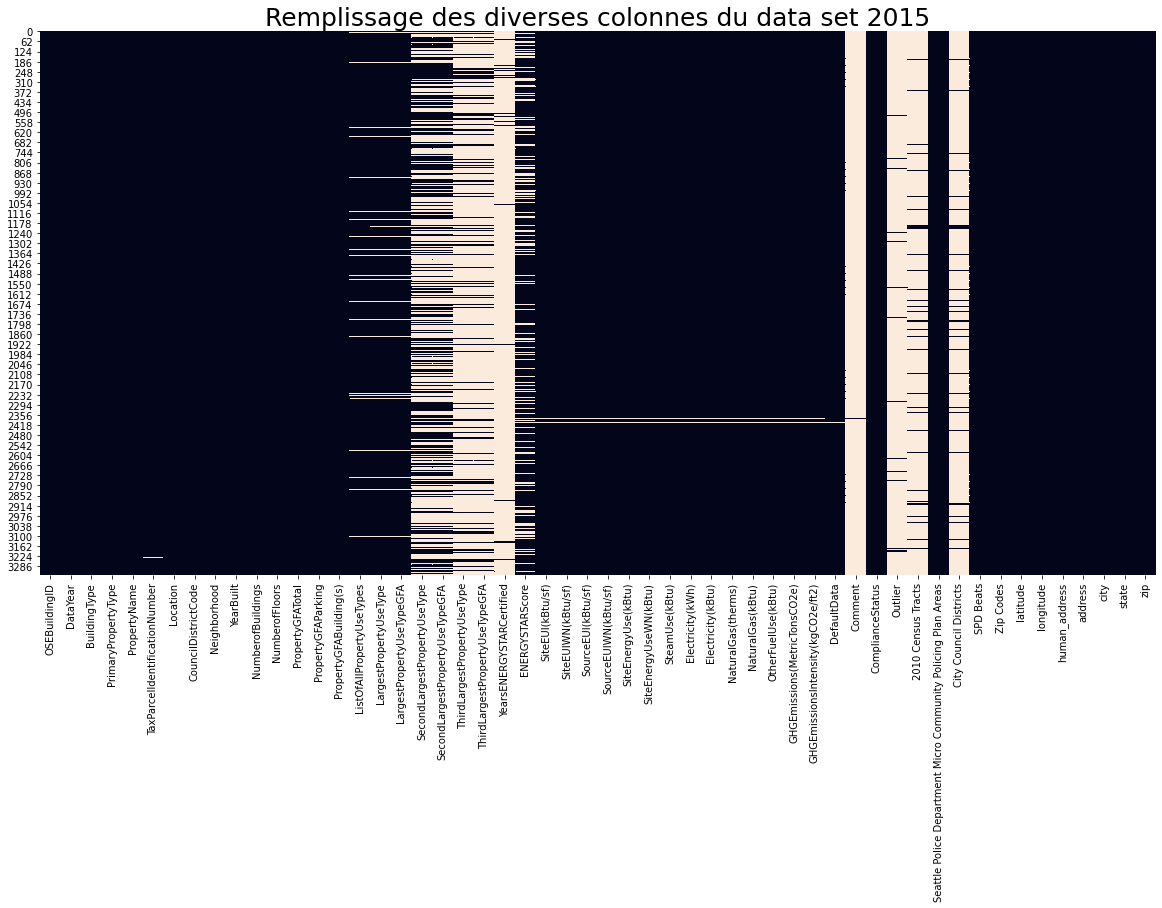

In [15]:
# Visualisation du remplissage du data set 

#Taille
plt.figure(figsize=(20,10))

# Titre 
plt.title('Remplissage des diverses colonnes du data set 2015', size=25)

# Rotation à 45° des xticks
plt.xticks(rotation=45)

sns.heatmap(df_build_2015.isna(), cbar=False) #cbar=False

In [16]:
# Taux de valeurs manquantes par colonnes
missing_rate = df_build_2015.isna().sum()/df_build_2015.shape[0]

# Trier par ordre croissant
missing_rate.sort_values(ascending=True)

OSEBuildingID                                                    0.000000
city                                                             0.000000
address                                                          0.000000
human_address                                                    0.000000
longitude                                                        0.000000
latitude                                                         0.000000
Zip Codes                                                        0.000000
ComplianceStatus                                                 0.000000
state                                                            0.000000
PropertyGFABuilding(s)                                           0.000000
PropertyGFAParking                                               0.000000
PropertyGFATotal                                                 0.000000
zip                                                              0.000000
NumberofBuildings                     

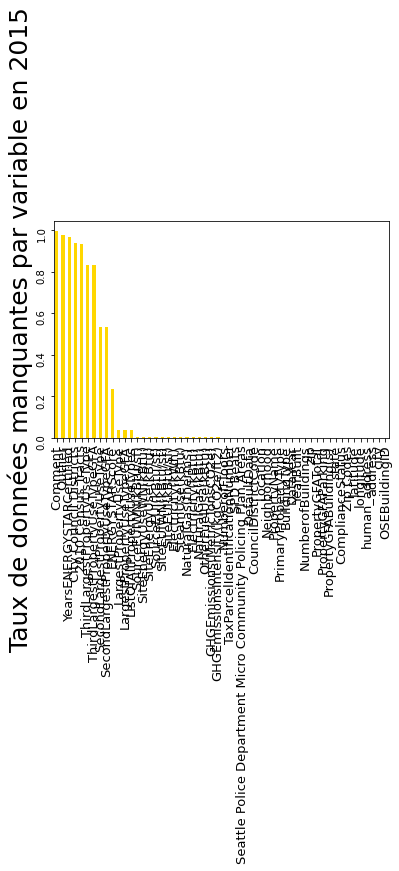

In [17]:
missing_rate.sort_values(ascending=False).plot.bar(color='gold')

# Titre
plt.ylabel('Taux de données manquantes par variable en 2015', size=25)
#plt.title()

# Taille figure
plt.rcParams['figure.figsize'] = (20,10)

# Taille xlabels
plt.xticks(size=13)

# Rotation à 90° des xticks
plt.yticks(rotation=90)

plt.show()

In [18]:
# Taux de remplissage par colonne
filling_rate = 1 - missing_rate

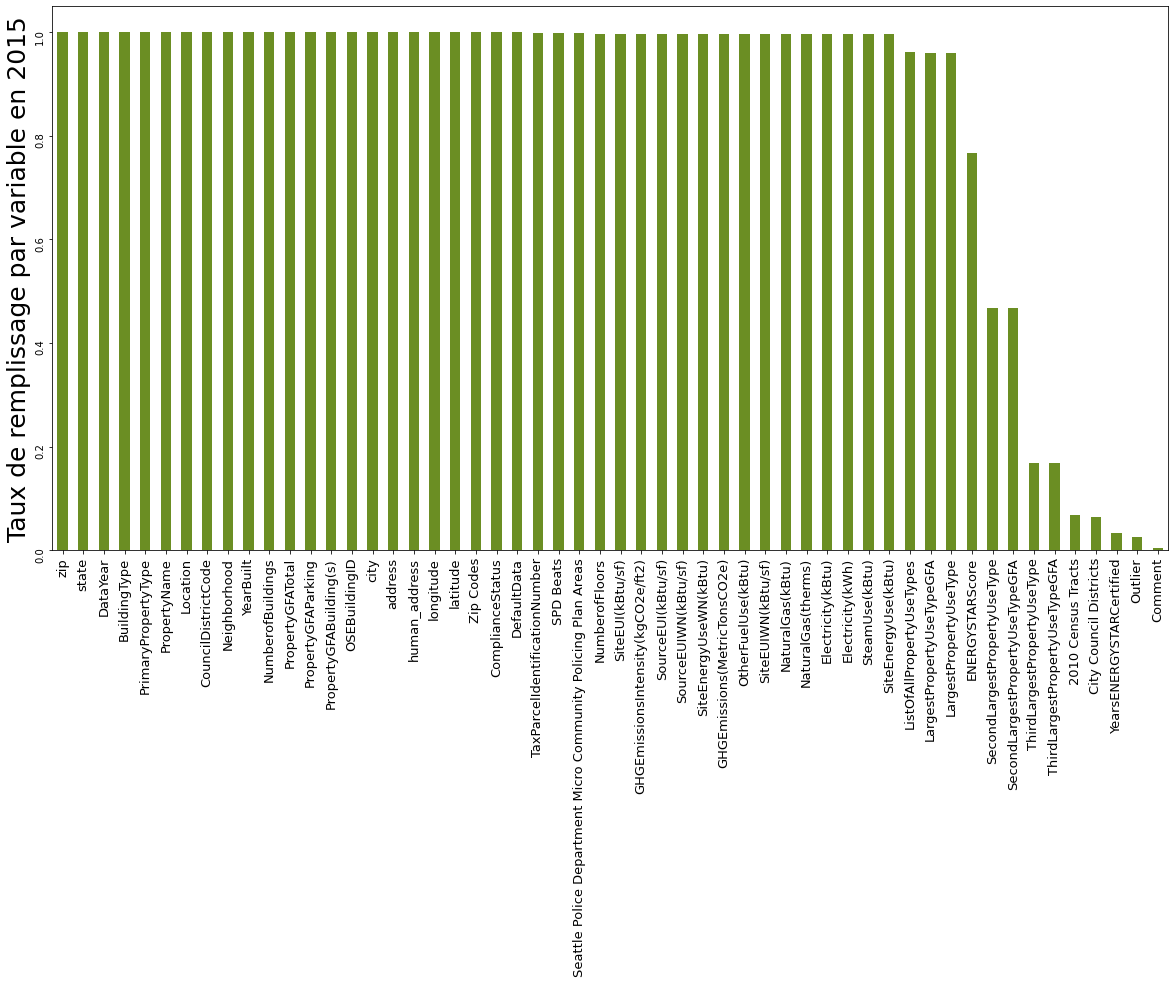

In [19]:
filling_rate.sort_values(ascending=False).plot.bar(color='olivedrab')

# Titre
plt.ylabel('Taux de remplissage par variable en 2015', size=25)
#plt.title()

# Taille figure
plt.rcParams['figure.figsize'] = (20,10)

# Taille xlabels
plt.xticks(size=13)

# Rotation à 90° des xticks
plt.yticks(rotation=90)

plt.show()

In [20]:
# Enlever les lignes remplies de NaN
df_build_2015.dropna(how='all', inplace=True)

In [21]:
# Enlever les lignes pour lesquelles OSEBuildingID est NaN
#how='any' : if one of the named columns have a missing value

df_build_2015.dropna(subset=['OSEBuildingID'], how='any', inplace=True) #inplace=True drop for real

In [22]:
df_build_2015.sample(5)

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
1323          21502      2015  Multifamily MR (5-9)  Mid-Rise Multifamily   
2651          26267      2015  Multifamily MR (5-9)  Mid-Rise Multifamily   
3019          27704      2015        NonResidential           K-12 School   
90              132      2015        NonResidential                 Other   
2956          27515      2015  Multifamily LR (1-4)  Low-Rise Multifamily   

                   PropertyName TaxParcelIdentificationNumber  \
1323           VOLTA APARTMENTS                    1977200570   
2651              CHARBERN APTS                    8804900690   
3019     NORTHEND JEWISH SCHOOL                    6413600296   
90             ROOSEVELT SQUARE                    1797500715   
2956  LESCHI SHORES CONDOMINIUM                    4279100000   

                                               Location  CouncilDistrictCode  \
1323  {'latitude': '47.613059', 'longitude': '-122.3...                    7   
2651  {'latitude': '47.61655716', 'longitude': '-122...                    3   
3019  {'latitude': '47.71920385', 'longitude': '-122...                    5   
90    {'latitude': '47.6756688', 'longitude': '-122....                    4   
2956  {'latitude': '47.59596131', 'longitude': '-122...                    3   

     Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
1323     DOWNTOWN       2010                  1             8.0   
2651         EAST       1925                  1             8.0   
3019        NORTH       1988                  1             2.0   
90      NORTHEAST       1929                  1             2.0   
2956      CENTRAL       1957                  1             4.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1323             54550               12044                   42506   
2651             57504                8147                   49357   
3019             32961                   0                   32961   
90              206934                   0                  206934   
2956             22810                   0                   22810   

                       ListOfAllPropertyUseTypes LargestPropertyUseType  \
1323  Multifamily Housing, Parking, Retail Store    Multifamily Housing   
2651                Multifamily Housing, Parking    Multifamily Housing   
3019                                 K-12 School            K-12 School   
90                                Other, Parking                  Other   
2956                         Multifamily Housing    Multifamily Housing   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1323                    41599.0                      Parking   
2651                    57504.0                      Parking   
3019                    32961.0                          NaN   
90                     119146.0                      Parking   
2956                    22810.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1323                          12044.0                Retail Store   
2651                           4369.0                         NaN   
3019                              NaN                         NaN   
90                                0.0                         NaN   
2956                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
1323                           907.0                      NaN   
2651                             NaN                      NaN   
3019                             NaN                      NaN   
90                               NaN                      NaN   
2956                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1323              NaN              52.2                52.2   
2651             96.0              29.2                33.5   
3019            

In [23]:
df_build_2015.shape

(3340, 54)

### Recherche des doublons

In [24]:
# Rechercher les doublons 

# Afficher les doublons pour la colonne 'OSEBuildingID'
df_build_2015[df_build_2015.duplicated(['OSEBuildingID'], keep=False)]

# Trier en fonction de 'OSEBuildingID'
#df_build_2015.sort_values('OSEBuildingID', inplace=True)

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, TaxParcelIdentificationNumber, Location, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), OtherFuelUse(kBtu), GHGEmissions(MetricTonsCO2e), GHGEmissionsIntensity(kgCO2e/ft2), DefaultData, Comment, ComplianceStatus, Outlier, 2010 Census Tracts, Seattle Police Department Micro Community Policing Plan Areas, City Council Districts, SPD Beats, Zip Codes, latitude, longitude, human_address, address, city, state, zip]
Index: []

### Filtrage des batiments non destinés à l'habitation

In [25]:
# Afficher toutes les occurences possibles pour 'BuildingType'

df_build_2015['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)'], dtype=object)

In [26]:
# Création d'une liste avec les bâtiments habitables

building_type_del = ['Multifamily HR (10+)', 'Multifamily MR (5-9)', 'Multifamily LR (1-4)']

In [27]:
# Boucle qui filtre en fonction de la liste 

for iteration in building_type_del:
        df_build_2015_filtered = df_build_2015[df_build_2015['BuildingType'] == iteration]
        df_build_2015.drop(df_build_2015_filtered.index, inplace=True)

In [28]:
# Vérification des valeurs possibles pour 'BuildingType'

df_build_2015['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus'], dtype=object)

### Conserver les variables pertinentes

In [29]:
# Conserver les colonnes d'intérêt  : 

# 'ENERGYSTARScore'

# 'GHGEmissions(MetricTonsCO2e)', 
# 'GHGEmissionsIntensity(kgCO2e/ft2)', 
# 'SiteEUI(kBtu/sf)', 
# 'SiteEUIWN(kBtu/sf)'

# 'OSEBuildingID'
# 'DataYear'
# 'PropertyGFABuilding(s)'
# 'LargestPropertyUseTypeGFA’
# 'BuildingType'
# 'LargestPropertyUseType'   
# 'NumberofFloors'                    
# 'YearBuilt'                         
# 'NumberofBuildings' 
# 'latitude'
# 'longitude'

# 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'

df_build_2015_new = df_build_2015[['OSEBuildingID', 'DataYear', 
                                   'ENERGYSTARScore', 'GHGEmissions(MetricTonsCO2e)', 
                                   'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEUI(kBtu/sf)', 
                                   'SiteEUIWN(kBtu/sf)', 'PropertyGFABuilding(s)', 
                                   'LargestPropertyUseTypeGFA', 'BuildingType', 
                                   'LargestPropertyUseType', 'NumberofFloors', 
                                   'YearBuilt', 'NumberofBuildings', 
                                   'latitude', 'longitude', 
                                   'SteamUse(kBtu)', 'Electricity(kBtu)',
                                   'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'
                                  ]]

In [30]:
pd.set_option('display.max_columns', None)

df_build_2015_new.sample(5)

OSEBuildingID  DataYear  ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  \
1798          23397      2015              NaN                         28.03   
414             569      2015             86.0                        184.83   
3152          33548      2015              NaN                        436.85   
3199          48287      2015              NaN                        466.95   
641             864      2015             94.0                         19.06   

      GHGEmissionsIntensity(kgCO2e/ft2)  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1798                               0.69              81.8                81.8   
414                                0.41              52.3                62.9   
3152                               4.96             146.1               154.3   
3199                               1.96             242.0               249.5   
641                                0.21               9.3                11.1   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA    BuildingType  \
1798                   28109                    28109.0  NonResidential   
414                   304052                   230140.0  NonResidential   
3152                   84000                    84300.0  NonResidential   
3199                  162157                    88698.0  NonResidential   
641                    80360                    80360.0  NonResidential   

          LargestPropertyUseType  NumberofFloors  YearBuilt  \
1798                       Other             2.0       1966   
414                       Office            14.0       1932   
3152          College/University             5.0       2006   
3199                      Office             4.0       2005   
641   Non-Refrigerated Warehouse             4.0       1987   

      NumberofBuildings     latitude     longitude  SteamUse(kBtu)  \
1798                  1  47.57061835   -122.356355             0.0   
414                   1  47.59282532  -122.3168305             0.0   
3152                  1  47.61787175  -122.3217792             0.0   
3199                  1  47.57703948  -122.3235135             0.0   
641                   1  47.70847287  -122.3018744             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  OtherFuelUse(kBtu)  
1798          2038554.0          260179.0                 0.0  
414          14232265.0         1612071.0                 0.0  
3152          4708875.0         7607318.0                 0.0  
3199         34844176.0         4218629.0                 0.0  
641            446595.0          300200.0                 0.0

### Sauvegarder les données nettoyées

In [31]:
# Enregistrer le data set nettoyé

df_build_2015_new.to_csv('df_build_2015_cleaned.csv', encoding='utf8')

## Data Set 2016

### Informations sur fichier 2016

In [32]:
# Dimensions du tableau 
df_build_2016.shape

(3376, 46)

In [33]:
# Informations de bases
df_build_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [34]:
# Lister toutes les colonnes 

colonnes = list(df_build_2016.columns.values)
colonnes

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [35]:
# Observer les types de données pour chaque colonne
df_build_2016.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [36]:
# Compte des différents types de données du df
df_build_2016.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

([<matplotlib.patches.Wedge at 0x7fcebc3000d0>,
 [Text(-1.1972025243620694, 0.08189087654365913, 'float'),
  Text(1.0084247346903723, -0.8204142578384733, 'object'),
  Text(0.8835229960638351, 1.08599590948879, 'int'),
  Text(0.10236342929569793, 1.4965031668335438, 'bool')])

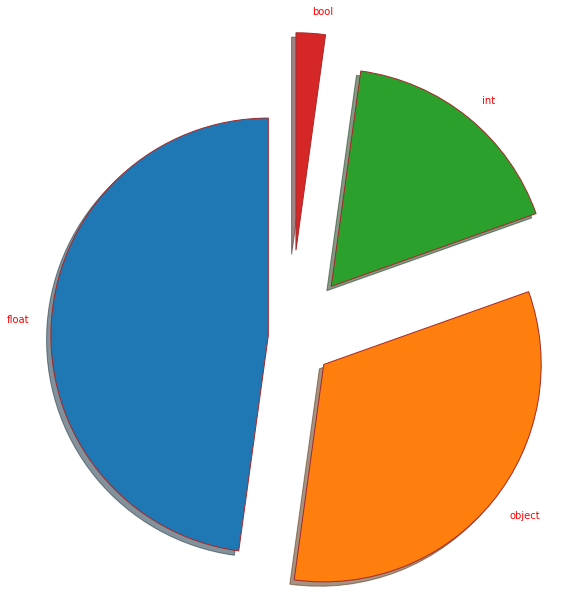

In [37]:
# Faire un graphique avec des différents types de données

piechart_2016 = df_build_2016.dtypes.value_counts()

# Rajouter légende
legende = ['float', 'object', 'int', 'bool']

# Creating explode data 
explode = (0.1, 0.2, 0.3, 0.4 ) 
  
# Creating color parameters 
colors = ('cyan', 'brown'
          'grey', 'indigo') 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : 'brown' } 

plt.pie(piechart_2016, 
        explode = explode,
        labels = legende, 
        shadow = True, 
        #colors = colors,  ## Erreur ici
        startangle = 90, 
        wedgeprops = wp, 
        textprops = dict(color ='red'))

In [38]:
df_build_2016.sample(5)

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
2576          26140      2016  Multifamily MR (5-9)    Mixed Use Property   
2411          25554      2016        NonResidential                 Other   
3101          30571      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
1350          21579      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
2998          27828      2016        NonResidential    Mixed Use Property   

                          PropertyName            Address     City State  \
2576                  Lake Union Tower    766 Garfield St  Seattle    WA   
2411                       Alaskan Way  304 Alaskan Way S  Seattle    WA   
3101  12th & Pike Building/Agnes Lofts      1433 12th Ave  Seattle    WA   
1350    Illumina Lake Union Apartments  219 E Garfield St  Seattle    WA   
2998                     905 E Pike St      905 E Pike St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
2576  98109.0                    8807900140                    7   
2411  98104.0                    5247800140                    7   
3101  98122.0                    6003500245                    3   
1350  98102.0                    2107700110                    4   
2998  98122.0                    6003000035                    3   

               Neighborhood  Latitude  Longitude  YearBuilt  \
2576  MAGNOLIA / QUEEN ANNE  47.63315 -122.34147       1995   
2411               DOWNTOWN  47.59976 -122.33514       1900   
3101                   EAST  47.61392 -122.31718       2007   
1350             LAKE UNION  47.63361 -122.32490       2005   
2998                   EAST  47.61390 -122.32034       1912   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2576                1.0               6             33978                   0   
2411                1.0               3             22200                   0   
3101                1.0               3             32881                   0   
1350                1.0               6            106524                   0   
2998                1.0               3             24000                   0   

      PropertyGFABuilding(s)  \
2576                   33978   
2411                   22200   
3101                   32881   
1350                  106524   
2998                   24000   

                              ListOfAllPropertyUseTypes  \
2576        Multifamily Housing, Office, Other, Parking   
2411                                              Other   
3101  Multifamily Housing, Non-Refrigerated Warehous...   
1350                       Multifamily Housing, Parking   
2998                        Office, Other, Retail Store   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
2576    Multifamily Housing                    15418.0   
2411                  Other                    22200.0   
3101    Multifamily Housing                    20680.0   
1350    Multifamily Housing                    59414.0   
2998                 Office                    12000.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
2576                      Parking                          10980.0   
2411                          NaN                              NaN   
3101   Non-Refrigerated Warehouse                           4758.0   
1350                      Parking                          47110.0   
2998                        Other                           6000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
2576                      Office                          2700.0   
2411                         NaN                             NaN   
3101                  Restaurant                          4653.0   
1350                         NaN                             NaN   
2998                Retail Store                          6000.0   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2576            

### Données manquantes - NaN

<AxesSubplot:title={'center':'Remplissage des diverses colonnes du data set 2016'}>

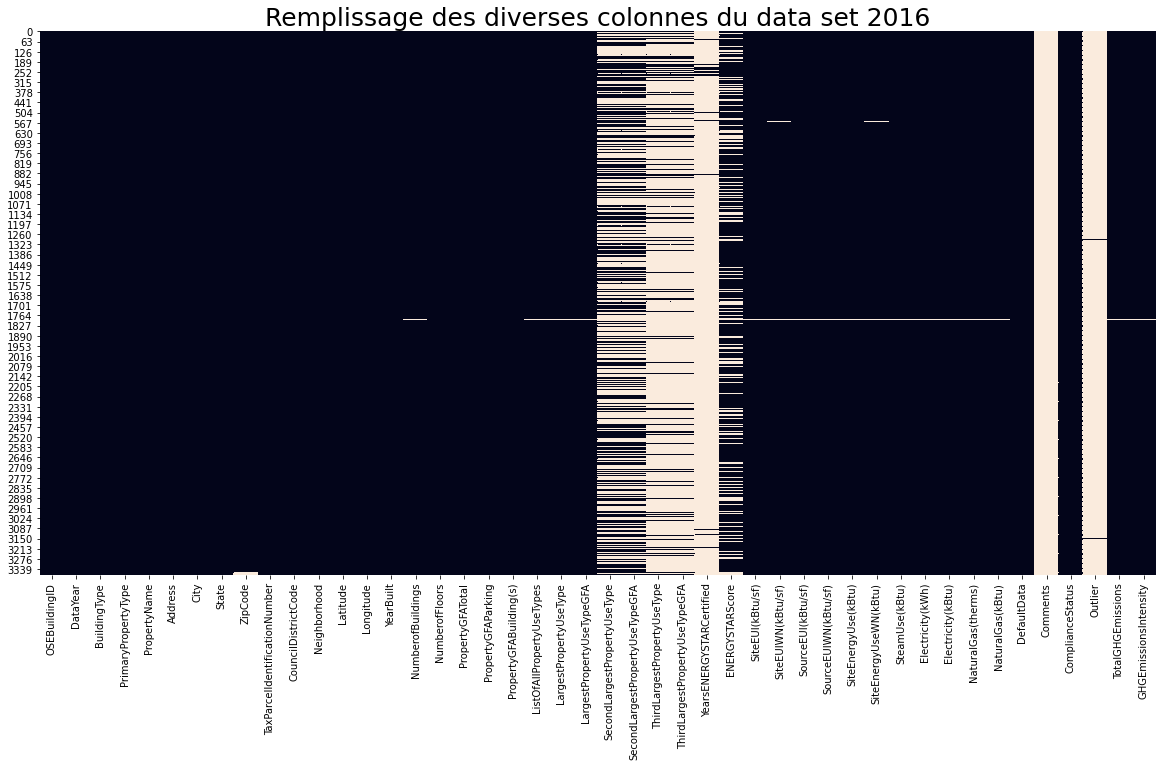

In [39]:
# Visualisation du remplissage du data set 

#Taille
plt.figure(figsize=(20,10))

# Titre 
plt.title('Remplissage des diverses colonnes du data set 2016', size=25)

# Rotation à 45° des xticks
plt.xticks(rotation=45)

sns.heatmap(df_build_2016.isna(), cbar=False) #cbar=False

In [40]:
# Taux de valeurs manquantes par colonnes
missing_rate = df_build_2016.isna().sum()/df_build_2016.shape[0]

# Trier par ordre croissant
missing_rate.sort_values(ascending=True)

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

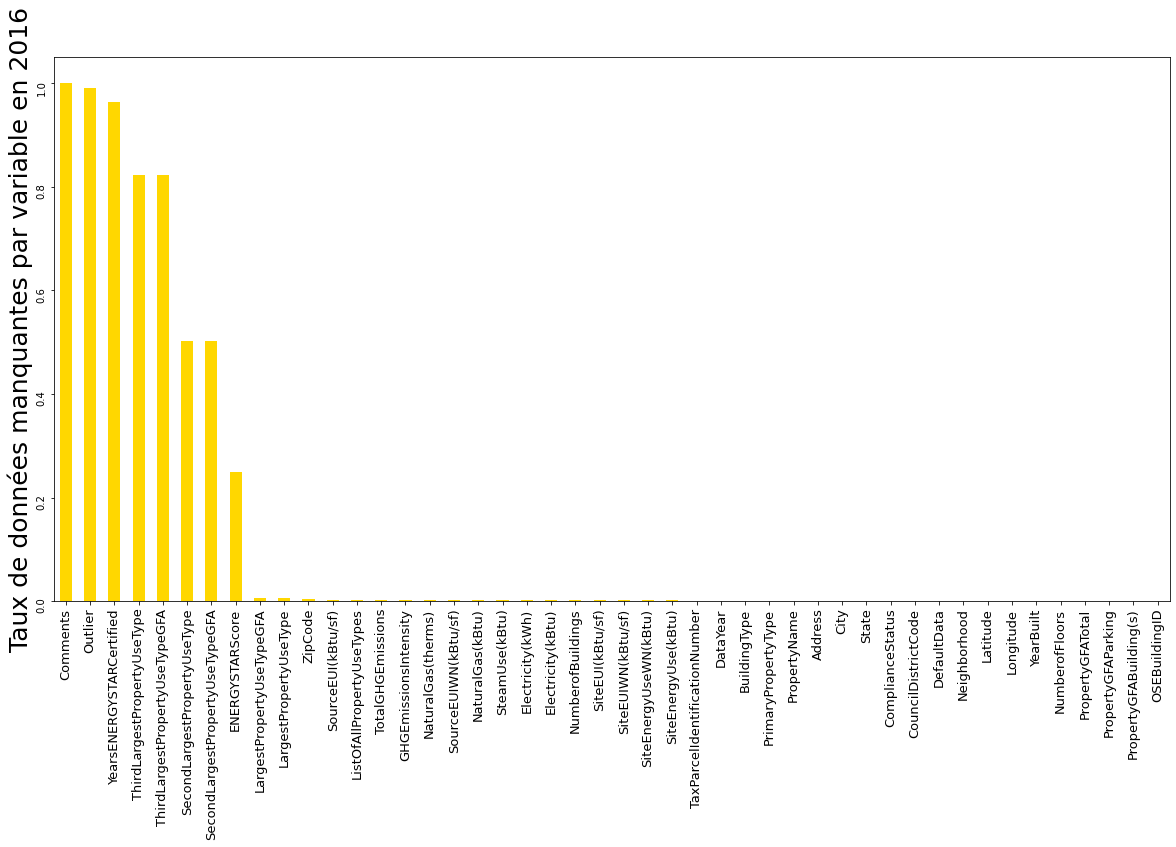

In [41]:
missing_rate.sort_values(ascending=False).plot.bar(color='gold')

# Titre
plt.ylabel('Taux de données manquantes par variable en 2016', size=25)
#plt.title()

# Taille figure
plt.rcParams['figure.figsize'] = (20,10)

# Taille xlabels
plt.xticks(size=13)

# Rotation à 90° des xticks
plt.yticks(rotation=90)

plt.show()

In [42]:
# Taux de remplissage par colonne
filling_rate = 1 - missing_rate

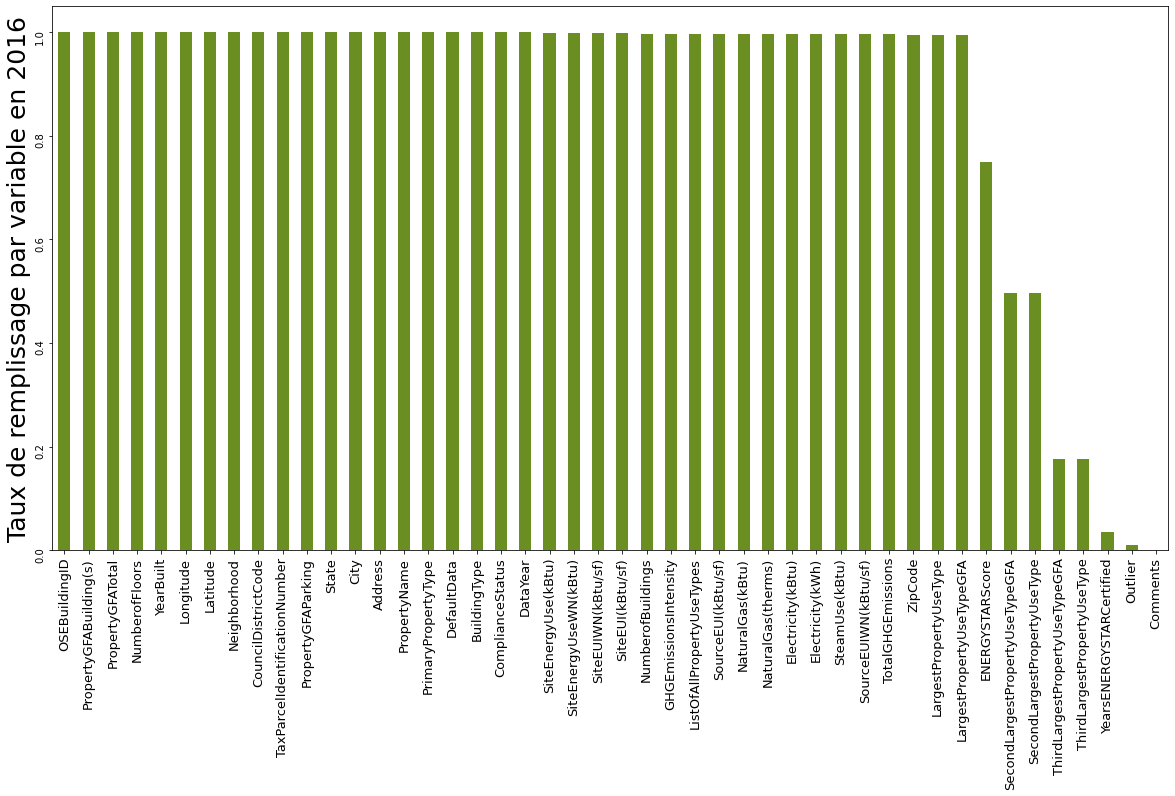

In [43]:
filling_rate.sort_values(ascending=False).plot.bar(color='olivedrab')

# Titre
plt.ylabel('Taux de remplissage par variable en 2016', size=25)
#plt.title()

# Taille figure
plt.rcParams['figure.figsize'] = (20,10)

# Taille xlabels
plt.xticks(size=13)

# Rotation à 90° des xticks
plt.yticks(rotation=90)

plt.show()

In [44]:
# Enlever les lignes remplies de NaN
df_build_2016.dropna(how='all', inplace=True)

In [45]:
# Enlever les lignes pour lesquelles 'OSEBuildingID' est NaN
#how='any' : if one of the named columns have a missing value

df_build_2016.dropna(subset=['OSEBuildingID'], how='any', inplace=True) #inplace=True drop for real

### Recherche des doublons

In [46]:
# Rechercher les doublons 

# Afficher les doublons pour la colonne 'OSEBuildingID'
df_build_2016[df_build_2016.duplicated(['OSEBuildingID'], keep=False)]

# Trier en fonction de 'OSEBuildingID'
#df_build_2016.sort_values('OSEBuildingID', inplace=True)

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

### Filtrage des batiments non destinés à l'habitation

In [47]:
# Afficher toutes les occurences possibles pour 'BuildingType'

df_build_2016['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [48]:
# Création d'une liste avec les bâtiments habitables

building_type_del = ['Multifamily HR (10+)', 'Multifamily MR (5-9)', 'Multifamily LR (1-4)']

In [49]:
# Boucle qui filtre en fonction de la liste 

for iteration in building_type_del:
        df_build_2016_filtered = df_build_2016[df_build_2016['BuildingType'] == iteration]
        df_build_2016.drop(df_build_2016_filtered.index, inplace=True)

In [50]:
df_build_2016['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

### Conserver les variables pertinentes

In [51]:
# Conserver les colonnes d'intérêt  : 

# 'ENERGYSTARScore'

# 'TotalGHGEmissions', 
# 'GHGEmissionsIntensity', 
# 'SiteEUI(kBtu/sf)', 
# 'SiteEUIWN(kBtu/sf)'

# 'OSEBuildingID'
# 'DataYear'
# 'PropertyGFABuilding(s)'
# 'LargestPropertyUseTypeGFA’
# 'BuildingType'
# 'LargestPropertyUseType'   
# 'NumberofFloors'                    
# 'YearBuilt'                         
# 'NumberofBuildings' 
# 'Latitude' 
# 'Longitude'

# 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'

df_build_2016_new = df_build_2016[['OSEBuildingID', 'DataYear', 
                                   'ENERGYSTARScore', 'TotalGHGEmissions',  
                                   'GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)', 
                                   'SiteEUIWN(kBtu/sf)', 'PropertyGFABuilding(s)', 
                                   'LargestPropertyUseTypeGFA', 'BuildingType', 
                                   'LargestPropertyUseType', 'NumberofFloors', 
                                   'YearBuilt', 'NumberofBuildings',
                                   'Latitude', 'Longitude', 
                                   'SteamUse(kBtu)', 'Electricity(kBtu)',
                                   'NaturalGas(kBtu)'
                                  ]]

#'Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)' sont une autre forme d'estimation de la target

In [52]:
df_build_2016_new.sample(5)

OSEBuildingID  DataYear  ENERGYSTARScore  TotalGHGEmissions  \
433             594      2016              NaN             107.83   
1470          21907      2016             64.0               6.99   
109             176      2016             92.0              56.82   
557             752      2016             83.0             346.62   
2770          26883      2016              NaN              34.61   

      GHGEmissionsIntensity  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
433                    0.97         21.100000           25.200001   
1470                   0.26         37.200001           37.200001   
109                    0.72         31.700001           34.000000   
557                    2.05         65.599998           68.699997   
2770                   1.34         47.200001           47.200001   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA       BuildingType  \
433                   110689                   110689.0     NonResidential   
1470                   20580                    26930.0     NonResidential   
109                    78804                    78804.0  SPS-District K-12   
557                   169020                   156414.0     NonResidential   
2770                   25864                    13364.0     NonResidential   

     LargestPropertyUseType  NumberofFloors  YearBuilt  NumberofBuildings  \
433                   Other               1       1973                0.0   
1470         Medical Office               2       1980                1.0   
109             K-12 School               3       2001                1.0   
557                  Office              11       1963                1.0   
2770    Social/Meeting Hall               3       1908                1.0   

      Latitude  Longitude  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  
433   47.55741 -122.33163            0.00           356328.0         1983486.0  
1470  47.70007 -122.32533            0.00          1002995.0               0.0  
109   47.51482 -122.25864            0.00          1645214.0          853926.0  
557   47.61481 -122.33969      2887565.25          7209495.0         1383432.0  
2770  47.60285 -122.31458            0.00           433559.0          594718.0

### Sauvegarder les données nettoyées

In [53]:
# Enregistrer le data set nettoyé

df_build_2016_new.to_csv('df_build_2016_cleaned.csv', encoding='utf8')

# Analyse statistique des variables

In [54]:
# Lire fichier : 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Lire fichier 2015
df_build_2015_clean = pd.read_csv('df_build_2015_cleaned.csv')

# Lire fichier 2016
df_build_2016_clean = pd.read_csv('df_build_2016_cleaned.csv')

In [55]:
# Travailler sur des copies

df_build_2015 = df_build_2015_clean.copy()
df_build_2016 = df_build_2016_clean.copy()

## Analyses univariées

Prédire les émissions de CO2 :
    
- Features : 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
             'BuildingType', 'LargestPropertyUseType', 
             'NumberofFloors', 'YearBuilt', 
             'NumberofBuildings'
- Target : 'GHGEmissions(MetricTonsCO2e)' ou 'GHGEmissionsIntensity(kgCO2e/ft2)'
    
    
Prédire la consommation totale d’énergie :
    
- Features : 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
             'BuildingType', 'LargestPropertyUseType', 
             'NumberofFloors', 'YearBuilt', 
             'NumberofBuildings'
- Target : 'SiteEUI(kBtu/sf)' ou 'SiteEUIWN(kBtu/sf)'


NB: Penser à remultiplier par la surface avant la comparaison finale

### DF 2015

#### Variables quantitatives

In [56]:
# Créer une liste avec les variables quantitatives

# 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'

var_quantitatives_analyse_2015 = ['GHGEmissions(MetricTonsCO2e)', 
                                  'GHGEmissionsIntensity(kgCO2e/ft2)', 
                                  'SiteEUI(kBtu/sf)', 
                                  'SiteEUIWN(kBtu/sf)',
                                  'PropertyGFABuilding(s)',
                                  'NumberofFloors', 
                                  'YearBuilt', 
                                  'latitude',
                                  'longitude',
                                  #'NumberofBuildings'  
                                 ]

In [57]:
# Créer une fonction pour étudier les variables quantitatives

def an_univariees_quant (df, col_name_quant):
    valeurs_col_quant = df[col_name_quant]
    
    # Mesure de Tendance Centrale
    print('moy:\n',df[col_name_quant].mean())
    print('med:\n',df[col_name_quant].median())
    print('mod:\n',df[col_name_quant].mode())
    
    # Mesure de Dispersion 
    print("var:\n",df[col_name_quant].var(ddof=0))
    print("ect:\n",df[col_name_quant].std(ddof=0))
    
    # Mesure de Forme 
    print("skw:\n",df[col_name_quant].skew())
    print("kur:\n",df[col_name_quant].kurtosis())
    
    #Besoin de recréer une nouvelle figure
    plt.figure()
    sns.distplot(valeurs_col_quant)
    plt.figure()
    # Taille 
    plt.rcParams['figure.figsize'] = (10,7)
    # Titre 
    #plt.title(col_name_quant, size=25))
    # Taille xlabels
    plt.xticks(size=15)
    plt.xlabel(col_name_quant, size=15)
    # Taille ylabels
    plt.yticks(size=15)
    sns.boxplot(valeurs_col_quant)
    return valeurs_col_quant

GHGEmissions(MetricTonsCO2e)
moy:
 168.99318320146088
med:
 48.6
mod:
 0     6.19
1     6.71
2    48.60
dtype: float64
var:
 321070.1590227949
ect:
 566.6305313189495
skw:
 12.732408071302208
kur:
 215.21341030726558
GHGEmissionsIntensity(kgCO2e/ft2)
moy:
 1.3497930614729126
med:
 0.66
mod:
 0    0.1
dtype: float64
var:
 4.3087961835915465
ect:
 2.0757639999748396
skw:
 4.59201580204295
kur:
 38.836690154915615


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

SiteEUI(kBtu/sf)
moy:
 71.05051734631776
med:
 51.6
mod:
 0    9.2
dtype: float64
var:
 4988.584642154753
ect:
 70.62991322488477
skw:
 3.504806201630316
kur:
 19.513369808239418
SiteEUIWN(kBtu/sf)
moy:
 75.1009738283628
med:
 55.8
mod:
 0    0.0
dtype: float64
var:
 5269.872403190422
ect:
 72.59388681693812
skw:
 3.3920260937452693
kur:
 18.284622657017664


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

PropertyGFABuilding(s)
moy:
 98743.99333333333
med:
 47316.5
mod:
 0    21600
dtype: int64
var:
 28512073998.090313
ect:
 168855.18647080497
skw:
 5.483924225330423
kur:
 40.433569904795284
NumberofFloors
moy:
 4.132764920828258
med:
 2.0
mod:
 0    1.0
dtype: float64
var:
 43.182129870437635
ect:
 6.571311122632807
skw:
 6.091478376674348
kur:
 53.20453493982317


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

YearBuilt
moy:
 1961.1557575757577
med:
 1965.0
mod:
 0    1900
dtype: int64
var:
 1067.5254365472938
ect:
 32.673007767074246
skw:
 -0.2818537721577555
kur:
 -1.0711275223833376
latitude
moy:
 47.6159569622303
med:
 47.61227694
mod:
 0    47.525932
1    47.663757
dtype: float64
var:
 0.0023073153482332633
ect:
 0.0480345224628419
skw:
 0.24582018109525225
kur:
 -0.18165551472425
longitude
moy:
 -122.33319510955162
med:
 -122.3331455
mod:
 0   -122.330840
1   -122.300217
dtype: float64
var:
 0.0005997343876176869
ect:
 0.024489475037609256
skw:
 -0.05132245492821917
kur:
 0.7773326879773688


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


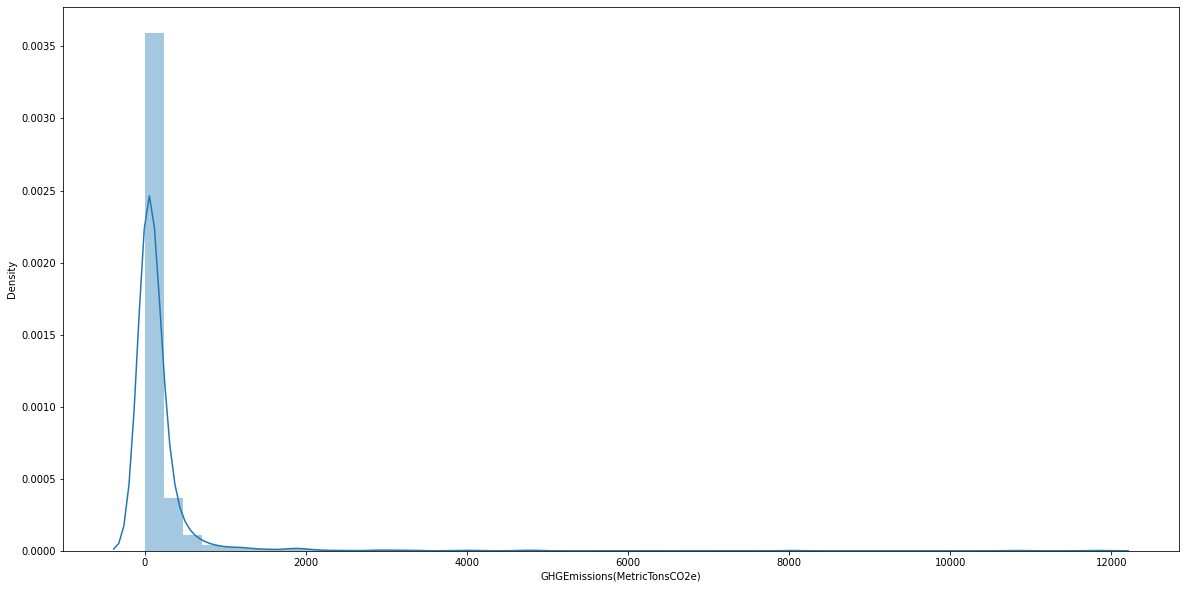

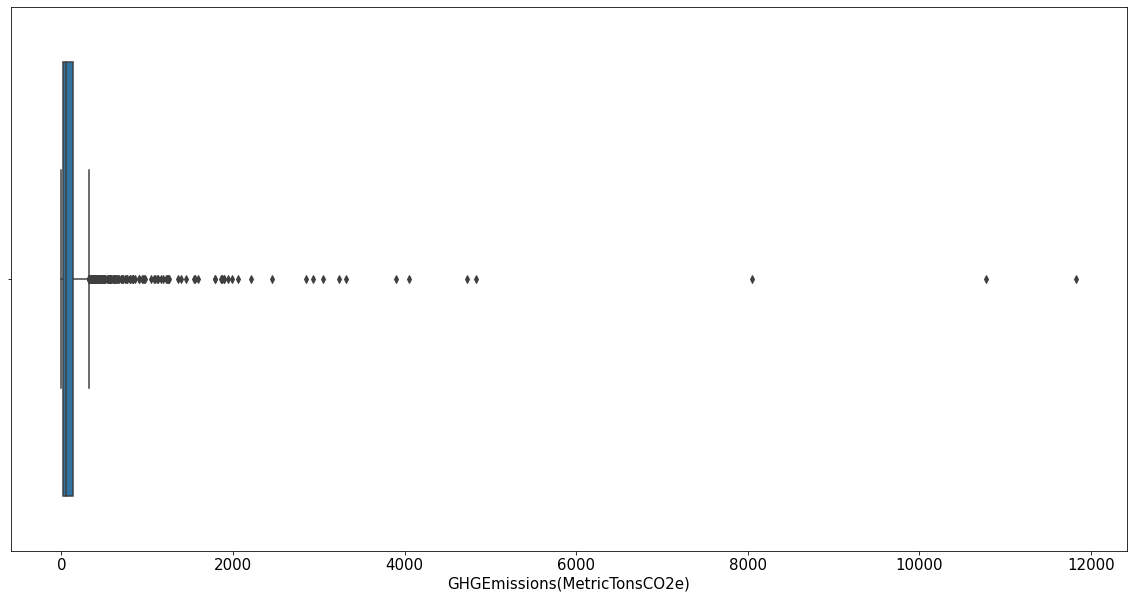

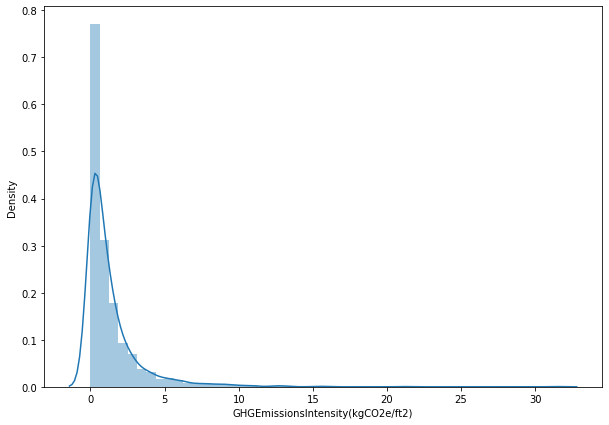

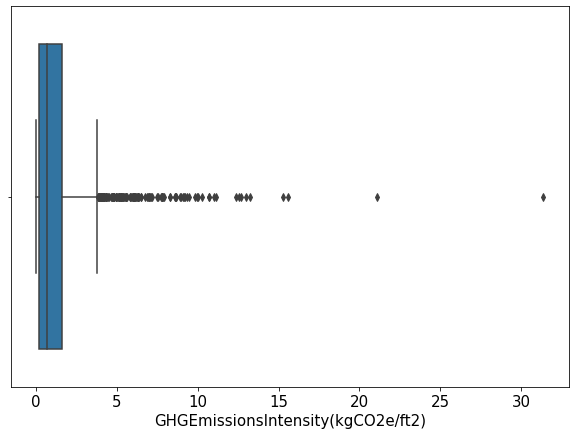

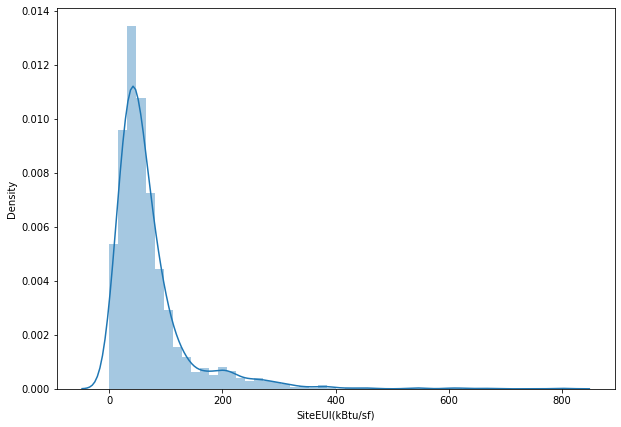

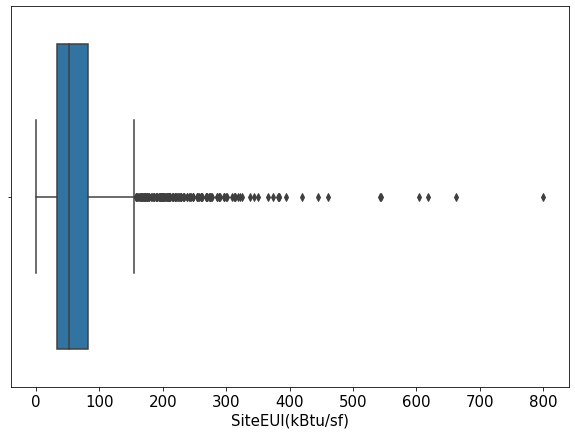

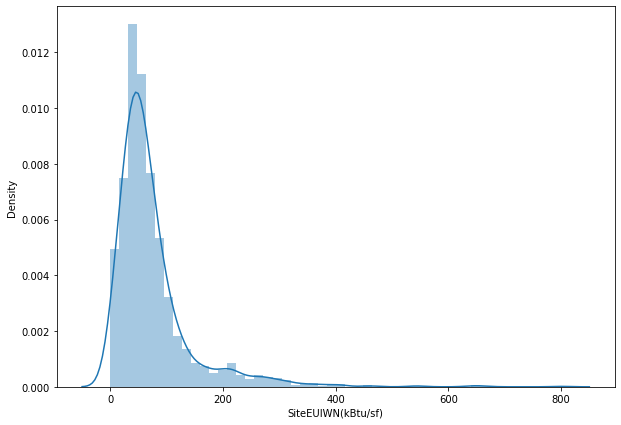

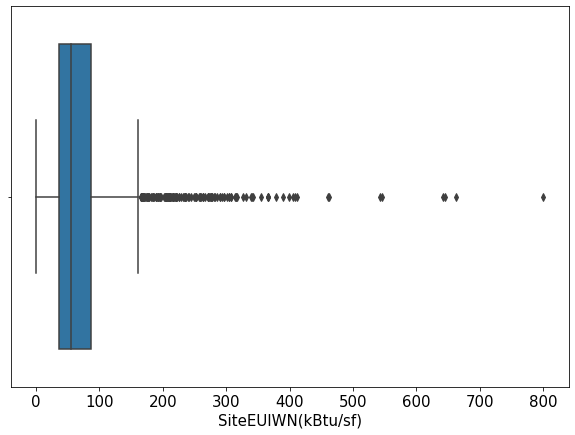

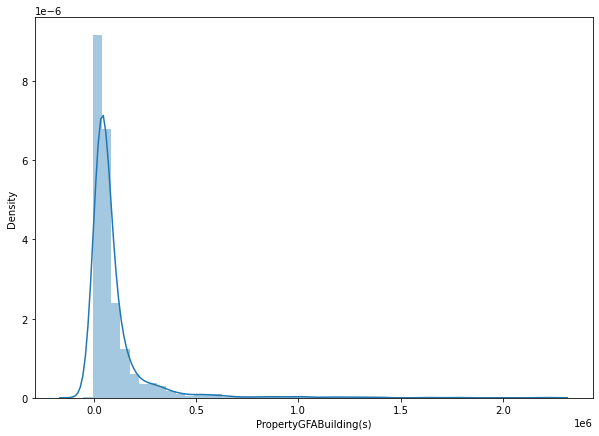

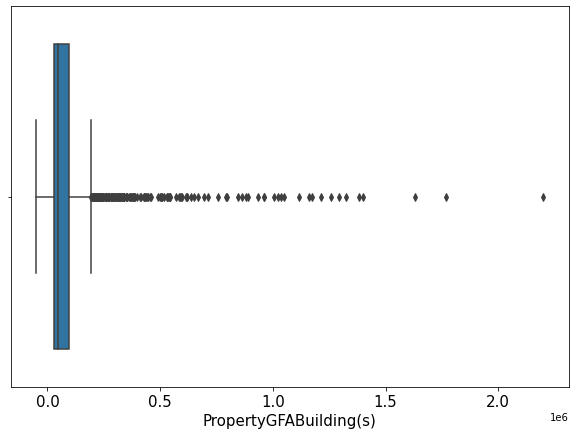

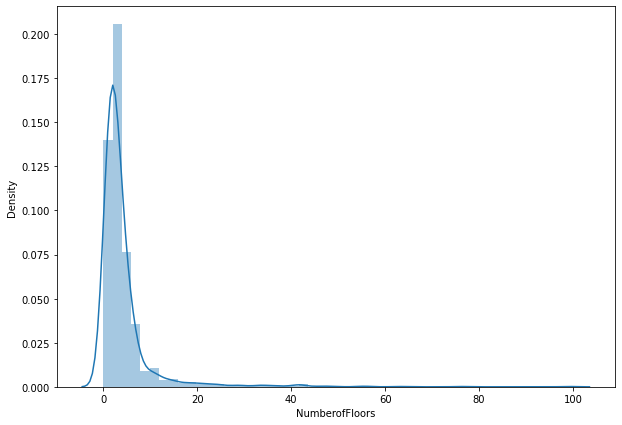

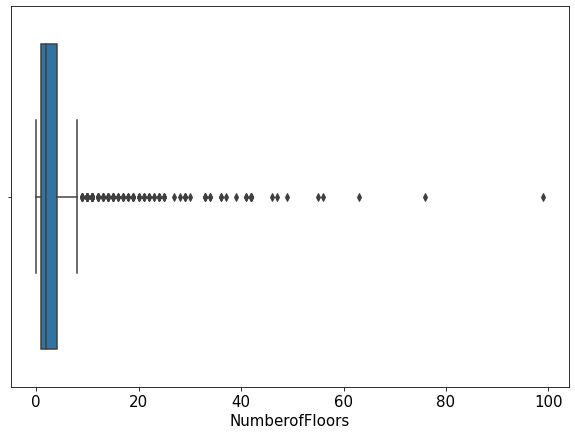

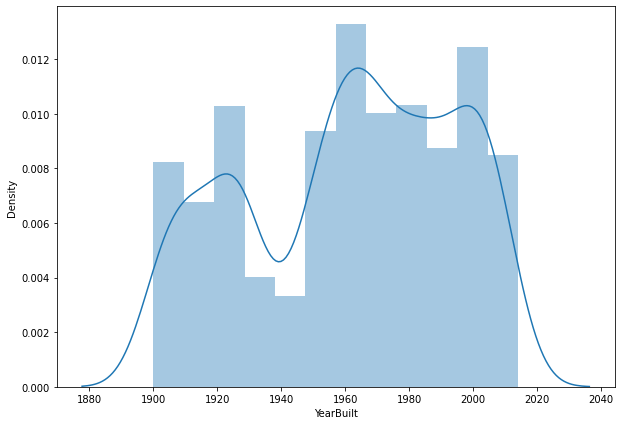

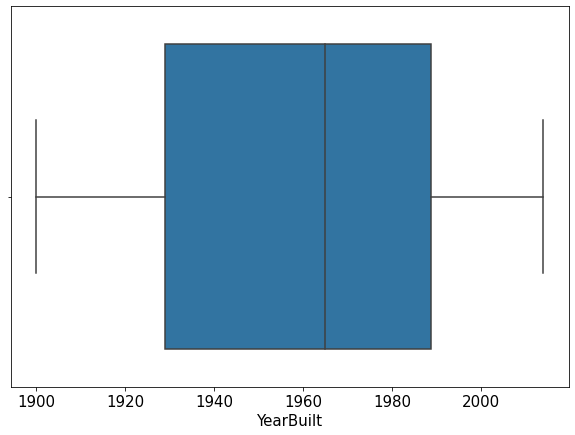

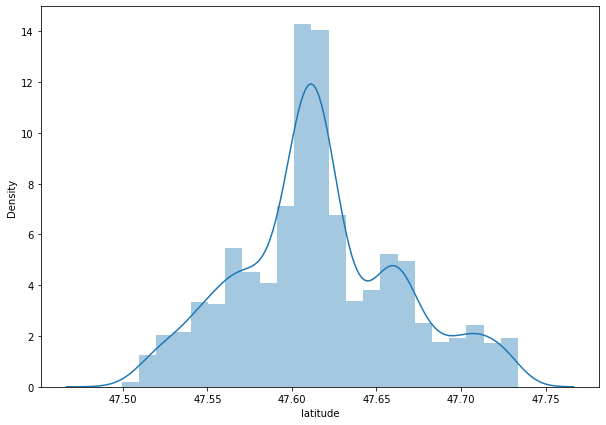

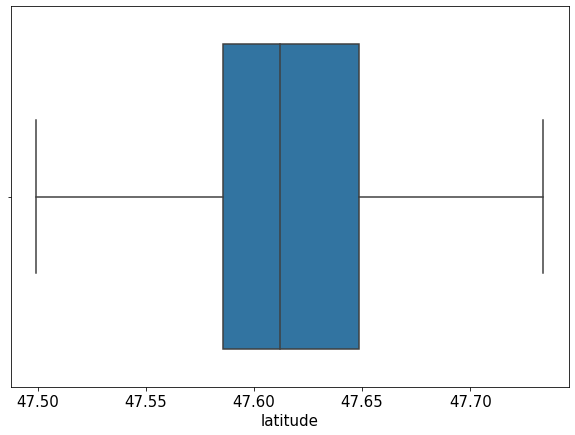

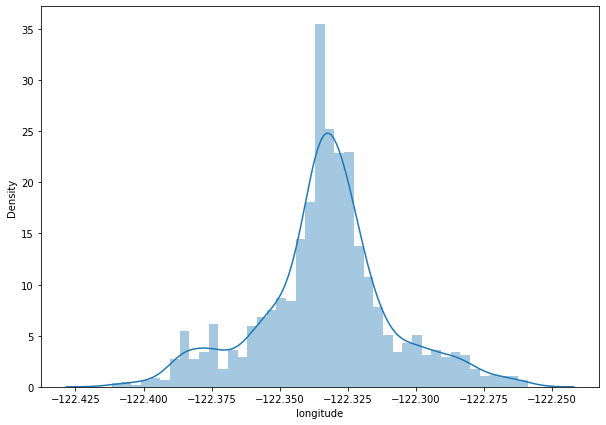

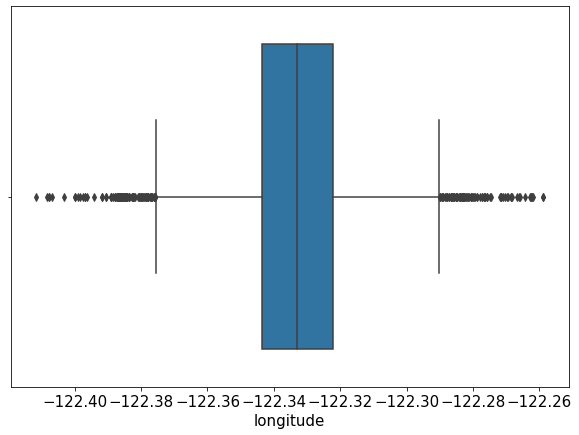

In [58]:
# Appliquer la fonction à chaque variable quantitative 

for col_name_quant in var_quantitatives_analyse_2015: 
    print(col_name_quant)
    an_univariees_quant(df_build_2015, col_name_quant) 
    

moy:
 1.0654545454545454
med:
 1.0
mod:
 0    1
dtype: int64
var:
 1.2235944903580993
ect:
 1.106162054293176
skw:
 27.124493646311834
kur:
 866.579122284322


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumberofBuildings'>

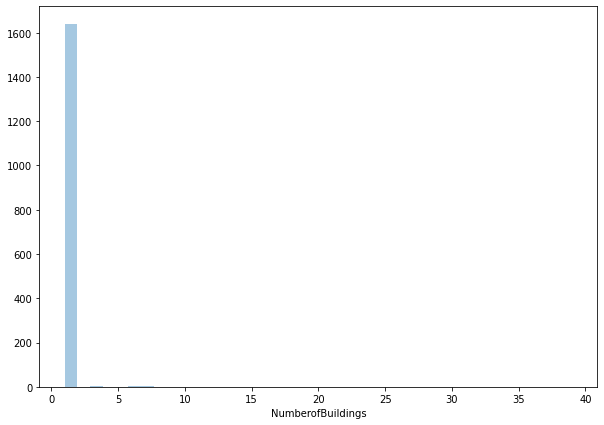

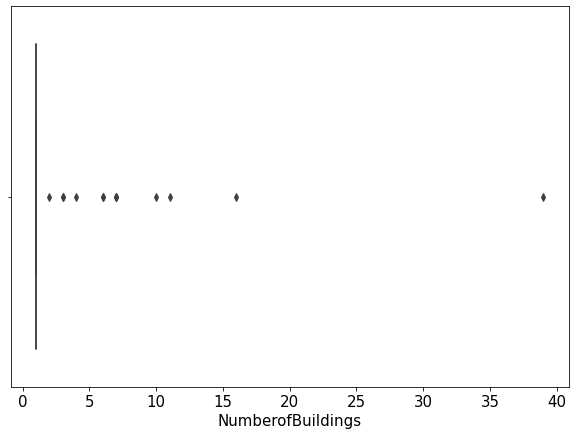

In [59]:
 # Mesure de Tendance Centrale
print('moy:\n',df_build_2015['NumberofBuildings'].mean())
print('med:\n',df_build_2015['NumberofBuildings'].median())
print('mod:\n',df_build_2015['NumberofBuildings'].mode())
    
    # Mesure de Dispersion 
print("var:\n",df_build_2015['NumberofBuildings'].var(ddof=0))
print("ect:\n",df_build_2015['NumberofBuildings'].std(ddof=0))
    
    # Mesure de Forme 
print("skw:\n",df_build_2015['NumberofBuildings'].skew())
print("kur:\n",df_build_2015['NumberofBuildings'].kurtosis())

plt.figure()
sns.distplot(df_build_2015['NumberofBuildings'], kde=False)
plt.figure()
plt.rcParams['figure.figsize'] = (10,7)
# Taille xlabels
plt.xticks(size=15)
plt.xlabel('NumberofBuildings', size=15)
# Taille ylabels
plt.yticks(size=15)
sns.boxplot(df_build_2015['NumberofBuildings']) 

#### Variables qualitatives

In [60]:
# Créer une liste avec les variables qualitatives

var_qualitatives_analyse_2015 = ['LargestPropertyUseTypeGFA',
                                 'BuildingType', 
                                 'LargestPropertyUseType']

In [61]:
# Créer une fonction pour étudier les variables qualitatives

def an_univariees_qual (df, col_name):        
    # Fréquences
    effectifs = df[col_name].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités  
    # création du tableau à partir des modalités
    tab = pd.DataFrame(modalites, columns = [col_name]) 
    tab['n'] = effectifs.values
    tab['f'] = tab['n'] / len(df) # len(data) renvoie la taille de l'échantillon
    
    # Fréquences cumulées
    tab = tab.sort_values(col_name) # tri des valeurs de la variable X (croissant)
    tab['F'] = tab['f'].cumsum() # cumsum calcule la somme cumulée
    
    # Imprimer tableau
    print(tab)

In [62]:
# Appliquer la fonction à chaque variable qualitative 

for col_name in var_qualitatives_analyse_2015: 
    an_univariees_qual(df_build_2015, col_name) 

      LargestPropertyUseTypeGFA  n         f         F
1239                     5872.0  1  0.000606  0.000606
201                      6455.0  1  0.000606  0.001212
715                      6900.0  1  0.000606  0.001818
1113                     7245.0  1  0.000606  0.002424
464                      7387.0  1  0.000606  0.003030
...                         ... ..       ...       ...
1432                  1350182.0  1  0.000606  0.958182
609                   1585960.0  1  0.000606  0.958788
656                   1639334.0  1  0.000606  0.959394
312                   1680937.0  1  0.000606  0.960000
1237                  1719643.0  1  0.000606  0.960606

[1487 rows x 4 columns]
         BuildingType     n         f         F
3              Campus    22  0.013333  0.013333
0      NonResidential  1461  0.885455  0.898788
2  Nonresidential COS    68  0.041212  0.940000
1   SPS-District K-12    99  0.060000  1.000000
                               LargestPropertyUseType    n         f       

## DF 2016

#### Variables quantitatives

In [63]:
# Créer une liste avec les variables quantitatives
# 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'

var_quantitatives_analyse_2016 = ['TotalGHGEmissions', 
                                  'GHGEmissionsIntensity', 
                                  'SiteEUI(kBtu/sf)', 
                                  'SiteEUIWN(kBtu/sf)',
                                  'PropertyGFABuilding(s)', 
                                  'NumberofFloors', 
                                  'YearBuilt', 
                                  'Latitude',
                                  'Longitude',
                                  #'NumberofBuildings' 
                                 ]

TotalGHGEmissions
moy:
 184.97330132052844
med:
 49.58
mod:
 0    0.0
dtype: float64
var:
 565128.489318273
ect:
 751.7502838830678
skw:
 14.213855726942699
kur:
 247.10206648218906
GHGEmissionsIntensity
moy:
 1.6078451380552232
med:
 0.88
mod:
 0    0.23
1    0.28
dtype: float64
var:
 5.457741154889354
ect:
 2.336180890874967
skw:
 4.705311664930059
kur:
 38.065954180701326


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

SiteEUI(kBtu/sf)
moy:
 72.15879886352617
med:
 51.90000153
mod:
 0    0.0
dtype: float64
var:
 5479.832170780744
ect:
 74.02588851733388
skw:
 3.7264945358235284
kur:
 22.18288224013475


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


SiteEUIWN(kBtu/sf)
moy:
 74.5685285620517
med:
 53.90000153
mod:
 0    0.0
dtype: float64
var:
 5625.880267505824
ect:
 75.00586822046542
skw:
 3.628417675202232
kur:
 20.994551463081265
PropertyGFABuilding(s)
moy:
 105944.74520383694
med:
 47391.5
mod:
 0    25920
1    28800
2    36000
dtype: int64
var:
 80727791864.80138
ect:
 284126.3660148445
skw:
 21.652781356820014
kur:
 667.7156633928373


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

NumberofFloors
moy:
 4.121103117505995
med:
 2.0
mod:
 0    1
dtype: int64
var:
 43.05248031790409
ect:
 6.561438890815344
skw:
 6.044132952456066
kur:
 52.74871400595042
YearBuilt
moy:
 1961.913669064748
med:
 1965.0
mod:
 0    1900
dtype: int64
var:
 1071.3798371374887
ect:
 32.73193909834076
skw:
 -0.2920474904249406
kur:
 -1.045736978465038
Latitude
moy:
 47.61605422648087
med:
 47.61234
mod:
 0    47.66246
dtype: float64
var:
 0.0023187845631730893
ect:
 0.04815375959541569


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

skw:
 0.22594944914742715
kur:
 -0.22492165729782698
Longitude
moy:
 -122.33290769688264
med:
 -122.33293499999999
mod:
 0   -122.29898
dtype: float64
var:
 0.0006038147265657569
ect:
 0.024572641831226795
skw:
 -0.07577227315357414
kur:
 0.7329542478010738


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


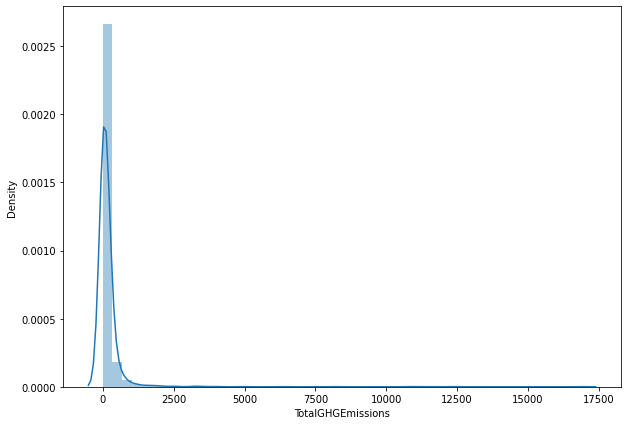

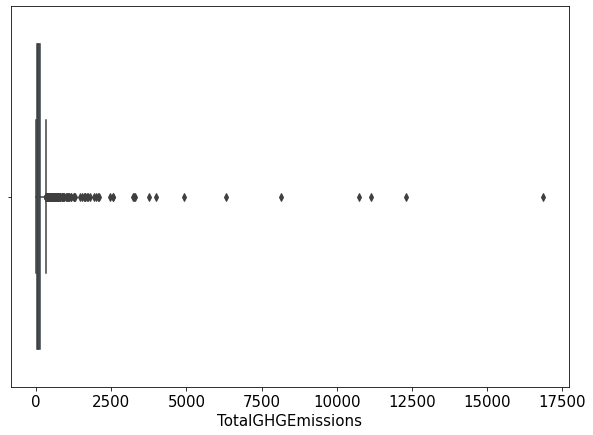

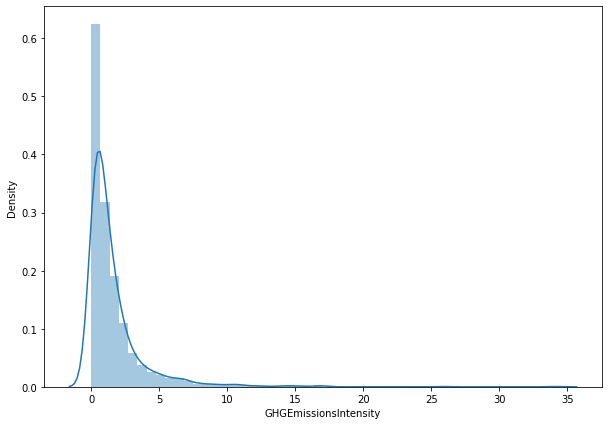

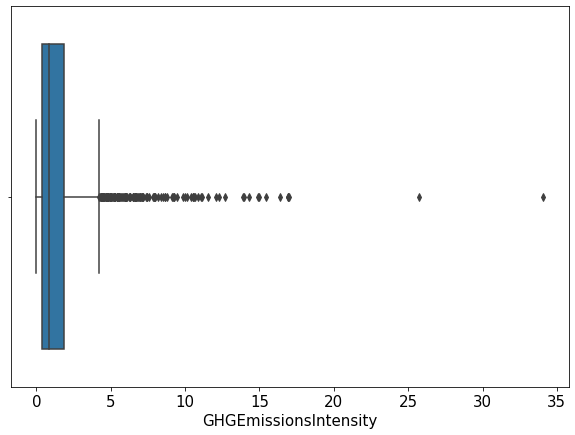

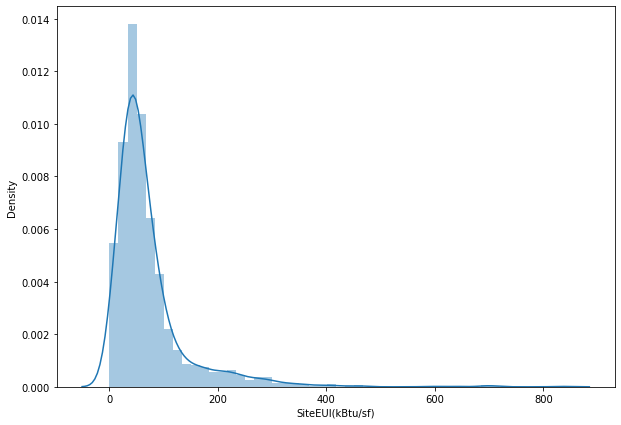

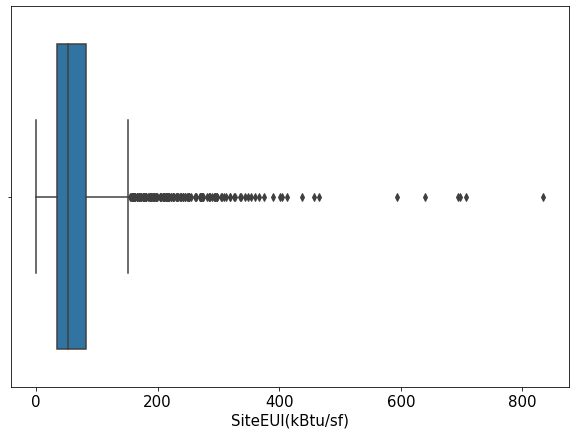

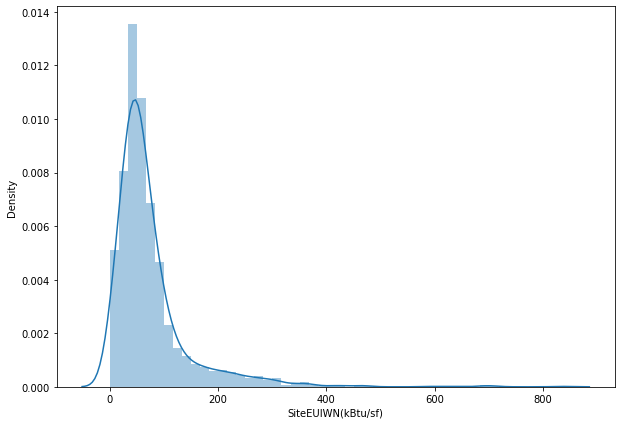

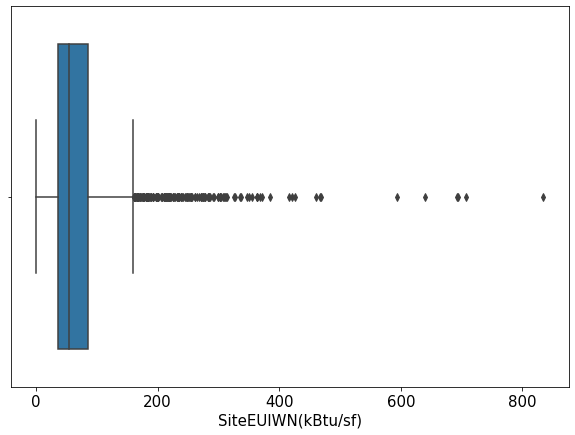

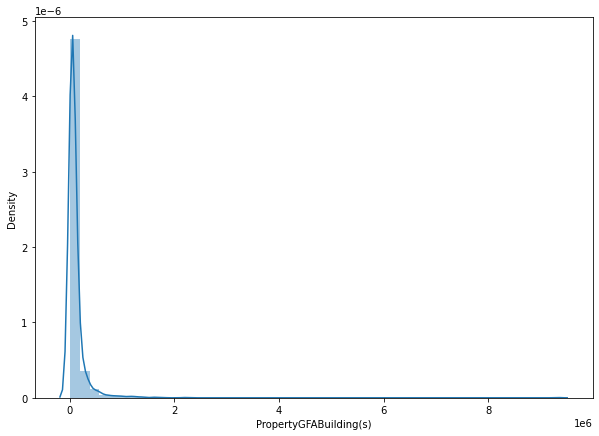

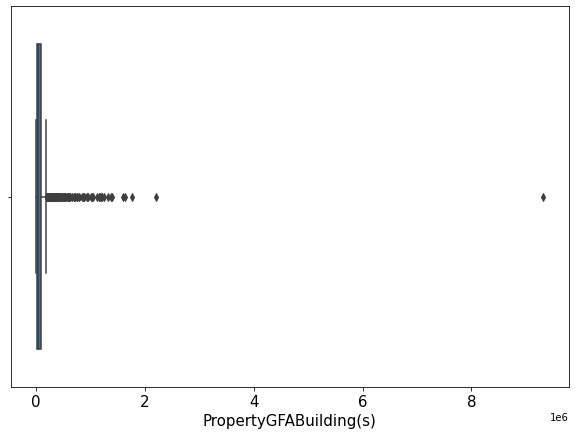

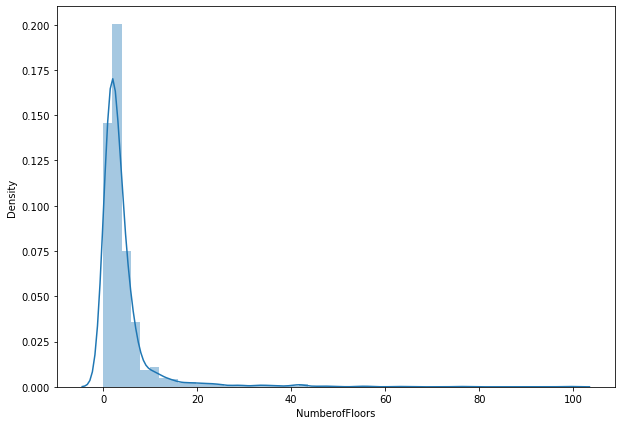

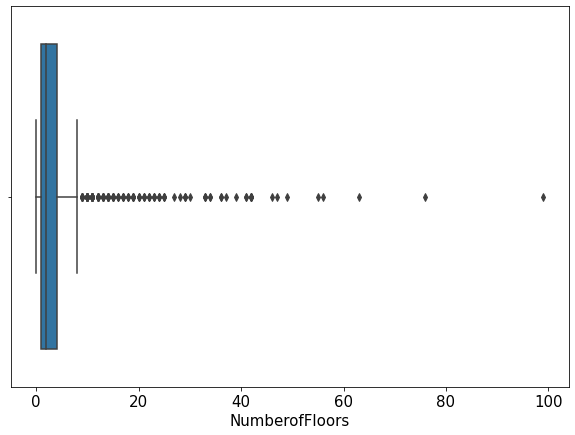

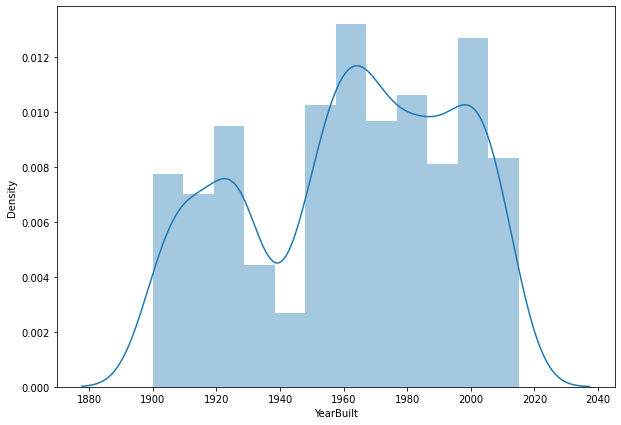

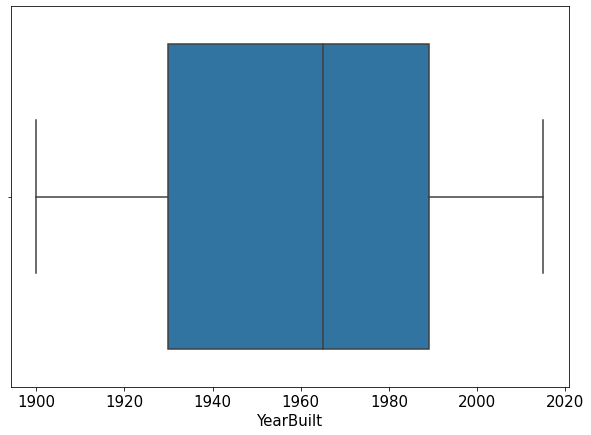

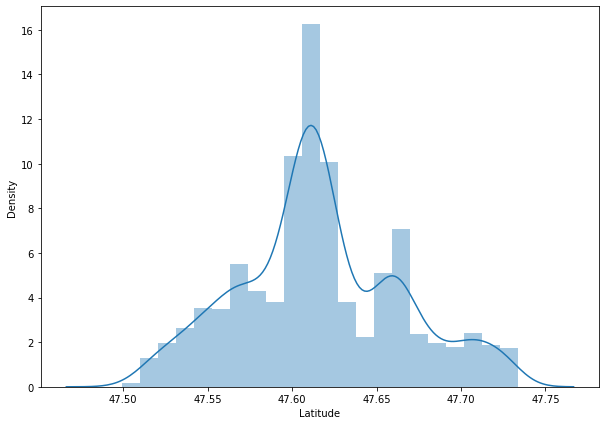

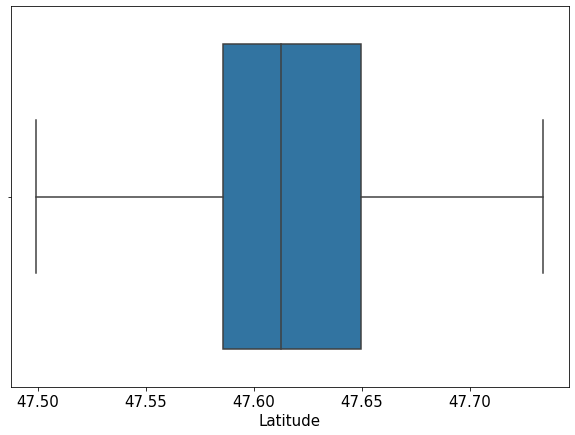

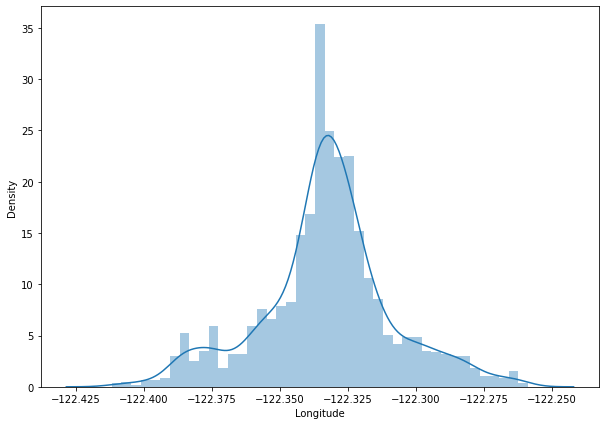

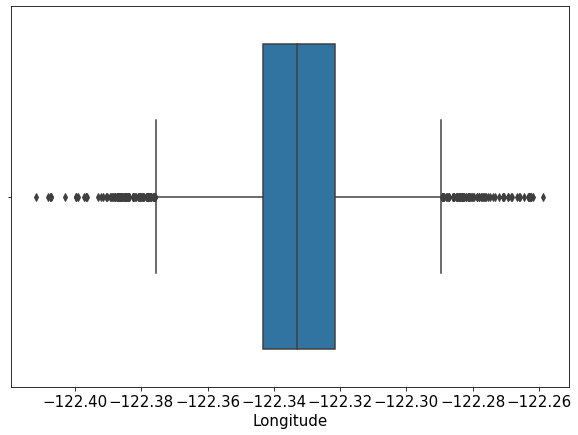

In [64]:
# Appliquer la fonction à chaque variable quantitative 

for col_name_quant in var_quantitatives_analyse_2016: 
    print(col_name_quant)
    an_univariees_quant(df_build_2016, col_name_quant) 
    

moy:
 1.1686674669867947
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 8.58799786421173
ect:
 2.930528598088019
skw:
 32.48164551106041
kur:
 1190.9827360378092


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumberofBuildings'>

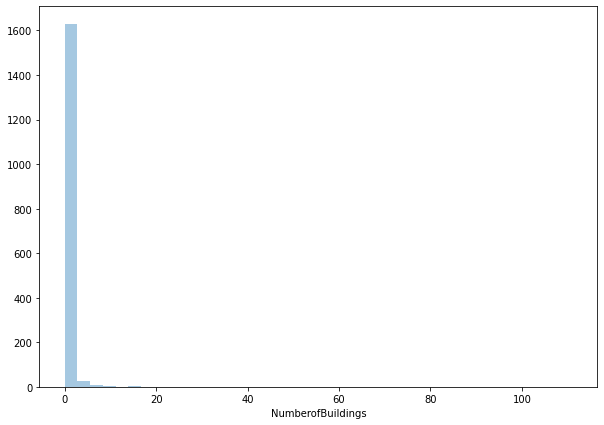

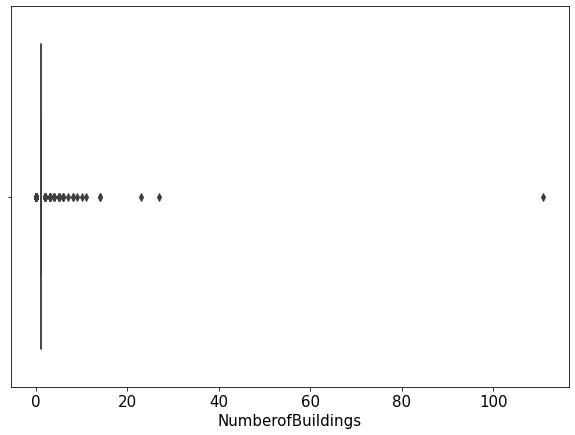

In [65]:
 # Mesure de Tendance Centrale
print('moy:\n',df_build_2016['NumberofBuildings'].mean())
print('med:\n',df_build_2016['NumberofBuildings'].median())
print('mod:\n',df_build_2016['NumberofBuildings'].mode())
    
    # Mesure de Dispersion 
print("var:\n",df_build_2016['NumberofBuildings'].var(ddof=0))
print("ect:\n",df_build_2016['NumberofBuildings'].std(ddof=0))
    
    # Mesure de Forme 
print("skw:\n",df_build_2016['NumberofBuildings'].skew())
print("kur:\n",df_build_2016['NumberofBuildings'].kurtosis())
    
plt.figure()
sns.distplot(df_build_2016['NumberofBuildings'], kde=False)
plt.figure()
plt.rcParams['figure.figsize'] = (10,7)
# Taille xlabels
plt.xticks(size=15)
plt.xlabel('NumberofBuildings', size=15)
# Taille ylabels
plt.yticks(size=15)
sns.boxplot(df_build_2016['NumberofBuildings'])

#### Variables qualitatives

In [66]:
# Créer une liste avec les variables qualitatives

var_qualitatives_analyse_2016 = ['LargestPropertyUseTypeGFA', 
                                 'BuildingType', 
                                 'LargestPropertyUseType']

In [67]:
# Appliquer la fonction à chaque variable qualitative 

for col_name in var_qualitatives_analyse_2016: 
    an_univariees_qual(df_build_2016, col_name) 

      LargestPropertyUseTypeGFA  n       f         F
1014                     5656.0  1  0.0006  0.000600
206                      6455.0  1  0.0006  0.001199
1059                     6601.0  1  0.0006  0.001799
722                      6900.0  1  0.0006  0.002398
1168                     7245.0  1  0.0006  0.002998
...                         ... ..     ...       ...
641                   1585960.0  1  0.0006  0.994005
691                   1639334.0  1  0.0006  0.994604
406                   1680937.0  1  0.0006  0.995204
1297                  1719643.0  1  0.0006  0.995803
84                    9320156.0  1  0.0006  0.996403

[1561 rows x 4 columns]
         BuildingType     n         f         F
3              Campus    24  0.014388  0.014388
0      NonResidential  1460  0.875300  0.889688
2  Nonresidential COS    85  0.050959  0.940647
4   Nonresidential WA     1  0.000600  0.941247
1   SPS-District K-12    98  0.058753  1.000000
                               LargestPropertyUseTy

## Création d'un seul DF 

### Renommer colonnes avec des noms légèrement différents

In [68]:
# Dans le df df_build_2015

#'latitude', 'Latitude', 
#'longitude', 'Longitude', 

df_build_2015 = df_build_2015.rename(columns={'latitude': 'Latitude', 
                                              'longitude': 'Longitude'})

df_build_2015.sample(5)

Unnamed: 0  OSEBuildingID  DataYear  ENERGYSTARScore  \
399          407            561      2015             94.0   
1242        2138          24514      2015              6.0   
1132        1942          23835      2015             86.0   
914         1304          21469      2015             81.0   
630          642            866      2015             91.0   

      GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)  \
399                          67.61                               0.08   
1242                        157.13                               3.06   
1132                          3.98                               0.06   
914                          65.75                               1.29   
630                          97.97                               1.55   

      SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  PropertyGFABuilding(s)  \
399               48.6                48.6                  211900   
1242             150.2               152.9                   45155   
1132              24.1                24.1                   23687   
914               52.4                59.8                   47686   
630               39.2                51.0                   61183   

      LargestPropertyUseTypeGFA       BuildingType     LargestPropertyUseType  \
399                    193420.0     NonResidential                     Office   
1242                    45155.0     NonResidential  Supermarket/Grocery Store   
1132                        NaN     NonResidential                        NaN   
914                     25500.0     NonResidential                     Office   
630                     62975.0  SPS-District K-12                K-12 School   

      NumberofFloors  YearBuilt  NumberofBuildings   Latitude   Longitude  \
399              6.0       2005                  1  47.619855 -122.330481   
1242             1.0       1986                  1  47.702650 -122.342479   
1132             2.0       1983                  1  47.561623 -122.338630   
914              4.0       1919                  1  47.609981 -122.340403   
630              1.0       1950                  1  47.580080 -122.387311   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  OtherFuelUse(kBtu)  
399              0.0          9698269.0               0.0                 0.0  
1242             0.0          4401233.0         2380908.0                 0.0  
1132             0.0           571369.0               0.0                 0.0  
914         759621.0          1021484.0               0.0                 0.0  
630              0.0           717481.0         1750400.0                 0.0

In [69]:
# Dans le df df_build_2016

#'GHGEmissions(MetricTonsCO2e)','TotalGHGEmissions'
#'GHGEmissionsIntensity(kgCO2e/ft2)','GHGEmissionsIntensity'

df_build_2016 = df_build_2016.rename(columns={'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)', 
                                              'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)'})

df_build_2016.sample(5)

Unnamed: 0  OSEBuildingID  DataYear  ENERGYSTARScore  \
582         592            793      2016             67.0   
614         624            839      2016             28.0   
759        1016          20515      2016             62.0   
477         483            651      2016              6.0   
248         254            381      2016             54.0   

     GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)  \
582                         60.92                               0.39   
614                        453.76                               3.01   
759                         41.68                               0.81   
477                        477.85                               3.70   
248                        384.27                               6.31   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  PropertyGFABuilding(s)  \
582         48.200001           50.599998                  156188   
614        133.399994          138.899994                  100528   
759         34.799999           38.000000                   51704   
477        203.199997          210.000000                   89191   
248        231.800003          239.000000                   60880   

     LargestPropertyUseTypeGFA       BuildingType     LargestPropertyUseType  \
582                   141917.0     NonResidential                     Office   
614                   100528.0     NonResidential                      Hotel   
759                    51704.0  SPS-District K-12                K-12 School   
477                    89131.0     NonResidential             Medical Office   
248                    61666.0     NonResidential  Supermarket/Grocery Store   

     NumberofFloors  YearBuilt  NumberofBuildings   Latitude   Longitude  \
582               2       1973                1.0  47.552380 -122.327620   
614               6       2003                1.0  47.612107 -122.320597   
759               1       1971                1.0  47.585470 -122.315100   
477               5       2008                1.0  47.623950 -122.333920   
248               1       1956                1.0  47.701900 -122.363740   

     SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  
582             0.0          6557481.0          286373.0  
614             0.0          5601497.0         7808543.0  
759             0.0          1167845.0          631557.0  
477             0.0         11800324.0         7448407.0  
248             0.0          8125218.0         6168753.0

### Concaténation

In [70]:
# Concaténation 

df_build = pd.concat([df_build_2015, df_build_2016])
                     #objs, axis=0, join='outer', ignore_index=False, keys=None,
                    #levels=None, names=None, verify_integrity=False, copy=True)

In [71]:
df_build.shape

(3318, 21)

In [72]:
df_build.sample(5)

Unnamed: 0  OSEBuildingID  DataYear  ENERGYSTARScore  \
982         1485          21909      2015             57.0   
1266        2174          24604      2015              NaN   
1287        2215          24725      2015             30.0   
1022        1590          22650      2016            100.0   
557          567            761      2016             59.0   

      GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)  \
982                          46.03                               0.94   
1266                          6.67                               0.07   
1287                         24.18                               1.18   
1022                          1.68                               0.04   
557                          27.82                               0.33   

      SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  PropertyGFABuilding(s)  \
982          64.700000           70.400000                   38745   
1266         33.100000           36.900000                   35176   
1287         27.700000           36.700000                   20000   
1022          5.100000            5.500000                   42500   
557          54.299999           56.299999                   83118   

      LargestPropertyUseTypeGFA    BuildingType      LargestPropertyUseType  \
982                     43403.0  NonResidential              Medical Office   
1266                    14452.0  NonResidential                      Office   
1287                    20000.0  NonResidential  Non-Refrigerated Warehouse   
1022                    42500.0  NonResidential  Non-Refrigerated Warehouse   
557                     45000.0  NonResidential                Retail Store   

      NumberofFloors  YearBuilt  NumberofBuildings   Latitude   Longitude  \
982              2.0       1968                1.0  47.700848 -122.323765   
1266             5.0       2004                1.0  47.572803 -122.370458   
1287             1.0       1926                1.0  47.602012 -122.316442   
1022             4.0       1927                1.0  47.663530 -122.380640   
557              3.0       1940                1.0  47.609560 -122.337150   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  OtherFuelUse(kBtu)  
982              0.0          2234953.0          573300.0                 0.0  
1266             0.0           956638.0               0.0                 0.0  
1287             0.0           114189.0          440344.0                 0.0  
1022             0.0           241478.0               0.0                 NaN  
557              0.0          2209419.0          233722.0                 NaN

### Création de variables : types d'énergie présentes

In [73]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imputer.fit_transform(df_build['Electricity(kBtu)'].values.reshape(-1,1))
imputer.fit_transform(df_build['SteamUse(kBtu)'].values.reshape(-1,1))
imputer.fit_transform(df_build['NaturalGas(kBtu)'].values.reshape(-1,1))
imputer.fit_transform(df_build['OtherFuelUse(kBtu)'].values.reshape(-1,1))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [74]:
# Créer une variable indiquant la présence d'électricité
df_build['Electricity'] = df_build['Electricity(kBtu)'] > 0
# Transformer le boléen en chiffre : 1=True / 0=False
df_build['Electricity'] = df_build['Electricity'].astype(int) # True=1 False=0

# Créer une variable indiquant la présence de vapeur
df_build['Steam'] = df_build['SteamUse(kBtu)'] > 0
# Transformer le boléen en chiffre : 1=True / 0=False
df_build['Steam'] = df_build['Steam'].astype(int)

# Créer une variable indiquant la présence de gaz naturel
df_build['NaturalGas'] = df_build['NaturalGas(kBtu)'] > 0
# Transformer le boléen en chiffre : 1=True / 0=False
df_build['NaturalGas'] = df_build['NaturalGas'].astype(int)

# Créer une variable indiquant la présence d'autre source d'énergie
df_build['OtherFuel'] = df_build['OtherFuelUse(kBtu)'] > 0
# Transformer le boléen en chiffre : 1=True / 0=False
df_build['OtherFuel'] = df_build['OtherFuel'].astype(int)

In [75]:
df_build.sample(5)

Unnamed: 0  OSEBuildingID  DataYear  ENERGYSTARScore  \
1272        2188          24716      2016              NaN   
1390        2547          26040      2016              NaN   
1162        1993          24086      2016              NaN   
1586        3162          49695      2016             97.0   
1632        3274          49865      2015              NaN   

      GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)  \
1272                         23.62                               0.97   
1390                         18.81                               0.28   
1162                        405.05                               1.75   
1586                        163.19                               0.31   
1632                        799.97                               2.38   

      SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  PropertyGFABuilding(s)  \
1272         50.599998           53.299999                   24430   
1390          9.600000           11.100000                   66610   
1162         91.000000           96.199997                  230971   
1586         42.799999           42.799999                  526423   
1632         75.800000           78.500000                  313841   

      LargestPropertyUseTypeGFA    BuildingType  LargestPropertyUseType  \
1272                    15667.0  NonResidential  Refrigerated Warehouse   
1390                    66720.0  NonResidential   Self-Storage Facility   
1162                   230970.0          Campus                   Other   
1586                   400536.0  NonResidential                  Office   
1632                   318986.0  NonResidential        Lifestyle Center   

      NumberofFloors  YearBuilt  NumberofBuildings   Latitude   Longitude  \
1272             2.0       1937                0.0  47.589990 -122.335390   
1390             3.0       1994                1.0  47.567850 -122.370390   
1162             0.0       1991               10.0  47.590420 -122.324980   
1586            11.0       2012                1.0  47.620370 -122.336270   
1632             6.0       2013                1.0  47.661362 -122.298089   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  OtherFuelUse(kBtu)  \
1272             0.0           907206.0          325617.0                 NaN   
1390             0.0           329414.0          310963.0                 NaN   
1162             0.0         15419770.0         5602515.0                 NaN   
1586             0.0         16565434.0          898308.0                 NaN   
1632             0.0         12213676.0        13459428.0                 0.0   

      Electricity  Steam  NaturalGas  OtherFuel  
1272            1      0           1          0  
1390            1      0           1          0  
1162            1      0           1          0  
1586            1      0           1          0  
1632            1      0           1          0

In [76]:
# Supprimer 'Unnamed: 0', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'
df_build.drop(['Unnamed: 0', 'SteamUse(kBtu)', 
               'Electricity(kBtu)', 'NaturalGas(kBtu)', 
               'OtherFuelUse(kBtu)'], axis=1, inplace=True)

### Tranformer une variable

In [77]:
# Tranformer 'YearBuilt' en 'Age'
# 'Age' = 'DataYear' - 'YearBuilt'

df_build['Age'] = df_build['DataYear'] - df_build['YearBuilt']

df_build.sample(5)

OSEBuildingID  DataYear  ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  \
1355          25659      2016             99.0                         13.69   
271             408      2015             65.0                         72.46   
60               87      2015              NaN                           NaN   
1165          24099      2016              NaN                          5.09   
1598          49737      2016             67.0                        144.41   

      GHGEmissionsIntensity(kgCO2e/ft2)  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1355                               0.35         18.400000           20.000000   
271                                0.34         58.200000           58.300000   
60                                  NaN               NaN                 NaN   
1165                               0.16         20.799999           21.600000   
1598                               3.29         92.199997           96.900002   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA       BuildingType  \
1355                   39030                    32001.0     NonResidential   
271                   132326                    92006.0     NonResidential   
60                     53352                    53352.0  SPS-District K-12   
1165                   31365                    31365.0     NonResidential   
1598                   43832                    24588.0     NonResidential   

     LargestPropertyUseType  NumberofFloors  YearBuilt  NumberofBuildings  \
1355                 Office             4.0       1902                1.0   
271                  Office            10.0       1926                1.0   
60              K-12 School             2.0       1948                1.0   
1165                  Other             1.0       1972                1.0   
1598           Retail Store             3.0       1918                1.0   

       Latitude   Longitude  Electricity  Steam  NaturalGas  OtherFuel  Age  
1355  47.599790 -122.333180            1      0           1          0  114  
271   47.610126 -122.336136            1      1           1          0   89  
60    47.509354 -122.378222            0      0           0          0   67  
1165  47.579360 -122.323220            1      0           1          0   44  
1598  47.625030 -122.356420            1      0           1          0   98

In [78]:
df_build['Age'].unique()

array([ 88,  19,  46,  89,  35,  16, 111,  17,  87,  93,  11,  85,  32,
       108,  99,  30,  54,  14,  24,  60,  37,  66,  26, 109,  21,  25,
        65, 115,  61, 104,  42,  95, 105,  33, 107,  56,  15,  18,  53,
        45,   7,  67,  50,  86,   5,  77,  29,  13,  92,  12,  58,  51,
        74,  52,   9, 100,  57,   6,   4,  44,   8,  64,  62,  63,  55,
        78,  49,  47,  90,  91,  10,  84,  43, 101, 102,  20,  34,  39,
       106,  27,  36,  68,  31,  59, 103,  38,  94,  70,  23,  41,  40,
        69,  48,  28,  75,  83,  22,  97, 110, 113,  76,  71,  98,  73,
       112,   3,   2,  96, 114,  79,  80,   1, 116,  72,  81])

In [79]:
# Supprimer 'DataYear', 'YearBuilt'
df_build.drop(['DataYear', 'YearBuilt'], axis=1, inplace=True)

### Gérer les doublons

Trie par les valeurs pessimistes : on garde la valeur la moins élévée de consommation totale d'énergie entre 2015 et 2016

In [80]:
# Vérifier doublons 

# Afficher les doublons pour la colonne 'OSEBuildingID'
df_build[df_build.duplicated(subset=['OSEBuildingID', 'GHGEmissionsIntensity(kgCO2e/ft2)'], keep=False)]

OSEBuildingID  ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  \
293             430             77.0                         52.67   
420             583              NaN                         35.86   
873           21315            100.0                          0.31   
1044          22830             89.0                          1.97   
1122          23722             94.0                         52.88   
1174          24085              NaN                         10.14   
1227          24415              NaN                         21.20   
1285          24717              NaN                          0.12   
1356          25537              NaN                         12.69   
1411          26119              NaN                         29.26   
1638          49924              NaN                         31.42   
294             430             83.0                         44.48   
418             583              NaN                         34.00   
868           21315              NaN                          0.17   
1033          22830            100.0                          0.70   
1111          23722              NaN                         50.22   
1161          24085              NaN                          9.71   
1214          24415              NaN                         19.77   
1273          24717              NaN                          0.12   
1340          25537              NaN                         11.85   
1394          26119              NaN                         28.07   
1619          49924              NaN                         29.40   

      GHGEmissionsIntensity(kgCO2e/ft2)  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
293                                0.84         52.500000           56.900000   
420                                0.64         18.500000           22.200000   
873                                0.00          1.800000            1.800000   
1044                               0.03         11.900000           14.500000   
1122                               1.26         37.500000           48.200000   
1174                               0.47         13.700000           17.500000   
1227                               0.30          9.000000           11.000000   
1285                               0.00          0.700000            0.700000   
1356                               0.42         15.200000           15.200000   
1411                               1.13         36.000000           45.800000   
1638                               0.45         46.200000           48.600000   
294                                0.84         46.900002           48.200001   
418                                0.64         17.100000           18.700001   
868                                0.00          1.000000            1.000000   
1033                               0.03          4.200000            4.200000   
1111                               1.26          0.000000            0.000000   
1161                               0.47         13.100000           15.500000   
1214                               0.30          9.000000           10.200000   
1273                               0.00          0.700000            0.700000   
1340                               0.42         15.200000           17.600000   
1394                               1.13         34.700001           40.200001   
1619                               0.45         38.400002           39.400002   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA       BuildingType  \
293                    52800                    38880.0     NonResidential   
420                    53472                    46846.0     NonResidential   
873                    57720                    25000.0     NonResidential   
1044                   23772                    23772.0     NonResidential   
1122                   39971                    40271.0  SPS-District K-12   
1174                   20600                    20600.0     Non

In [81]:
# Trier par 'OSEBuildingID', 'GHGEmissionsIntensity(kgCO2e/ft2)'
df_build.sort_values(['OSEBuildingID', 'GHGEmissionsIntensity(kgCO2e/ft2)'])

OSEBuildingID  ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  \
0                 1             65.0                        249.43   
0                 1             60.0                        249.98   
1                 2             51.0                        263.51   
1                 2             61.0                        295.86   
2                 3             18.0                       2061.48   
...             ...              ...                           ...   
1663          50222             46.0                         20.94   
1664          50223              NaN                         32.17   
1665          50224              NaN                        223.54   
1666          50225              NaN                         22.11   
1667          50226              NaN                         41.27   

      GHGEmissionsIntensity(kgCO2e/ft2)  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
0                                  2.64         78.900000           80.300000   
0                                  2.83         81.699997           84.300003   
1                                  2.38         94.400000           99.000000   
1                                  2.86         94.800003           97.900002   
2                                  1.92         96.600000           99.700000   
...                                 ...               ...                 ...   
1663                               1.70         69.099998           76.699997   
1664                               2.01         59.400002           65.900002   
1665                              16.99        438.200012          460.100006   
1666                               1.57         51.000000           55.500000   
1667                               2.26         63.099998           70.900002   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA        BuildingType  \
0                      88434                    88434.0      NonResidential   
0                      88434                    88434.0      NonResidential   
1                      88502                    83880.0      NonResidential   
1                      88502                    83880.0      NonResidential   
2                     961990                   757243.0      NonResidential   
...                      ...                        ...                 ...   
1663                   12294                    12294.0  Nonresidential COS   
1664                   16000                    16000.0  Nonresidential COS   
1665                   13157                     7583.0  Nonresidential COS   
1666                   14101                     6601.0  Nonresidential COS   
1667                   18258                     8271.0  Nonresidential COS   

     LargestPropertyUseType  NumberofFloors  NumberofBuildings   Latitude  \
0                     Hotel            12.0                1.0  47.612190   
0                     Hotel            12.0                1.0  47.612200   
1                     Hotel            11.0                1.0  47.613106   
1                     Hotel            11.0                1.0  47.613170   
2                     Hotel            41.0                1.0  47.613349   
...                     ...             ...                ...        ...   
1663                 Office             1.0                1.0  47.567220   
1664     Other - Recreation             1.0                1.0  47.596250   
1665     Other - Recreation             1.0                1.0  47.636440   
1666     Other - Recreation             1.0                1.0  47.528320   
1667     Other - Recreation             1.0                1.0  47.539390   

       Longitude  Electricity  Steam  NaturalGas  OtherFuel  Age  
0    -122.337997            1      1           1          0   88  
0    -122.337990            1      1           1          0   89  
1    -122.333358            1      0           1          0   19  
1    -122.333930            1      0           1  

In [82]:
# Afficher les doublons pour la colonne 'OSEBuildingID'
#df = df[df.duplicated('id', keep='first')]
#'GHGEmissionsIntensity(kgCO2e/ft2)'

df_build = df_build[df_build.duplicated('OSEBuildingID', keep='last')]

In [83]:
df_build.sample(4)

OSEBuildingID  ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  \
402             564             92.0                         76.67   
289             426             82.0                         27.37   
1609          49703             65.0                        276.90   
557             762             39.0                         71.38   

      GHGEmissionsIntensity(kgCO2e/ft2)  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
402                                1.06              41.5                49.3   
289                                0.12              54.7                54.7   
1609                               2.34              54.6                73.6   
557                                0.49             109.6               109.6   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA       BuildingType  \
402                    65430                    60732.0     NonResidential   
289                    70000                    70090.0     NonResidential   
1609                  116101                   117299.0  SPS-District K-12   
557                    77555                    73563.0     NonResidential   

     LargestPropertyUseType  NumberofFloors  NumberofBuildings   Latitude  \
402                  Office             1.0                1.0  47.593644   
289                  Office             4.0                1.0  47.611231   
1609            K-12 School             1.0                1.0  47.641661   
557            Retail Store             3.0                1.0  47.609318   

       Longitude  Electricity  Steam  NaturalGas  OtherFuel  Age  
402  -122.310928            1      0           1          0   45  
289  -122.347711            1      0           0          0   16  
1609 -122.398559            1      0           1          0   63  
557  -122.337860            1      0           1          0   91

In [84]:
# Vérifier doublons 

# Afficher les doublons pour la colonne 'OSEBuildingID'
df_build[df_build.duplicated(subset=['OSEBuildingID', 'GHGEmissionsIntensity(kgCO2e/ft2)'], keep=False)]

Empty DataFrame
Columns: [OSEBuildingID, ENERGYSTARScore, GHGEmissions(MetricTonsCO2e), GHGEmissionsIntensity(kgCO2e/ft2), SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), PropertyGFABuilding(s), LargestPropertyUseTypeGFA, BuildingType, LargestPropertyUseType, NumberofFloors, NumberofBuildings, Latitude, Longitude, Electricity, Steam, NaturalGas, OtherFuel, Age]
Index: []

## Exploration du nouveau DF

In [85]:
# Compte des différents types de données du df
df_build.dtypes.value_counts()

float64    10
int64       7
object      2
dtype: int64

([<matplotlib.patches.Wedge at 0x7fcebc5036d0>,
 [Text(-0.09909528528366332, 1.1959013857482352, 'float'),
  Text(-0.319131002872657, -1.2602203787455162, 'int'),
  Text(1.324144179821644, -0.4545791361737423, 'object')])

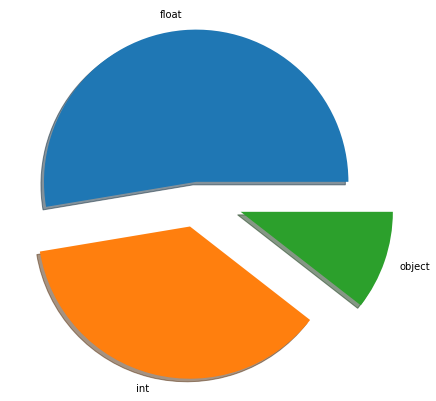

In [86]:
# Faire un graphique avec des différents types de données

piechart = df_build.dtypes.value_counts()

# Rajouter légende
legende = ['float', 'int', 'object']

# Creating explode data 
explode = (0.1, 0.2, 0.3) 
  
# Creating color parameters 
colors = ('cyan', 'brown'
          'grey') 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : 'brown' } 

plt.pie(piechart, 
        explode = explode,
        labels = legende, 
        shadow = True, 
        #colors = colors,  ## Erreur ici
        #startangle = 90, 
        #wedgeprops = wp, 
        #textprops = dict(color ='red')
       )

<AxesSubplot:title={'center':'Remplissage des diverses colonnes du data set'}>

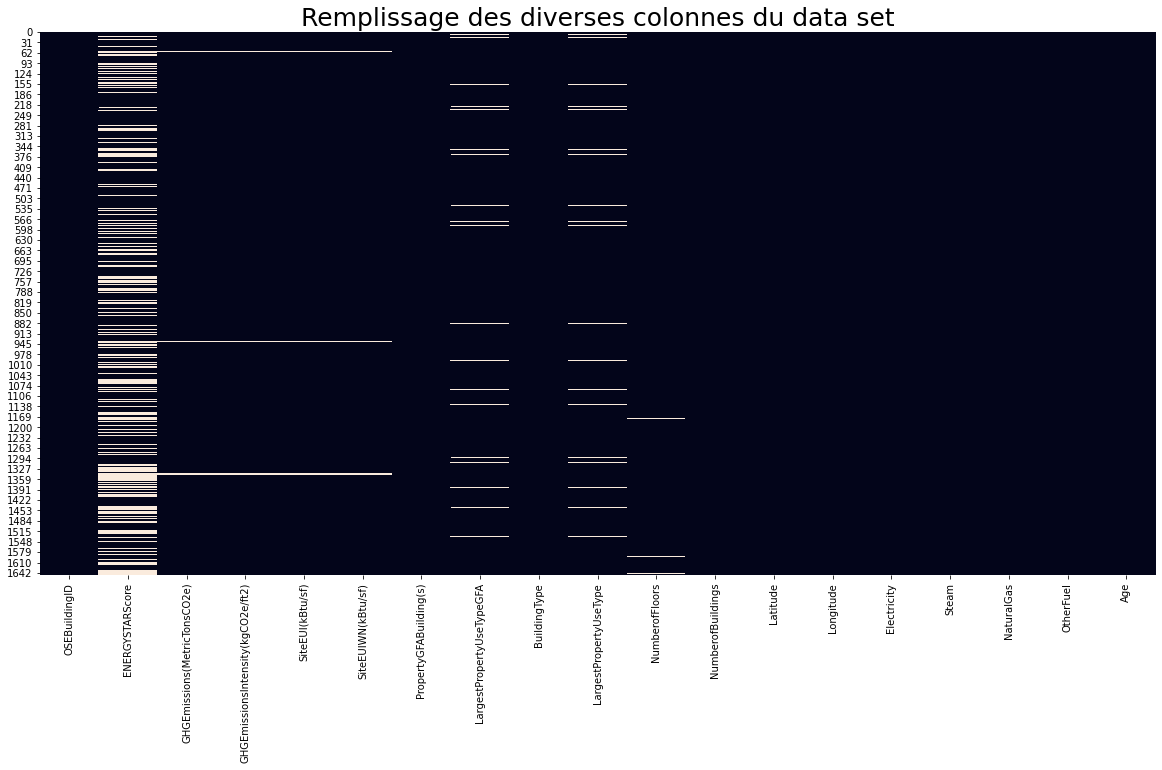

In [87]:
# Visualisation du remplissage du data set 

#Taille
plt.figure(figsize=(20,10))

# Titre 
plt.title('Remplissage des diverses colonnes du data set', size=25)

# Rotation à 45° des xticks
plt.xticks(rotation=45)

sns.heatmap(df_build.isna(), cbar=False) #cbar=False


In [88]:
# Taux de valeurs manquantes par colonnes
missing_rate = df_build.isna().sum()/df_build.shape[0]

# Trier par ordre croissant
missing_rate.sort_values(ascending=True)

OSEBuildingID                        0.000000
NaturalGas                           0.000000
Steam                                0.000000
Electricity                          0.000000
Longitude                            0.000000
Latitude                             0.000000
NumberofBuildings                    0.000000
OtherFuel                            0.000000
Age                                  0.000000
PropertyGFABuilding(s)               0.000000
BuildingType                         0.000000
SiteEUIWN(kBtu/sf)                   0.003704
SiteEUI(kBtu/sf)                     0.003704
GHGEmissionsIntensity(kgCO2e/ft2)    0.003704
GHGEmissions(MetricTonsCO2e)         0.003704
NumberofFloors                       0.004938
LargestPropertyUseTypeGFA            0.036420
LargestPropertyUseType               0.036420
ENERGYSTARScore                      0.321605
dtype: float64

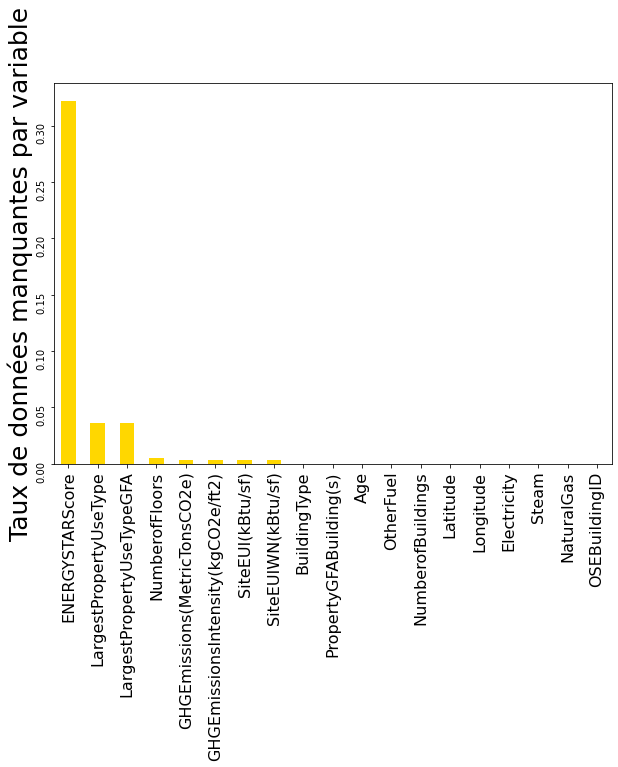

In [89]:
missing_rate.sort_values(ascending=False).plot.bar(color='gold')

# Titre
plt.ylabel('Taux de données manquantes par variable', size=25)
#plt.title()

# Taille figure
plt.rcParams['figure.figsize'] = (20,10)

# Taille xlabels
plt.xticks(size=16)

# Rotation à 90° des xticks
plt.yticks(rotation=90)

plt.show()

In [90]:
# Taux de remplissage par colonne
filling_rate = 1 - missing_rate

# Trier par ordre croissant
filling_rate.sort_values(ascending=True)

ENERGYSTARScore                      0.678395
LargestPropertyUseType               0.963580
LargestPropertyUseTypeGFA            0.963580
NumberofFloors                       0.995062
GHGEmissions(MetricTonsCO2e)         0.996296
GHGEmissionsIntensity(kgCO2e/ft2)    0.996296
SiteEUI(kBtu/sf)                     0.996296
SiteEUIWN(kBtu/sf)                   0.996296
NaturalGas                           1.000000
Steam                                1.000000
Electricity                          1.000000
Longitude                            1.000000
OSEBuildingID                        1.000000
NumberofBuildings                    1.000000
OtherFuel                            1.000000
BuildingType                         1.000000
PropertyGFABuilding(s)               1.000000
Latitude                             1.000000
Age                                  1.000000
dtype: float64

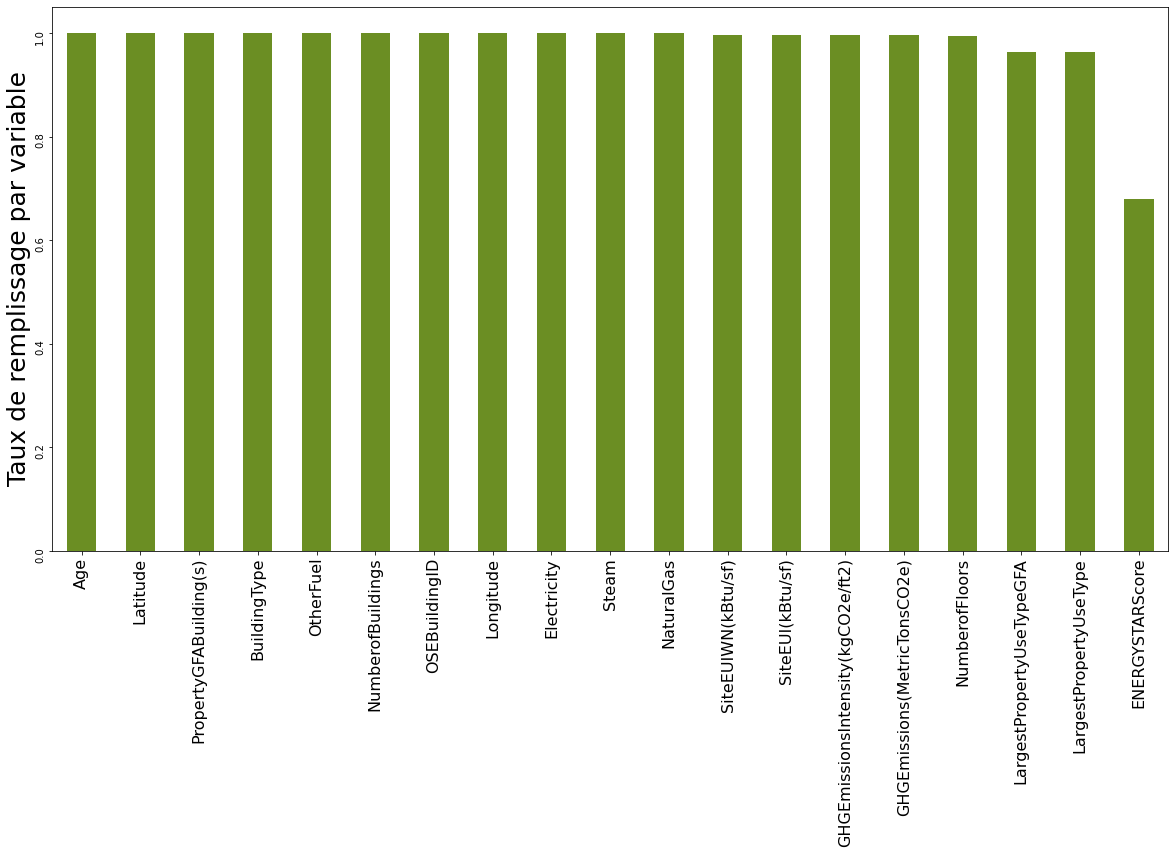

In [91]:
filling_rate.sort_values(ascending=False).plot.bar(color='olivedrab')

# Titre
plt.ylabel('Taux de remplissage par variable', size=25)
#plt.title()

# Taille figure
plt.rcParams['figure.figsize'] = (20,10)

# Taille xlabels
plt.xticks(size=16)

# Rotation à 90° des xticks
plt.yticks(rotation=90)

plt.show()

In [92]:
df_build.shape

(1620, 19)

In [93]:
# Rechercher les doublons 

# Afficher les doublons pour la colonne 'OSEBuildingID'
df_build[df_build.duplicated(['OSEBuildingID'], keep=False)]

Empty DataFrame
Columns: [OSEBuildingID, ENERGYSTARScore, GHGEmissions(MetricTonsCO2e), GHGEmissionsIntensity(kgCO2e/ft2), SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), PropertyGFABuilding(s), LargestPropertyUseTypeGFA, BuildingType, LargestPropertyUseType, NumberofFloors, NumberofBuildings, Latitude, Longitude, Electricity, Steam, NaturalGas, OtherFuel, Age]
Index: []

### Gestion des données manquantes

In [94]:
df_build = df_build.dropna(subset=['GHGEmissions(MetricTonsCO2e)', 
                                   'GHGEmissionsIntensity(kgCO2e/ft2)', 
                                   'SiteEUI(kBtu/sf)', 
                                   'SiteEUIWN(kBtu/sf)', 
                                   'LargestPropertyUseTypeGFA', 
                                   'NumberofFloors', 
                                   'LargestPropertyUseType'
                                  ], how='any')


# Vérification de la taille du df 
df_build.shape

(1547, 19)

## Analyses univariées du DF final

### Variables quantitatives

In [95]:
# Créer une liste avec les variables quantitatives

var_quantitatives_analyse = ['GHGEmissions(MetricTonsCO2e)', 
                             'GHGEmissionsIntensity(kgCO2e/ft2)', 
                             'SiteEUI(kBtu/sf)', 
                             'SiteEUIWN(kBtu/sf)',
                             'PropertyGFABuilding(s)', 
                             'LargestPropertyUseTypeGFA',
                             'NumberofFloors', 
                             'Age', 
                             'Latitude',
                             'Longitude'
                             #'NumberofBuildings' 
                            ]

GHGEmissions(MetricTonsCO2e)
moy:
 163.88043309631558
med:
 48.31
mod:
 0     6.19
1     6.71
2    48.60
dtype: float64
var:
 313053.5555879834
ect:
 559.5118904795352
skw:
 13.481985393475938
kur:
 236.84954974454016
GHGEmissionsIntensity(kgCO2e/ft2)
moy:
 1.3445442792501592
med:
 0.66
mod:
 0    0.1
dtype: float64
var:
 4.311561443902314
ect:
 2.0764299756799685
skw:
 4.723750398307089
kur:
 40.85692830291029


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

SiteEUI(kBtu/sf)
moy:
 70.83846153846157
med:
 51.6
mod:
 0     9.2
1    38.9
dtype: float64
var:
 4921.626038486397
ect:
 70.15430163921809
skw:
 3.471980498431089
kur:
 19.289319361936627
SiteEUIWN(kBtu/sf)
moy:
 74.88914027149323
med:
 55.7
mod:
 0    0.0
dtype: float64
var:
 5184.929164548513
ect:
 72.00645224247972
skw:
 3.336090912539922
kur:
 17.767432212557516


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

PropertyGFABuilding(s)
moy:
 98749.93083387201
med:
 47215.0
mod:
 0    25920
dtype: int64
var:
 29431128411.02625
ect:
 171555.03027024958
skw:
 5.518357365066288
kur:
 40.318147377113185
LargestPropertyUseTypeGFA
moy:
 91526.8778280543
med:
 43000.0
mod:
 0    24000.0
1    30000.0
dtype: float64
var:
 25610425214.656593
ect:
 160032.57547967098
skw:
 5.365710624494032
kur:
 37.320619417612484


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

NumberofFloors
moy:
 4.157724628312864
med:
 2.0
mod:
 0    1.0
dtype: float64
var:
 44.36555603793916
ect:
 6.66074740835735
skw:
 6.072780950637582
kur:
 52.74474901392271
Age
moy:
 53.623787976729155
med:
 50.0
mod:
 0    115
dtype: int64
var:
 1069.063377247871
ect:
 32.696534636683914
skw:
 0.29355311371055826
kur:
 -1.0671156499990824
Latitude
moy:
 47.61610025580479
med:
 47.61229388
mod:
 0    47.525932
1    47.663757
dtype: float64
var:
 0.0023220618080281173
ect:
 0.04818777654165128
skw:
 0.24991181885949398
kur:
 -0.20323243662815127
Longitude
moy:
 -122.3335334434777
med:
 -122.33326629999999
mod:
 0   -122.330840
1   -122.300217
dtype: float64
var:
 0.0005924225068734748
ect:
 0.024339731035356058
skw:
 -0.09509040898552179
kur:
 0.7026909295416388


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

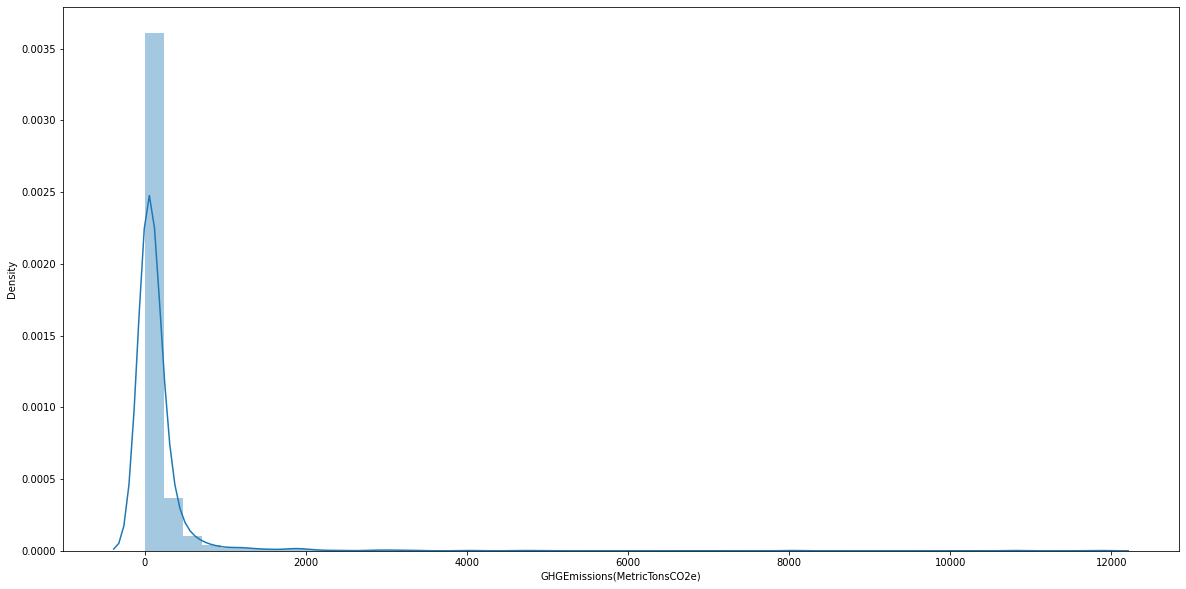

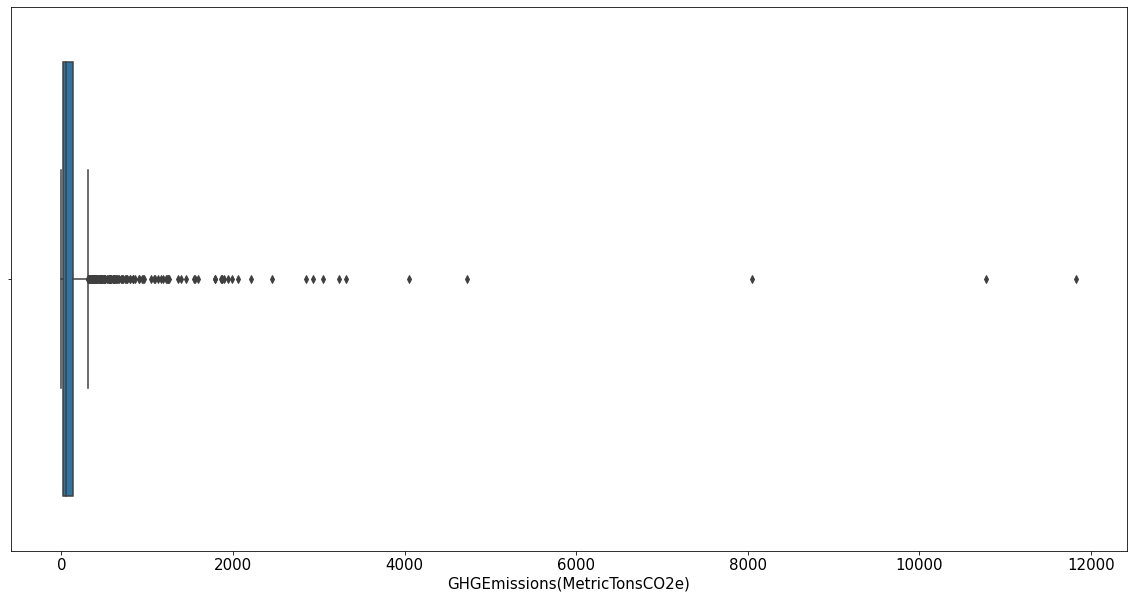

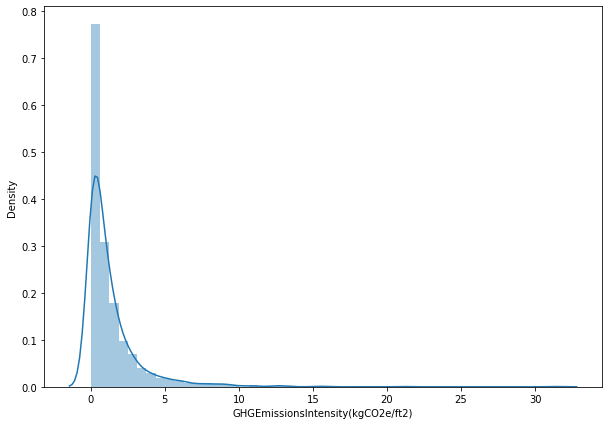

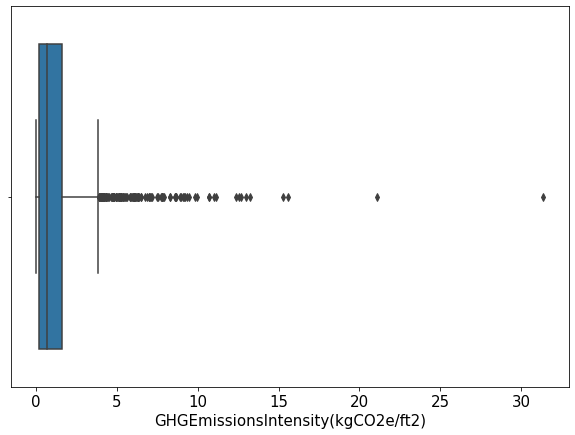

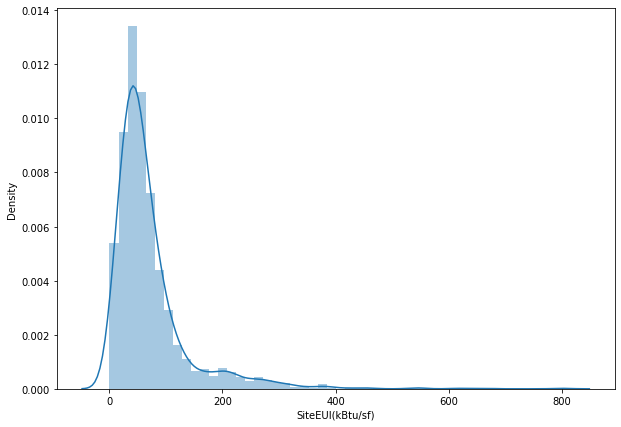

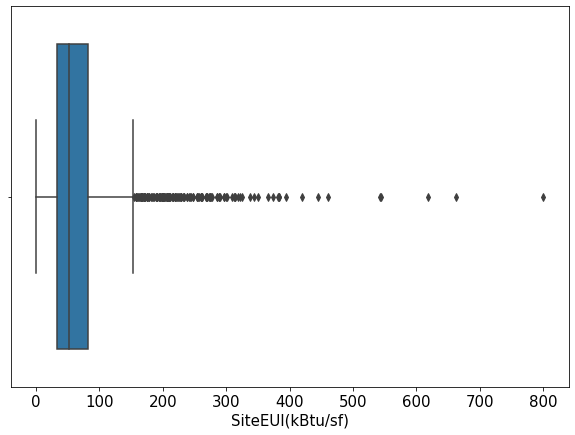

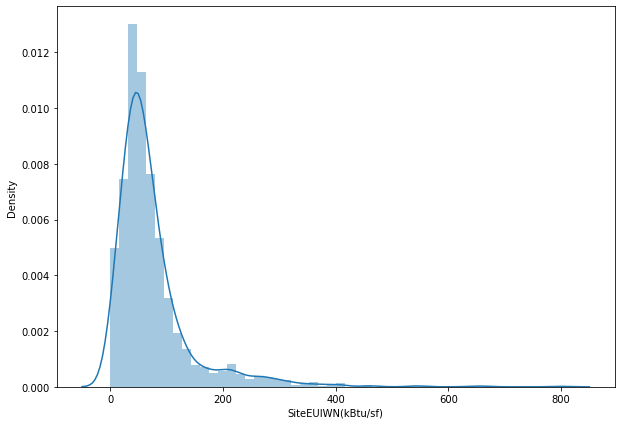

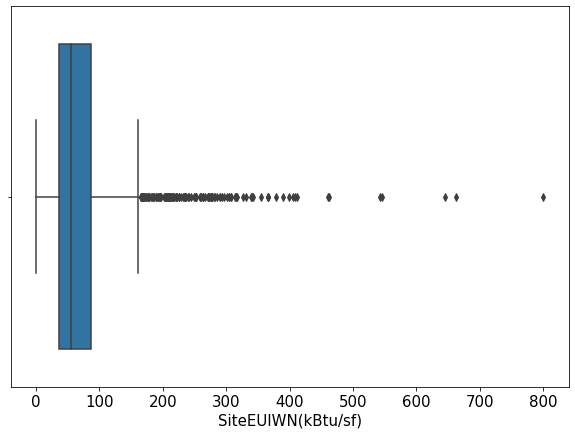

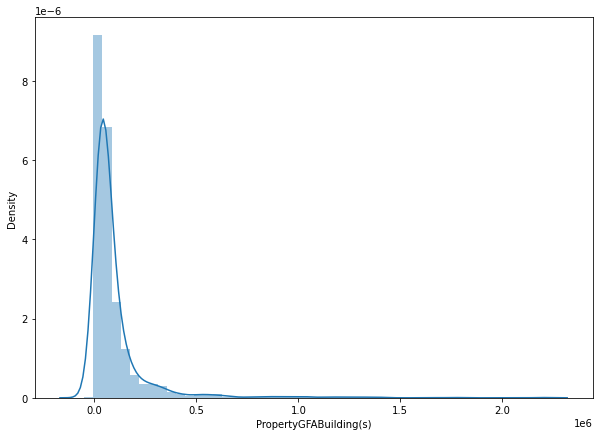

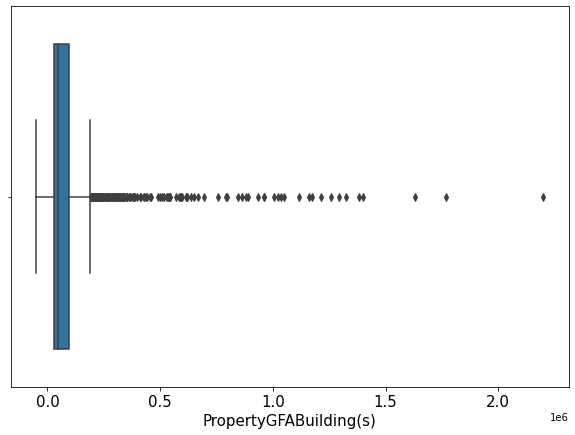

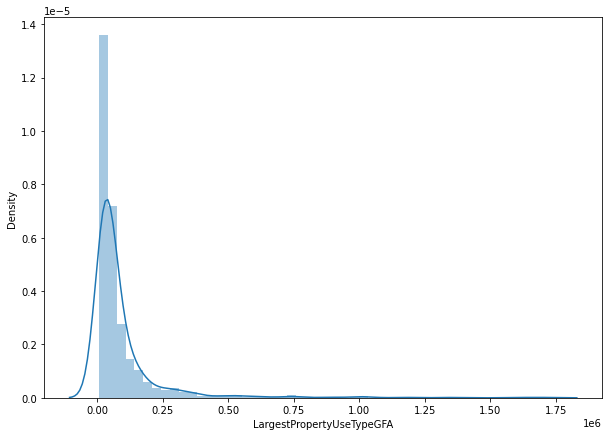

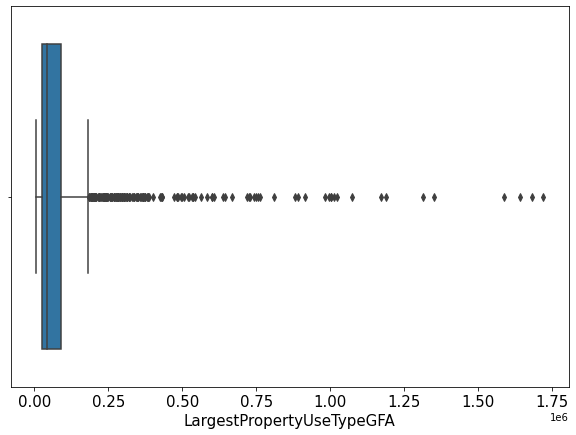

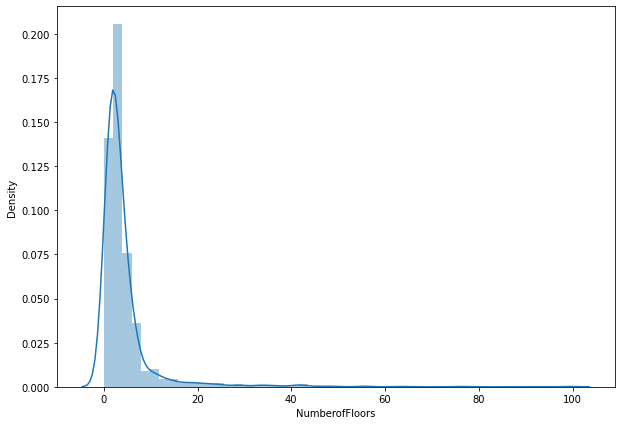

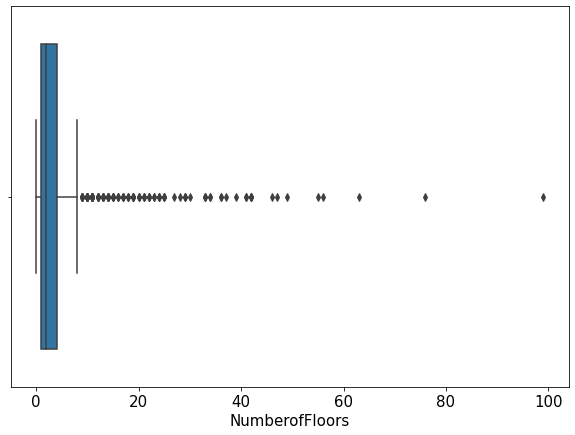

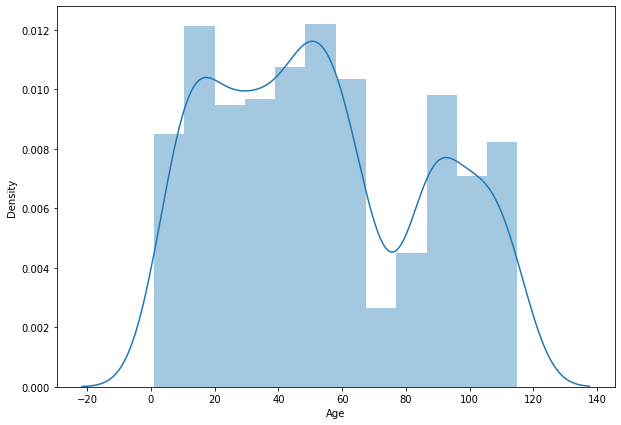

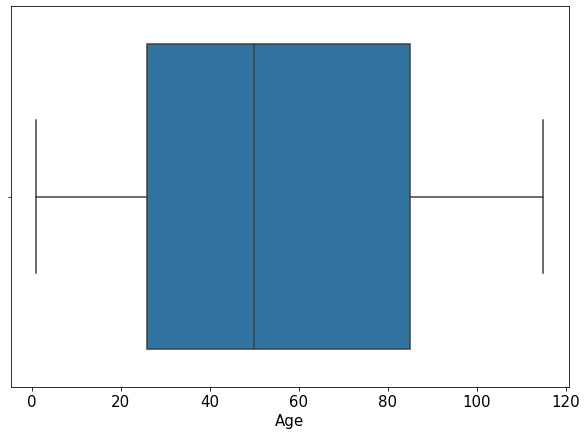

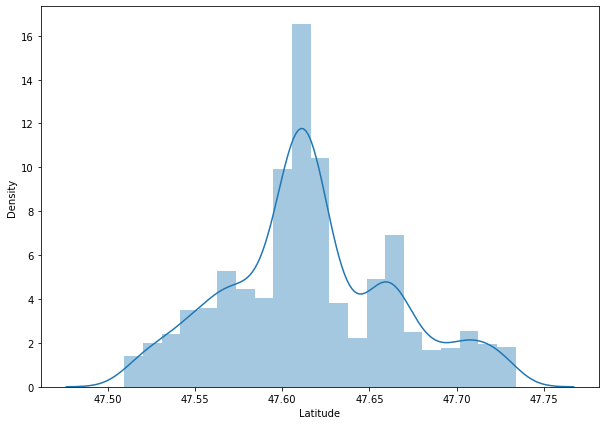

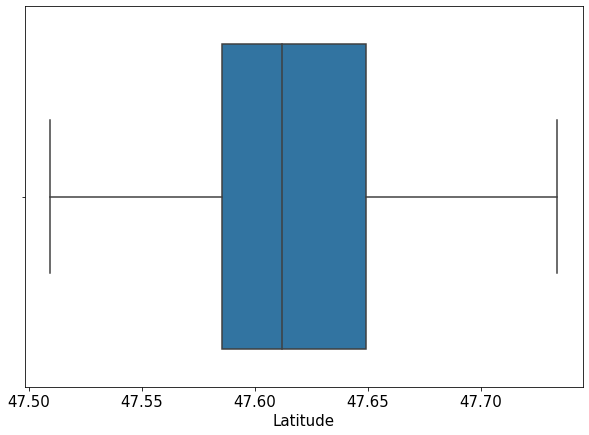

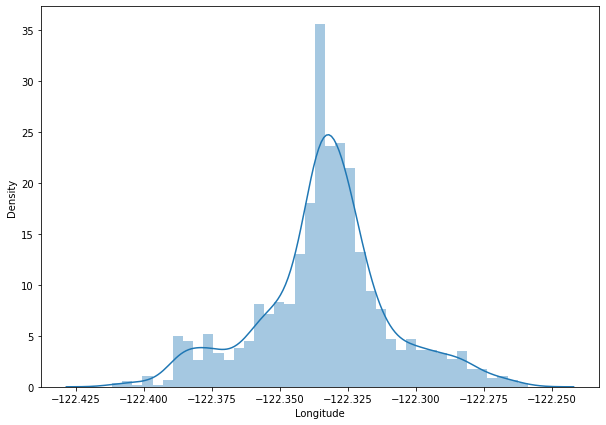

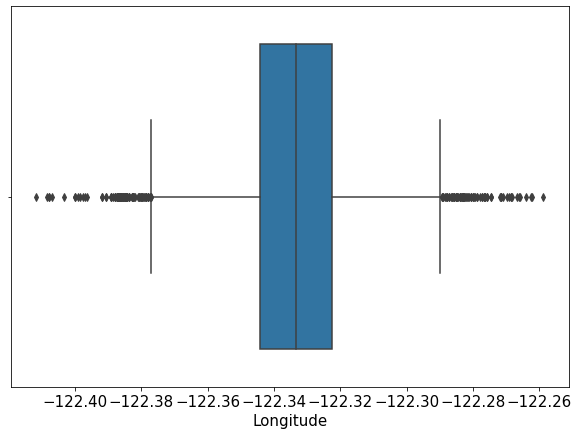

In [96]:
for col_name_quant in var_quantitatives_analyse: 
    print(col_name_quant)
    an_univariees_quant(df_build, col_name_quant) 

moy:
 1.0523594053005818
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 1.1847180919008786
ect:
 1.088447560473576
skw:
 29.731589043213784
kur:
 983.3148090908053


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NumberofBuildings'>

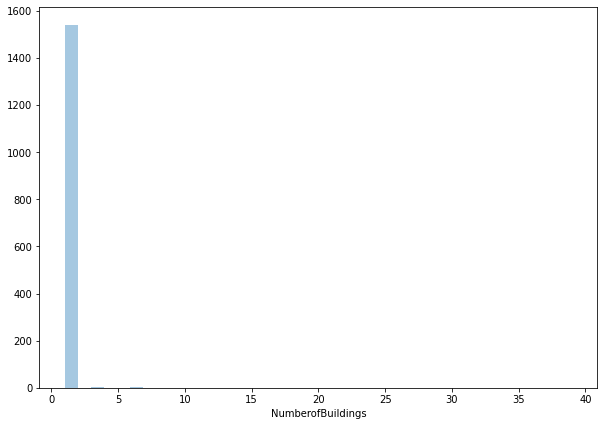

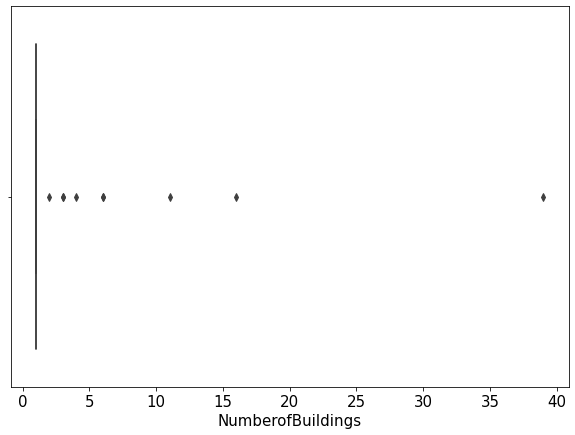

In [97]:
# Analyses pour 'NumberofBuildings’ 

 # Mesure de Tendance Centrale
print('moy:\n',df_build['NumberofBuildings'].mean())
print('med:\n',df_build['NumberofBuildings'].median())
print('mod:\n',df_build['NumberofBuildings'].mode())
    
    # Mesure de Dispersion 
print("var:\n",df_build['NumberofBuildings'].var(ddof=0))
print("ect:\n",df_build['NumberofBuildings'].std(ddof=0))
    
    # Mesure de Forme 
print("skw:\n",df_build['NumberofBuildings'].skew())
print("kur:\n",df_build['NumberofBuildings'].kurtosis())
    
plt.figure()
sns.distplot(df_build['NumberofBuildings'], kde=False)
plt.figure()
plt.rcParams['figure.figsize'] = (10,7)
# Taille xlabels
plt.xticks(size=15)
plt.xlabel('NumberofBuildings', size=15)
# Taille ylabels
plt.yticks(size=15)
sns.boxplot(df_build['NumberofBuildings'])

### Variables qualitatives

In [98]:
var_qualitatives_analyse = ['BuildingType', 
                            'LargestPropertyUseType', 
                            'Steam',
                            'Electricity',
                            'NaturalGas',
                            'OtherFuel']

In [99]:
for col_name in var_qualitatives_analyse: 
    an_univariees_qual(df_build, col_name) 

         BuildingType     n         f         F
3              Campus    20  0.012928  0.012928
0      NonResidential  1373  0.887524  0.900452
2  Nonresidential COS    65  0.042017  0.942469
1   SPS-District K-12    89  0.057531  1.000000
                               LargestPropertyUseType    n         f         F
39                                    Adult Education    2  0.001293  0.001293
28                              Automobile Dealership    5  0.003232  0.004525
34                                        Bank Branch    4  0.002586  0.007111
13                                 College/University   20  0.012928  0.020039
49                                  Convention Center    1  0.000646  0.020685
46                                         Courthouse    1  0.000646  0.021332
41                                        Data Center    2  0.001293  0.022624
7                                 Distribution Center   52  0.033613  0.056238
38                                   Financial Of

# Eliminer outliers

Enlever valeurs négatives

In [100]:
# Liste des variables quantitatives pour lesquelles des valeurs négatives n'ont pas de sens
no_val_neg = ['GHGEmissions(MetricTonsCO2e)', 
                             'GHGEmissionsIntensity(kgCO2e/ft2)', 
                             'SiteEUI(kBtu/sf)', 
                             'SiteEUIWN(kBtu/sf)',
                             'PropertyGFABuilding(s)', 
                             'LargestPropertyUseTypeGFA',
                             'NumberofFloors', 
                             'Age', 
                             'Latitude',
                             'NumberofBuildings' 
                            ]

In [101]:
# Filtrer toutes les valeurs strictement négatives 
for col in no_val_neg:
    filtre_neg = df_build[col] >= 0
    df_build=df_build[filtre_neg]

## Analyses bivariées du DF final

In [102]:
# Fonction de régression linéaire

import scipy.stats as st
import statsmodels.api as sm
import pingouin as pg

def reg_lin(df, var1, var2): 
    # Diagramme de dispersion
    sns.jointplot(x = var1, y= var2, data=df)
    
    # Calcul du Coefficient de Pearson et de la Covariance Empirique
    # Coefficient de Pearson
    rpearson = st.pearsonr(df[var1],df[var2])[0]
    print("Le r de pearson est {} rpearson".format(rpearson))
    # Covariance Empirique
    covar = np.cov(df[var1],df[var2],ddof=0)[1,0]
    print("La covariance empirique est {} covar".format(covar))
    
    x = df[var1].values
    y = df[var2].values
    print(pg.corr(x, y, tail='two-sided',method='pearson'))

In [103]:
# Fonction ANOVA

import scipy.stats as st
from scipy.stats import f_oneway
import pingouin as pg

def anova(df, var_quant, var_qual): 
    # Définir les variables
    X = var_qual 
    Y = var_quant 
    # Définir le sous echantillon testé
    sous_echantillon = df[[var_quant, var_qual]]
    
    # Définir les classes de X du test 
    liste_vecteur =[]
    liste_cat =[]
    for cat_qual in df[var_qual].unique(): 
        vecteur = df[df[var_qual] == cat_qual][Y].to_numpy()
        if len(vecteur)>1:
            liste_vecteur.append(vecteur)
            liste_cat.append(cat_qual)
    #print(liste_vecteur)
    #si variable len est =1 ne pas append()
    
    # Définir les classes Y du test 
    #modalites = sous_echantillon[X].unique()
    groupes = []
    for m in liste_cat:
        groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
        
    # Propriétés graphiques     
    medianprops = {'color':'black'}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    # Taille 
    plt.rcParams['figure.figsize'] = (25,15)
    # Axe des x
    plt.xlabel(var_quant, size=15)
    # Axe des y
    plt.ylabel(var_qual, size=15)
    # Plot
    plt.boxplot(groupes, labels=liste_cat, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()
    
    
    # Calculer eta carré (eta squared)
    def eta_squared(x,y):
        moyenne_y = y.mean()
        classes = []
        for classe in x.unique():
            yi_classe = y[x==classe]
            classes.append({'ni': len(yi_classe),
                            'moyenne_classe': yi_classe.mean()})
        SCT = sum([(yj-moyenne_y)**2 for yj in y])
        SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
        return SCE/SCT
    eta_squared(sous_echantillon[X],sous_echantillon[Y])
    
    # Significativité
    #Il faut des vecteurs et non pas une liste de vecteurs
    stat, p = f_oneway(*liste_vecteur)  
    alpha = 0.05
    
    # Déterminer si l'hypothèse est valide en fonction de la p-value
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p < alpha:
        print('Les variables sont corrélées (H0 est rejetée)')
    else:
        print('Les variables sont indépendantes (H0 n\'est pas rejetée)')
        
        
    # Statistiques
    aov = pg.anova(data = df, 
                   dv = var_quant, 
                   between = var_qual, 
                   detailed=True)
    print(aov)

In [104]:
# Fonction chi 2 

import scipy.stats as st
import statsmodels.api as sm
import pingouin as pg

def chi_2(df, var1, var2): 
    
    # Afficher le tableau de contingence 
    X = var1
    Y = var2

    # Définir data
    data = df
    # Sous-echantillon
    c = data[[X,Y]].pivot_table(index=X,columns=Y,
                                aggfunc=len,margins=True,
                                margins_name='Total')
    c

    # Afficher heat map
    tx = c.loc[:,['Total']]
    ty = c.loc[['Total'],:]
    n = len(data)
    indep = tx.dot(ty) / n
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    table = measure/xi_n
    sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1])
    plt.show()
    
    # Statistiques
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(c)
    print(st_chi2, st_p, st_dof, st_exp)    
    
    alpha = 0.05
    if st_p > alpha:
        print('Les variables sont indépendantes (H0 n\'est pas rejetée)')
    else:
        print('Les variables sont corrélées (H0 est rejetée)')

### Recherche de corrélation des targets entre elles

- H0 : les 2 variables sont indépendantes 
- H1 : les 2 variables sont corrélées

Le r de pearson est 0.726164647581819 rpearson
La covariance empirique est 108.67906999423968 covar
            n         r        CI95%        r2    adj_r2          p-val  \
pearson  1545  0.726165  [0.7, 0.75]  0.527315  0.526702  2.390519e-253   

               BF10  power  
pearson  1.765e+249    1.0  


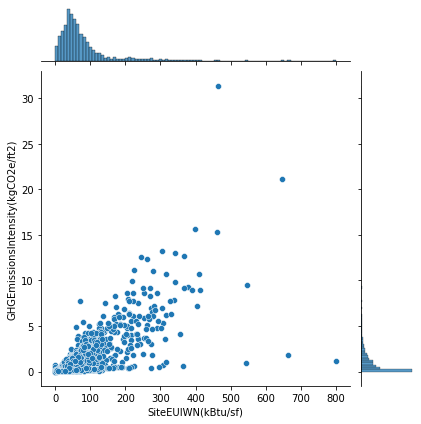

In [105]:
# Tester l'indépendance entre 'SiteEUI(kBtu/sf)' et 'GHGEmissionsIntensity(kgCO2e/ft2)'

reg_lin(df_build, 'SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity(kgCO2e/ft2)')

### Recherche de corrélation des features entre elles

- H0 : les 2 variables sont indépendantes 
- H1 : les 2 variables sont corrélées

Le r de pearson est 0.9604552681941927 rpearson
La covariance empirique est 26390027508.4211 covar
            n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  1545  0.960455  [0.96, 0.96]  0.922474  0.922374    0.0  inf    1.0


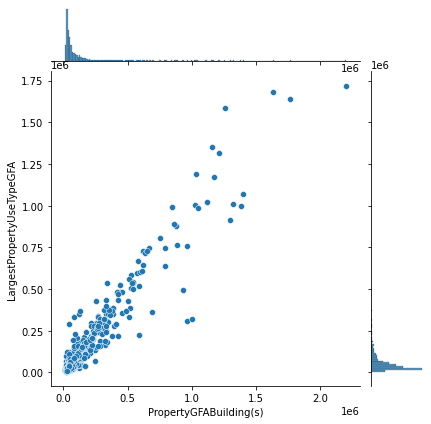

In [106]:
# Test d'indépendance entre 'PropertyGFABuilding(s)' et 'LargestPropertyUseTypeGFA'
reg_lin(df_build, 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA') 

Observations : Il y a une corrélation entre ces 2 features. On conserve 'PropertyGFABuilding(s)'.

Le r de pearson est 0.6052692076440364 rpearson
La covariance empirique est 692193.3597168023 covar
            n         r         CI95%        r2    adj_r2          p-val  \
pearson  1545  0.605269  [0.57, 0.64]  0.366351  0.365529  4.483998e-155   

               BF10  power  
pearson  1.512e+151    1.0  


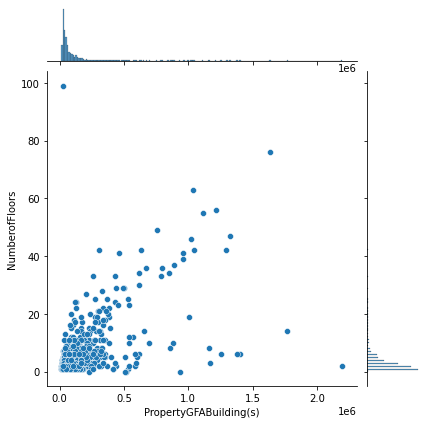

In [107]:
# Test d'indépendance entre 'PropertyGFABuilding(s)' et 'NumberofFloors'
reg_lin(df_build, 'PropertyGFABuilding(s)', 'NumberofFloors') 

Le r de pearson est -0.16721890753194463 rpearson
La covariance empirique est -937840.8972553699 covar
            n         r           CI95%        r2    adj_r2         p-val  \
pearson  1545 -0.167219  [-0.22, -0.12]  0.027962  0.026701  3.738452e-11   

              BF10     power  
pearson  9.855e+07  0.999998  


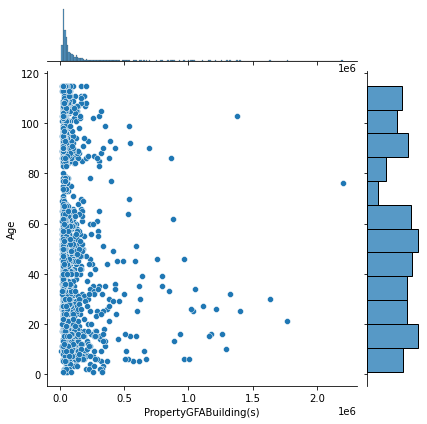

In [108]:
# Test d'indépendance entre 'PropertyGFABuilding(s)' et 'Age'
reg_lin(df_build, 'PropertyGFABuilding(s)', 'Age') 

Le r de pearson est 0.30673768291675235 rpearson
La covariance empirique est 57323.98344675903 covar
            n         r         CI95%        r2    adj_r2         p-val  \
pearson  1545  0.306738  [0.26, 0.35]  0.094088  0.092913  5.129917e-35   

              BF10  power  
pearson  3.706e+31    1.0  


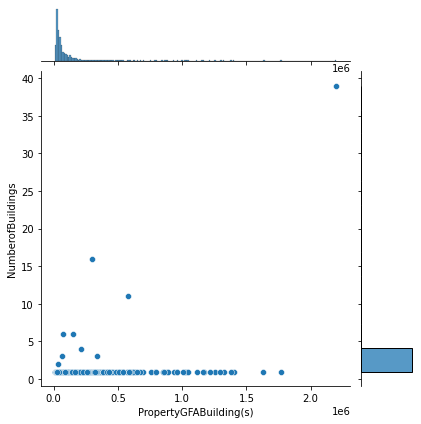

In [109]:
# Test d'indépendance entre 'PropertyGFABuilding(s)' et 'NumberofBuildings'
reg_lin(df_build, 'PropertyGFABuilding(s)', 'NumberofBuildings') 

Le r de pearson est 0.6107222101930209 rpearson
La covariance empirique est 651812.0030561053 covar
            n         r         CI95%        r2    adj_r2          p-val  \
pearson  1545  0.610722  [0.58, 0.64]  0.372982  0.372168  1.327707e-158   

               BF10  power  
pearson  5.007e+154    1.0  


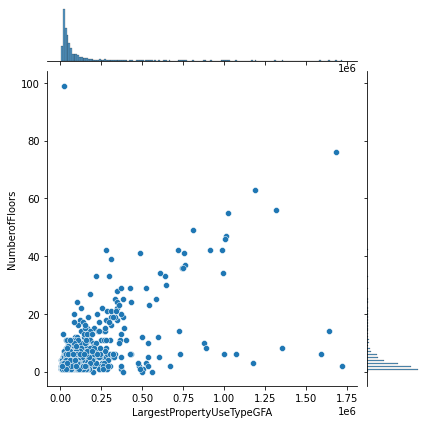

In [110]:
# Test d'indépendance entre 'PropertyGFABuilding(s)' et 'NumberofFloors'
reg_lin(df_build, 'LargestPropertyUseTypeGFA', 'NumberofFloors') 

Le r de pearson est -0.18958383660381145 rpearson
La covariance empirique est -992304.3253610666 covar
            n         r           CI95%        r2    adj_r2         p-val  \
pearson  1545 -0.189584  [-0.24, -0.14]  0.035942  0.034692  5.730953e-14   

              BF10  power  
pearson  5.651e+10    1.0  


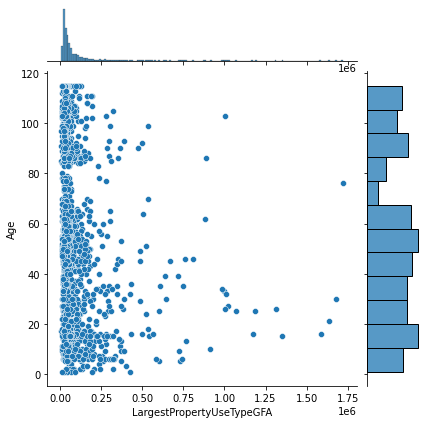

In [111]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'Age'
reg_lin(df_build, 'LargestPropertyUseTypeGFA', 'Age') 

Le r de pearson est 0.2649471233985584 rpearson
La covariance empirique est 46209.17648537406 covar
            n         r         CI95%        r2    adj_r2         p-val  \
pearson  1545  0.264947  [0.22, 0.31]  0.070197  0.068991  3.122491e-26   

              BF10  power  
pearson  7.217e+22    1.0  


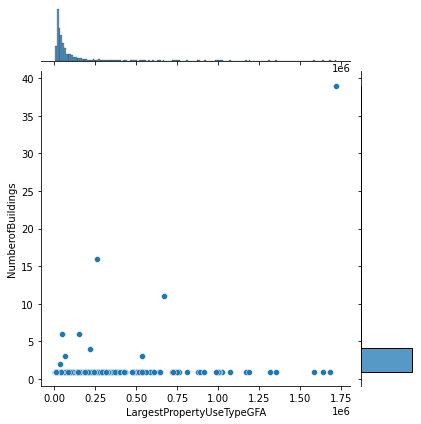

In [112]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'NumberofBuildings'
reg_lin(df_build, 'LargestPropertyUseTypeGFA', 'NumberofBuildings') 

Le r de pearson est -0.09481484136500096 rpearson
La covariance empirique est -20.65551596652737 covar
            n         r           CI95%       r2    adj_r2    p-val    BF10  \
pearson  1545 -0.094815  [-0.14, -0.05]  0.00899  0.007704  0.00019  33.524   

          power  
pearson  0.9621  


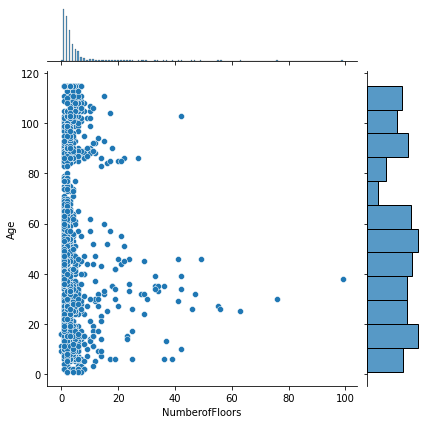

In [113]:
# Test d'indépendance entre 'NumberofFloors' et 'Age'
reg_lin(df_build, 'NumberofFloors', 'Age') 

Le r de pearson est -0.014693426541699504 rpearson
La covariance empirique est -0.10666163948848456 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545 -0.014693  [-0.06, 0.04]  0.000216 -0.001081  0.563865  0.038   

            power  
pearson  0.088943  


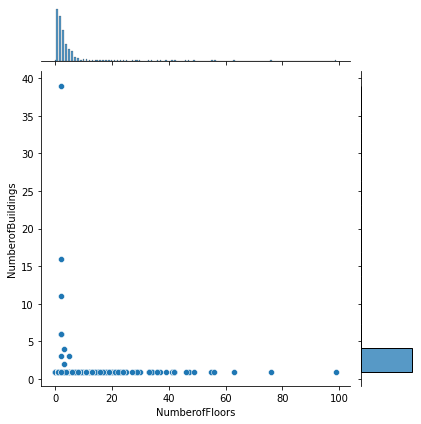

In [114]:
# Test d'indépendance entre 'NumberofFloors' et 'NumberofBuildings'
reg_lin(df_build, 'NumberofFloors', 'NumberofBuildings') 

Le r de pearson est 0.00073875494710904 rpearson
La covariance empirique est 0.026299682659377117 covar
            n         r          CI95%            r2    adj_r2     p-val  \
pearson  1545  0.000739  [-0.05, 0.05]  5.457589e-07 -0.001296  0.976853   

          BF10     power  
pearson  0.032  0.050086  


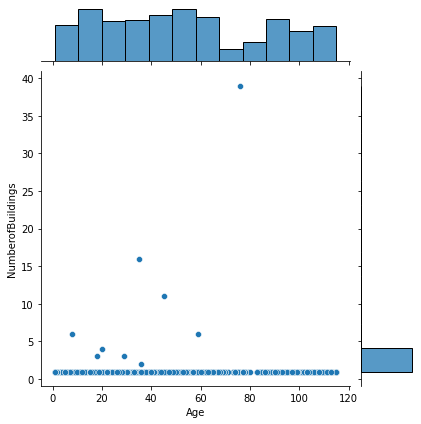

In [115]:
# Test d'indépendance entre 'Age' et 'NumberofBuildings'
reg_lin(df_build, 'Age', 'NumberofBuildings') 

Le r de pearson est -0.027332612872416794 rpearson
La covariance empirique est -226.06646452322133 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545 -0.027333  [-0.08, 0.02]  0.000747 -0.000549  0.282966  0.057   

           power  
pearson  0.18898  


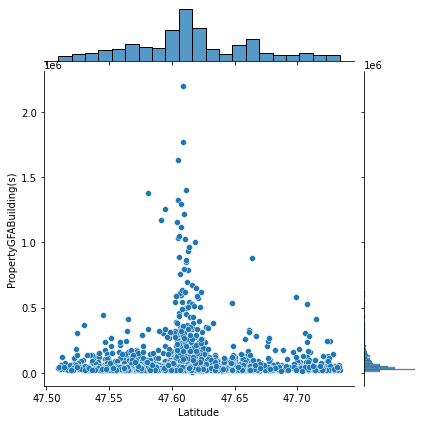

In [116]:
# Test d'indépendance entre 'Latitude' et 'PropertyGFABuilding(s)'
reg_lin(df_build, 'Latitude', 'PropertyGFABuilding(s)') 

Le r de pearson est -0.020147715298433354 rpearson
La covariance empirique est -155.5179734640011 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545 -0.020148  [-0.07, 0.03]  0.000406 -0.000891  0.428725  0.044   

            power  
pearson  0.124263  


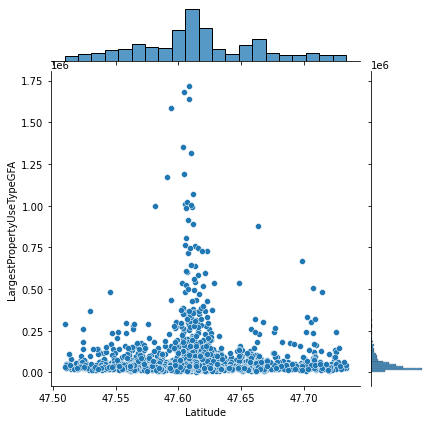

In [117]:
# Test d'indépendance entre 'Latitude' et 'LargestPropertyUseTypeGFA'
reg_lin(df_build, 'Latitude', 'LargestPropertyUseTypeGFA') 

Le r de pearson est -0.013608955449519854 rpearson
La covariance empirique est -0.004372156751873273 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545 -0.013609  [-0.06, 0.04]  0.000185 -0.001112  0.592987  0.037   

            power  
pearson  0.083318  


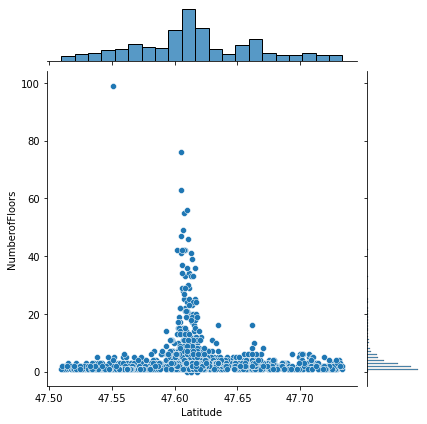

In [118]:
# Test d'indépendance entre 'Latitude' et 'NumberofFloors'
reg_lin(df_build, 'Latitude', 'NumberofFloors') 

Le r de pearson est -0.06375637484894911 rpearson
La covariance empirique est -0.10045220729578659 covar
            n         r           CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545 -0.063756  [-0.11, -0.01]  0.004065  0.002773  0.012191  0.735   

            power  
pearson  0.708077  


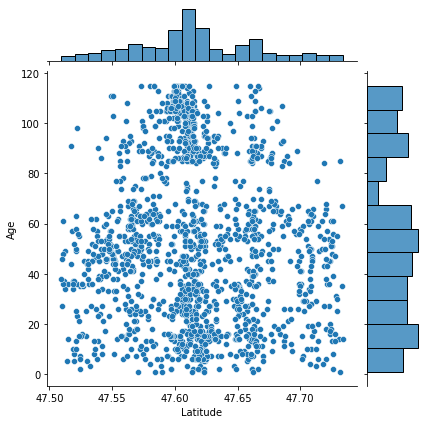

In [119]:
# Test d'indépendance entre 'Latitude' et 'Age'
reg_lin(df_build, 'Latitude', 'Age') 

Le r de pearson est -0.01610583112022398 rpearson
La covariance empirique est -0.0008455600453954517 covar
            n         r          CI95%        r2    adj_r2  p-val   BF10  \
pearson  1545 -0.016106  [-0.07, 0.03]  0.000259 -0.001037  0.527  0.039   

            power  
pearson  0.096958  


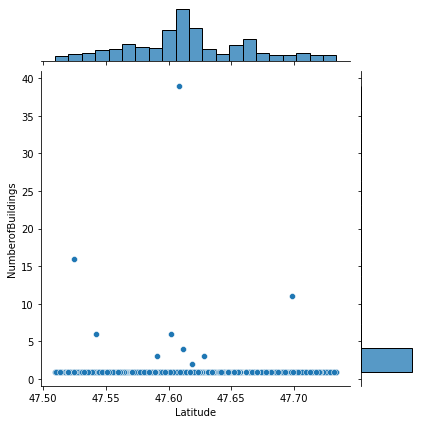

In [120]:
# Test d'indépendance entre 'Latitude' et 'NumberofBuildings'
reg_lin(df_build, 'Latitude', 'NumberofBuildings') 

Le r de pearson est -0.10060165156552425 rpearson
La covariance empirique est -0.0001180443728504879 covar
            n         r           CI95%        r2    adj_r2     p-val    BF10  \
pearson  1545 -0.100602  [-0.15, -0.05]  0.010121  0.008837  0.000075  80.801   

            power  
pearson  0.977523  


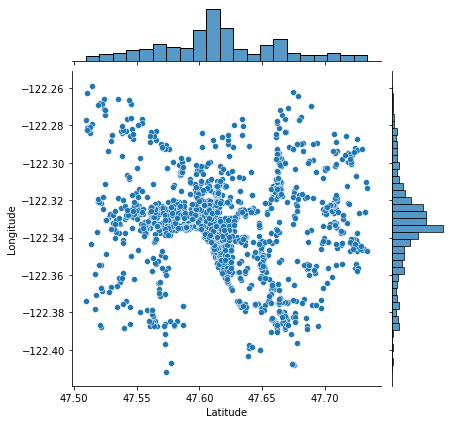

In [121]:
# Test d'indépendance entre 'Latitude' et 'Longitude'
reg_lin(df_build, 'Latitude', 'Longitude') 

Le r de pearson est 0.010185770736591737 rpearson
La covariance empirique est 42.54435974062281 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545  0.010186  [-0.04, 0.06]  0.000104 -0.001193  0.689117  0.035   

            power  
pearson  0.068521  


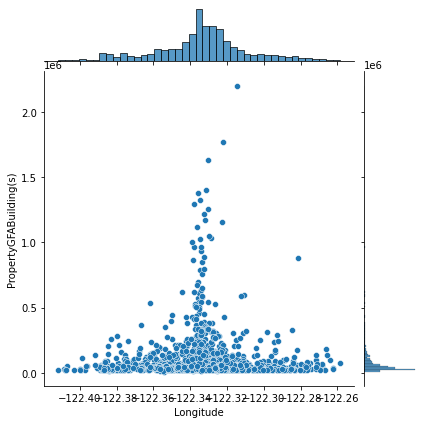

In [122]:
# Test d'indépendance entre 'Longitude' et 'PropertyGFABuilding(s)'
reg_lin(df_build, 'Longitude', 'PropertyGFABuilding(s)')

Le r de pearson est 0.012973148243145698 rpearson
La covariance empirique est 50.57003650600719 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545  0.012973  [-0.04, 0.06]  0.000168 -0.001128  0.610375  0.036   

            power  
pearson  0.080232  


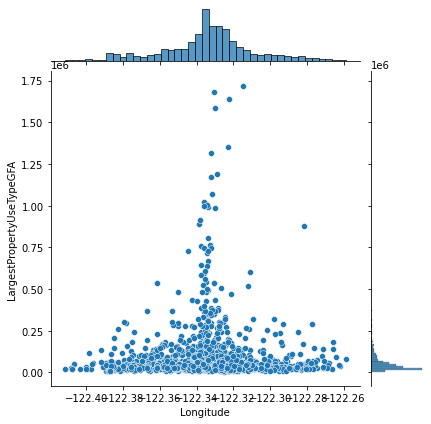

In [123]:
# Test d'indépendance entre 'Longitude' et 'LargestPropertyUseTypeGFA'
reg_lin(df_build, 'Longitude', 'LargestPropertyUseTypeGFA')

Le r de pearson est -0.0012647881396457969 rpearson
La covariance empirique est -0.0002052021087170826 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1545 -0.001265  [-0.05, 0.05]  0.000002 -0.001295  0.960382  0.032   

            power  
pearson  0.050272  


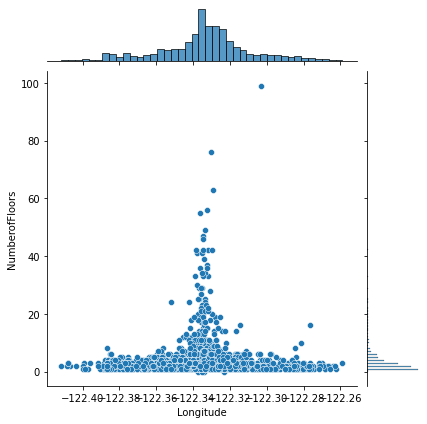

In [124]:
# Test d'indépendance entre 'Longitude' et 'NumberofFloors'
reg_lin(df_build, 'Longitude', 'NumberofFloors')

Le r de pearson est -0.013655224607184067 rpearson
La covariance empirique est -0.010864952204755566 covar
            n         r          CI95%        r2   adj_r2     p-val   BF10  \
pearson  1545 -0.013655  [-0.06, 0.04]  0.000186 -0.00111  0.591731  0.037   

            power  
pearson  0.083549  


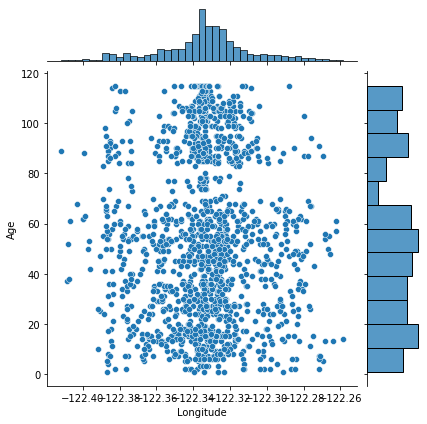

In [125]:
# Test d'indépendance entre 'Longitude' et 'Age'
reg_lin(df_build, 'Longitude', 'Age')

Le r de pearson est 0.031239670237315425 rpearson
La covariance empirique est 0.0008282488788382368 covar
            n        r          CI95%        r2   adj_r2     p-val   BF10  \
pearson  1545  0.03124  [-0.02, 0.08]  0.000976 -0.00032  0.219737  0.068   

            power  
pearson  0.232641  


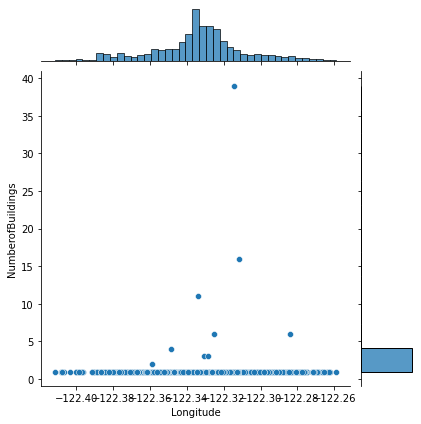

In [126]:
# Test d'indépendance entre 'Longitude' et 'NumberofBuildings'
reg_lin(df_build, 'Longitude', 'NumberofBuildings')

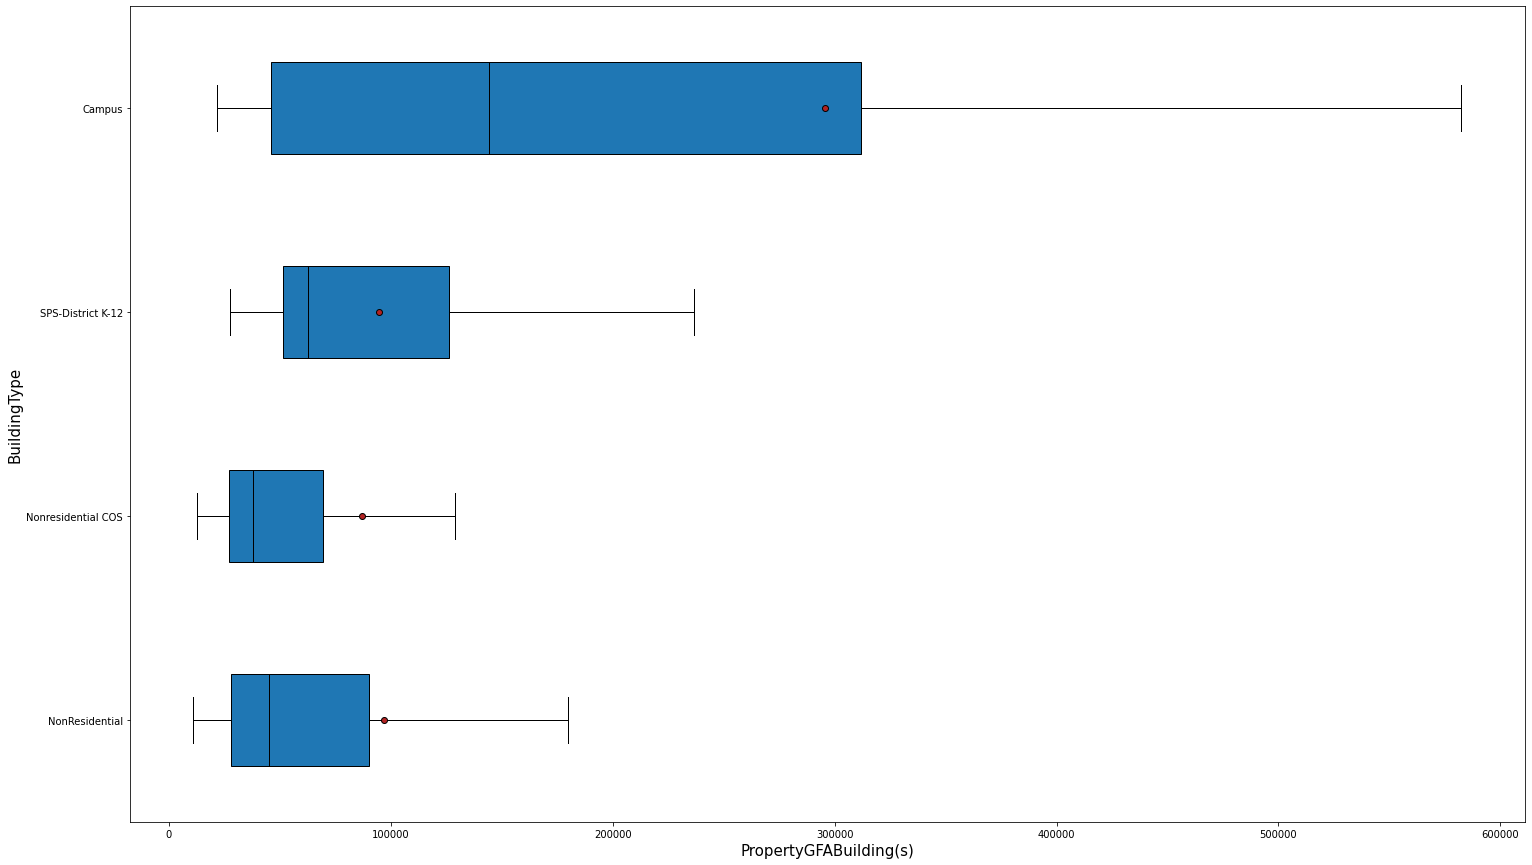

stat=9.096, p=0.000
Les variables sont corrélées (H0 est rejetée)
         Source            SS    DF            MS         F     p-unc  \
0  BuildingType  7.914411e+11     3  2.638137e+11  9.095602  0.000006   
1        Within  4.469599e+13  1541  2.900453e+10       NaN       NaN   

        np2  
0  0.017399  
1       NaN  


In [127]:
# Test d'indépendance entre 'Latitude' et 'BuildingType'
anova(df_build, 'PropertyGFABuilding(s)', 'BuildingType') 

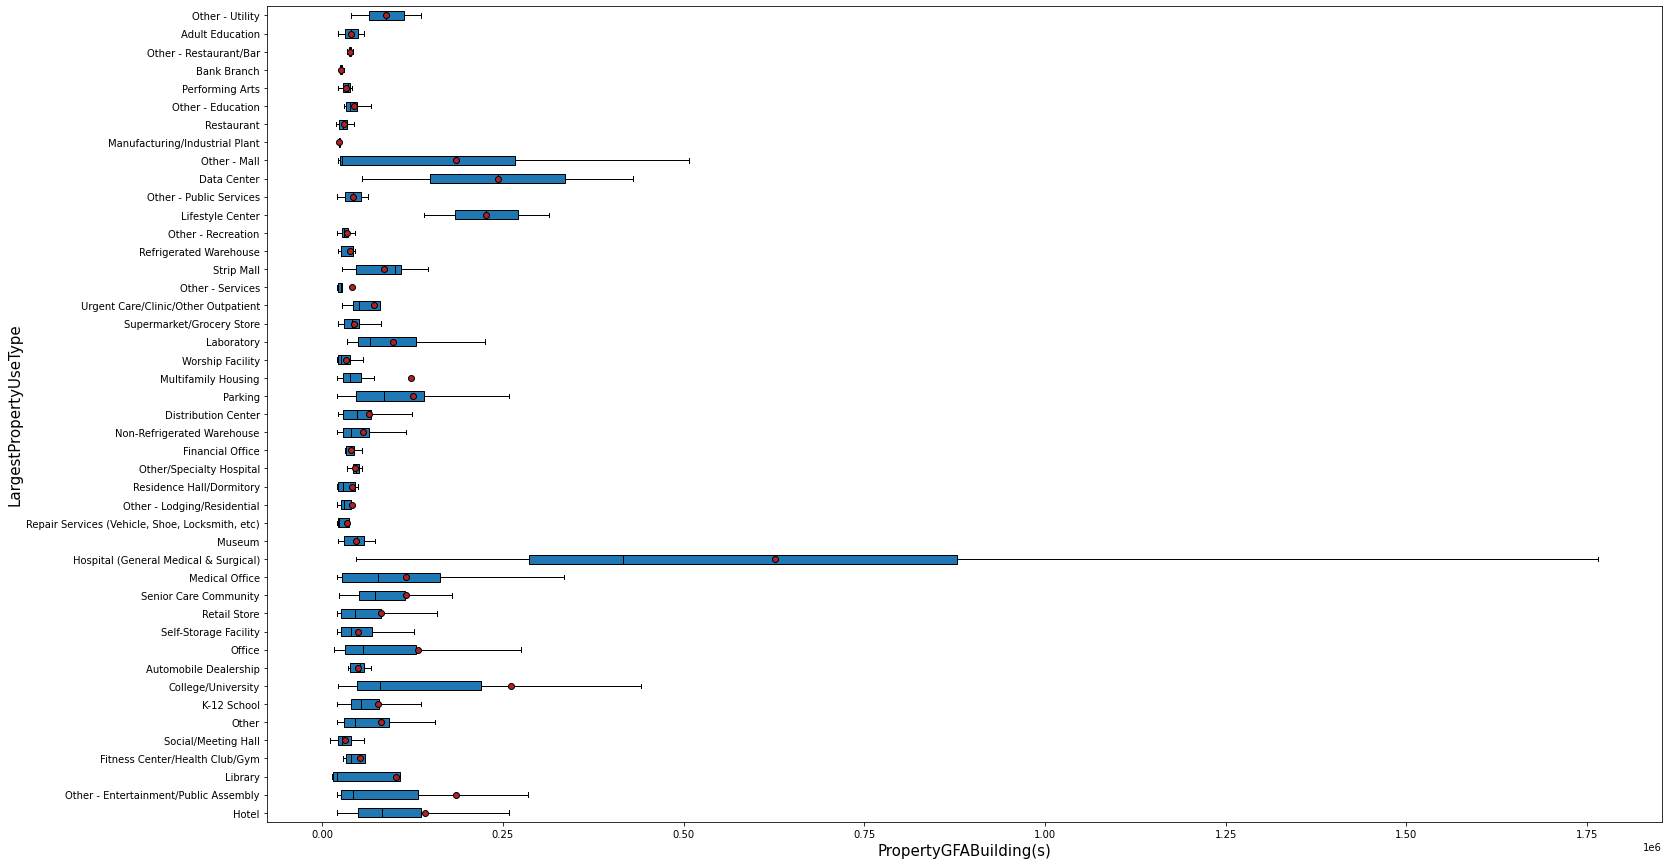

stat=4.841, p=0.000
Les variables sont corrélées (H0 est rejetée)
                   Source            SS    DF            MS         F  \
0  LargestPropertyUseType  7.369357e+12    54  1.364696e+11  5.334469   
1                  Within  3.811807e+13  1490  2.558260e+10       NaN   

          p-unc       np2  
0  4.165230e-30  0.162009  
1           NaN       NaN  


In [128]:
# Test d'indépendance entre 'Latitude' et 'LargestPropertyUseType'
anova(df_build, 'PropertyGFABuilding(s)', 'LargestPropertyUseType') 

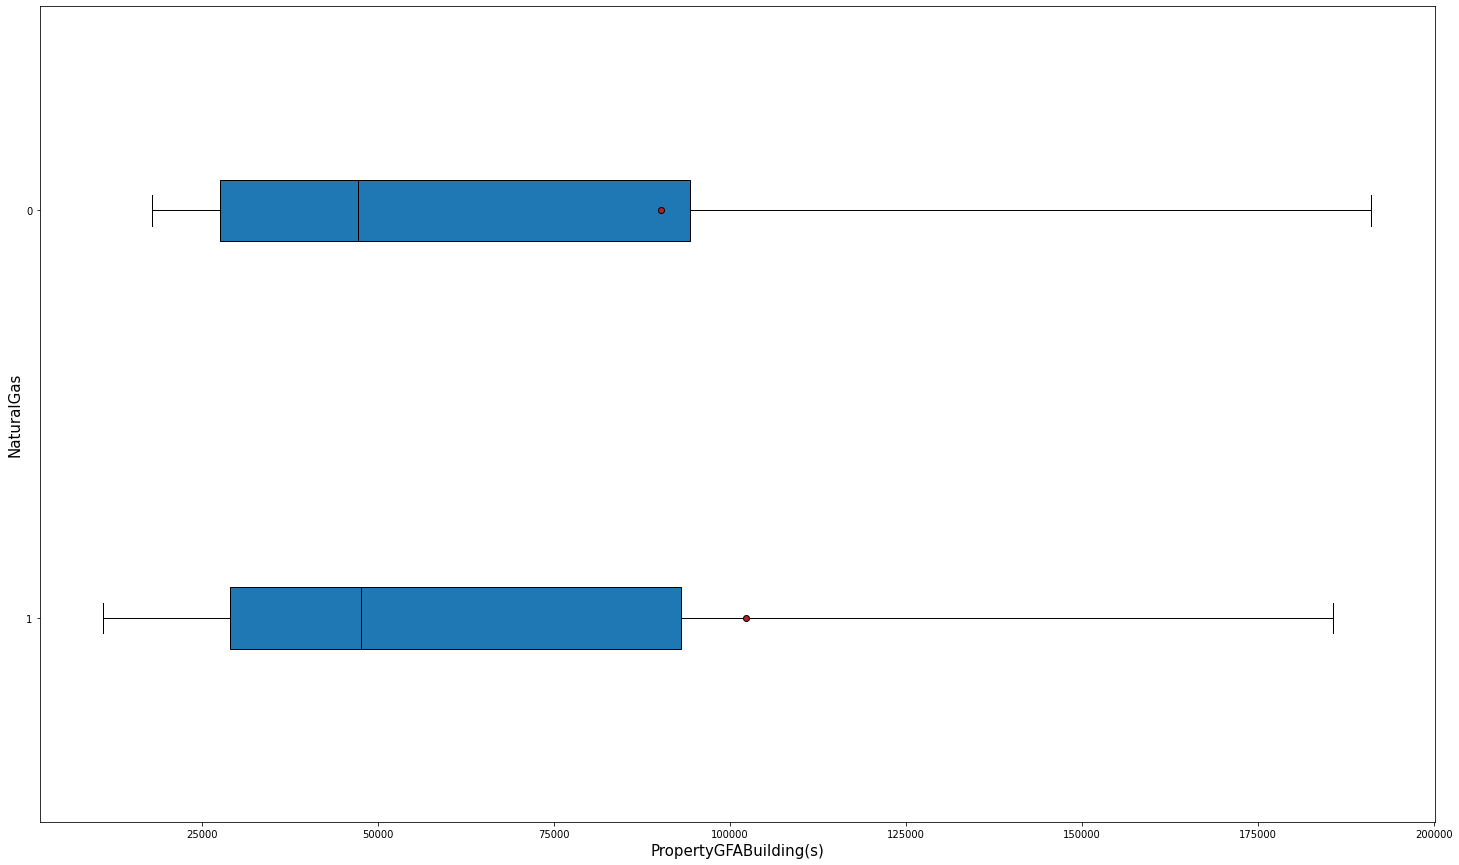

stat=1.569, p=0.211
Les variables sont indépendantes (H0 n'est pas rejetée)
       Source            SS    DF            MS         F     p-unc       np2
0  NaturalGas  4.621261e+10     1  4.621261e+10  1.569193  0.210514  0.001016
1      Within  4.544122e+13  1543  2.944991e+10       NaN       NaN       NaN


In [129]:
# Test d'indépendance entre 'PropertyGFABuilding' et 'NaturalGas'
anova(df_build, 'PropertyGFABuilding(s)', 'NaturalGas') 

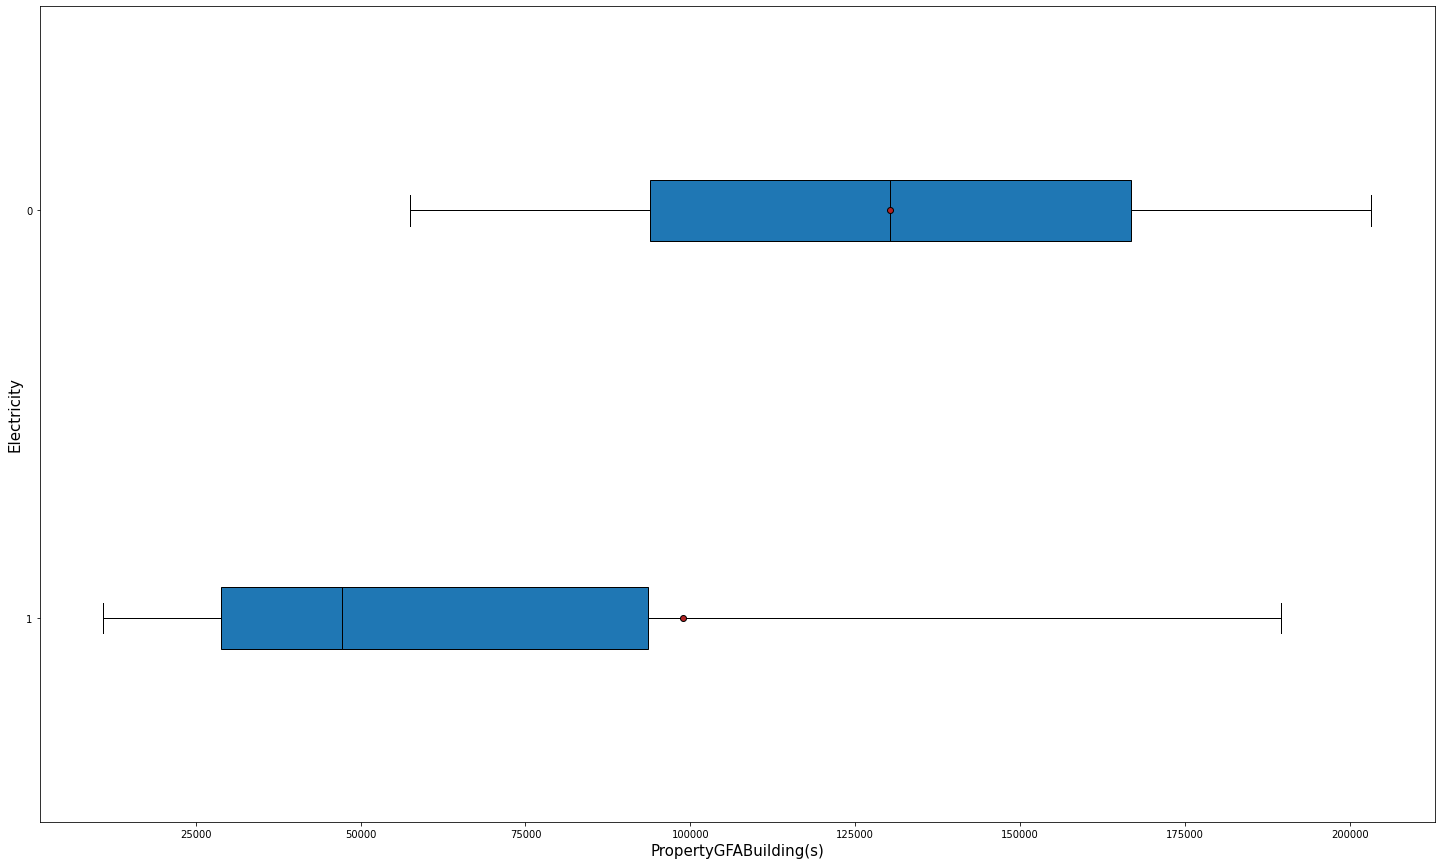

stat=0.067, p=0.796
Les variables sont indépendantes (H0 n'est pas rejetée)
        Source            SS    DF            MS         F     p-unc       np2
0  Electricity  1.974600e+09     1  1.974600e+09  0.066984  0.795814  0.000043
1       Within  4.548545e+13  1543  2.947858e+10       NaN       NaN       NaN


In [130]:
# Test d'indépendance entre 'PropertyGFABuilding' et 'Electricity'
anova(df_build, 'PropertyGFABuilding(s)', 'Electricity') 

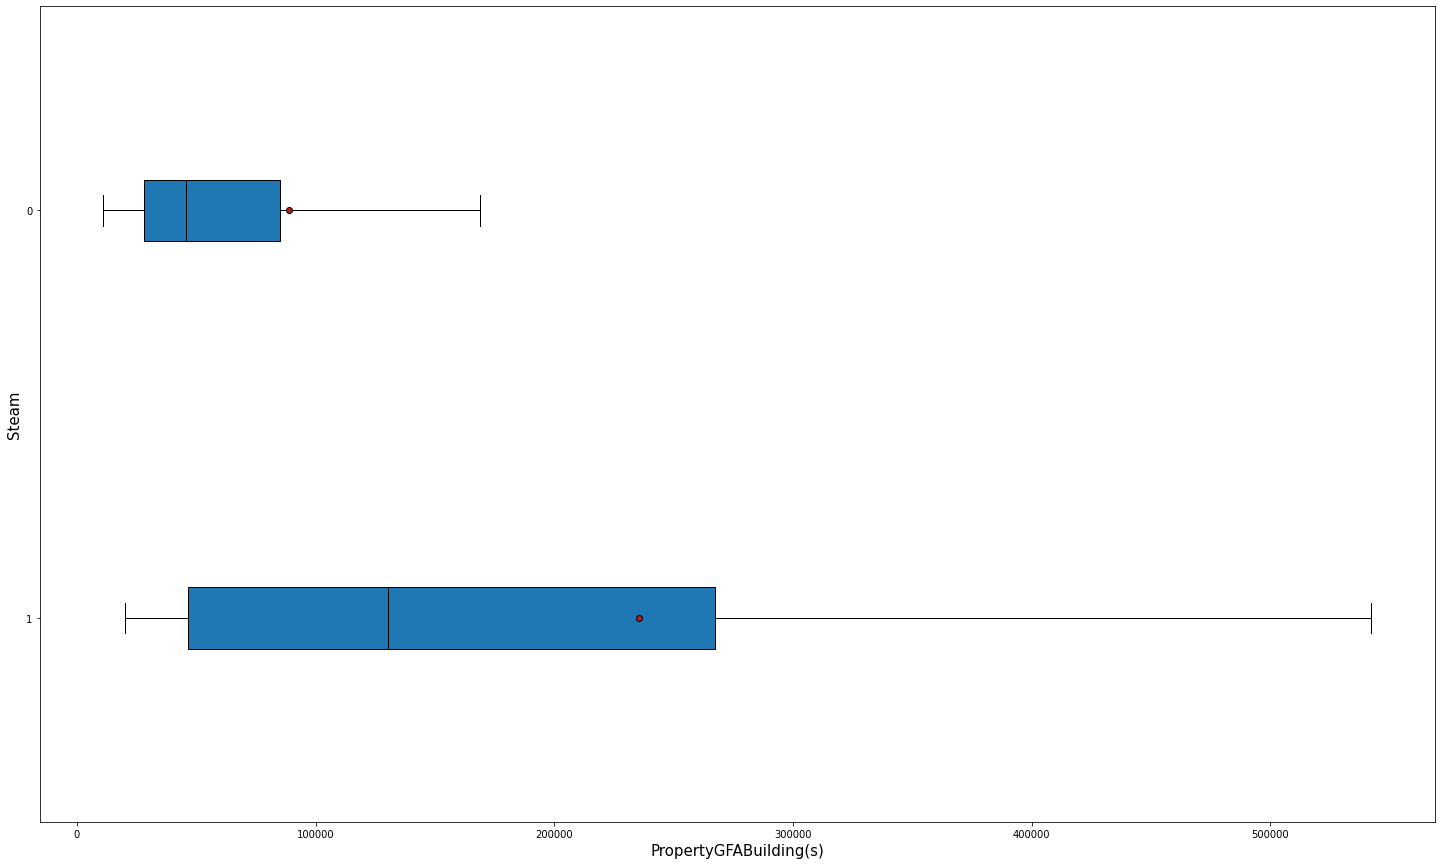

stat=74.909, p=0.000
Les variables sont corrélées (H0 est rejetée)
   Source            SS    DF            MS          F         p-unc     np2
0   Steam  2.106060e+12     1  2.106060e+12  74.908881  1.217709e-17  0.0463
1  Within  4.338137e+13  1543  2.811495e+10        NaN           NaN     NaN


In [131]:
# Test d'indépendance entre 'PropertyGFABuilding' et 'Steam'
anova(df_build, 'PropertyGFABuilding(s)', 'Steam') 

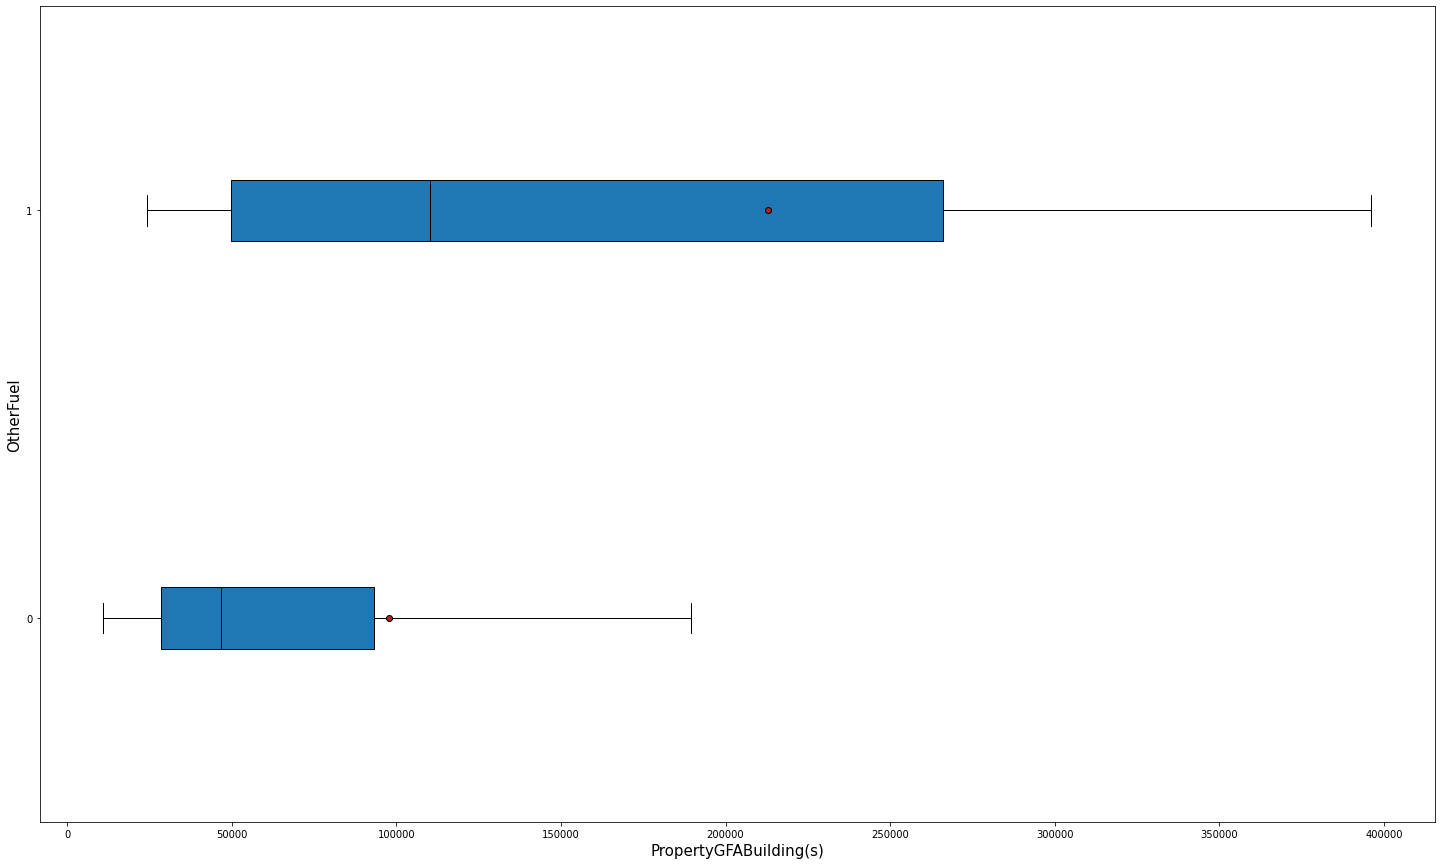

stat=6.261, p=0.012
Les variables sont corrélées (H0 est rejetée)
      Source            SS    DF            MS         F     p-unc       np2
0  OtherFuel  1.838390e+11     1  1.838390e+11  6.261394  0.012442  0.004042
1     Within  4.530359e+13  1543  2.936072e+10       NaN       NaN       NaN


In [132]:
# Test d'indépendance entre 'PropertyGFABuilding' et 'OtherFuel'
anova(df_build, 'PropertyGFABuilding(s)', 'OtherFuel') 

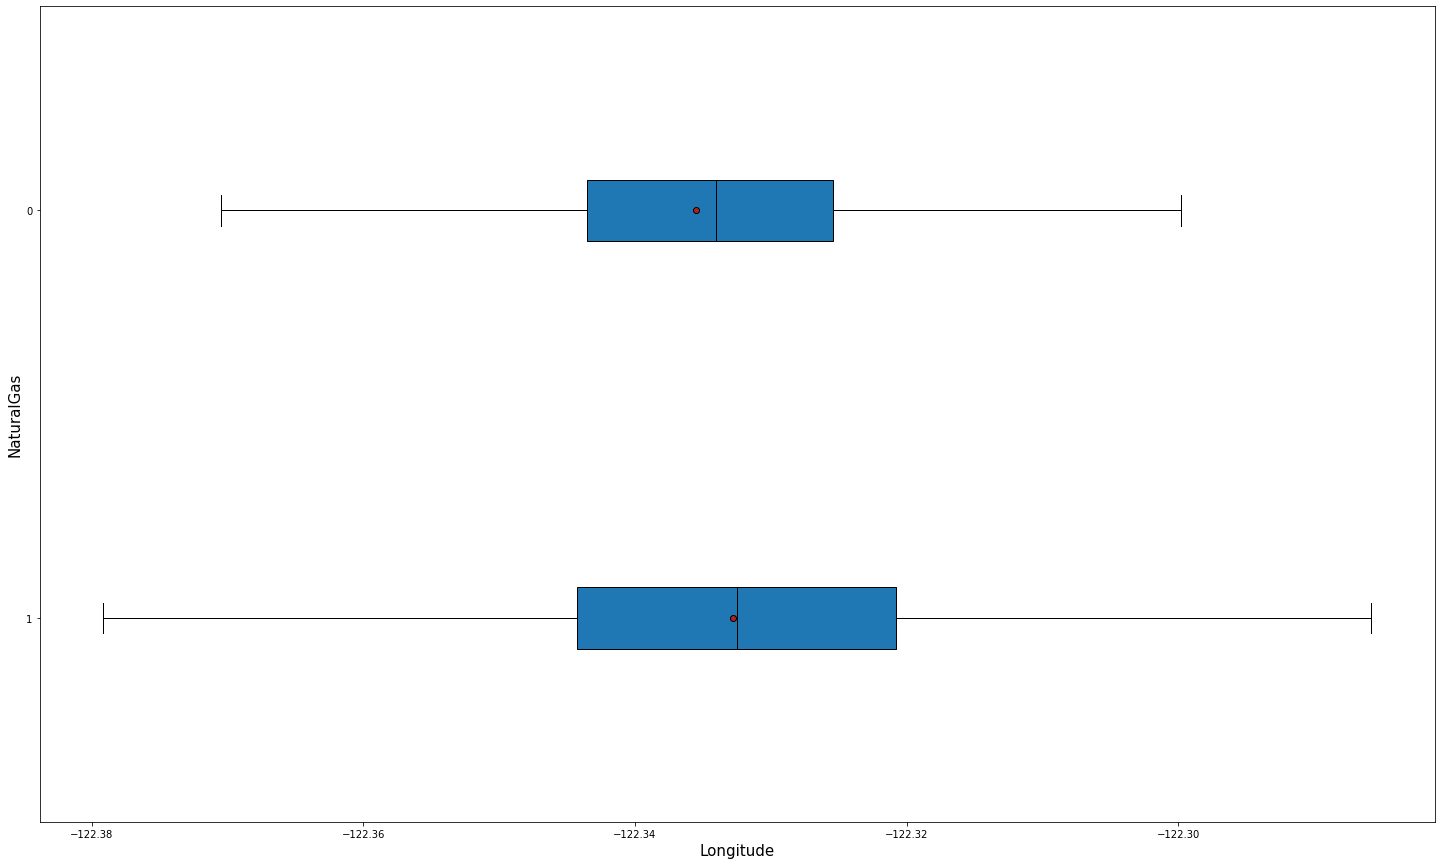

stat=3.869, p=0.049
Les variables sont corrélées (H0 est rejetée)
       Source        SS    DF        MS        F     p-unc       np2
0  NaturalGas  0.002290     1  0.002290  3.86944  0.049352  0.002501
1      Within  0.913217  1543  0.000592      NaN       NaN       NaN


In [133]:
# Test d'indépendance entre 'Longitude' et 'NaturalGas'
anova(df_build, 'Longitude', 'NaturalGas') 

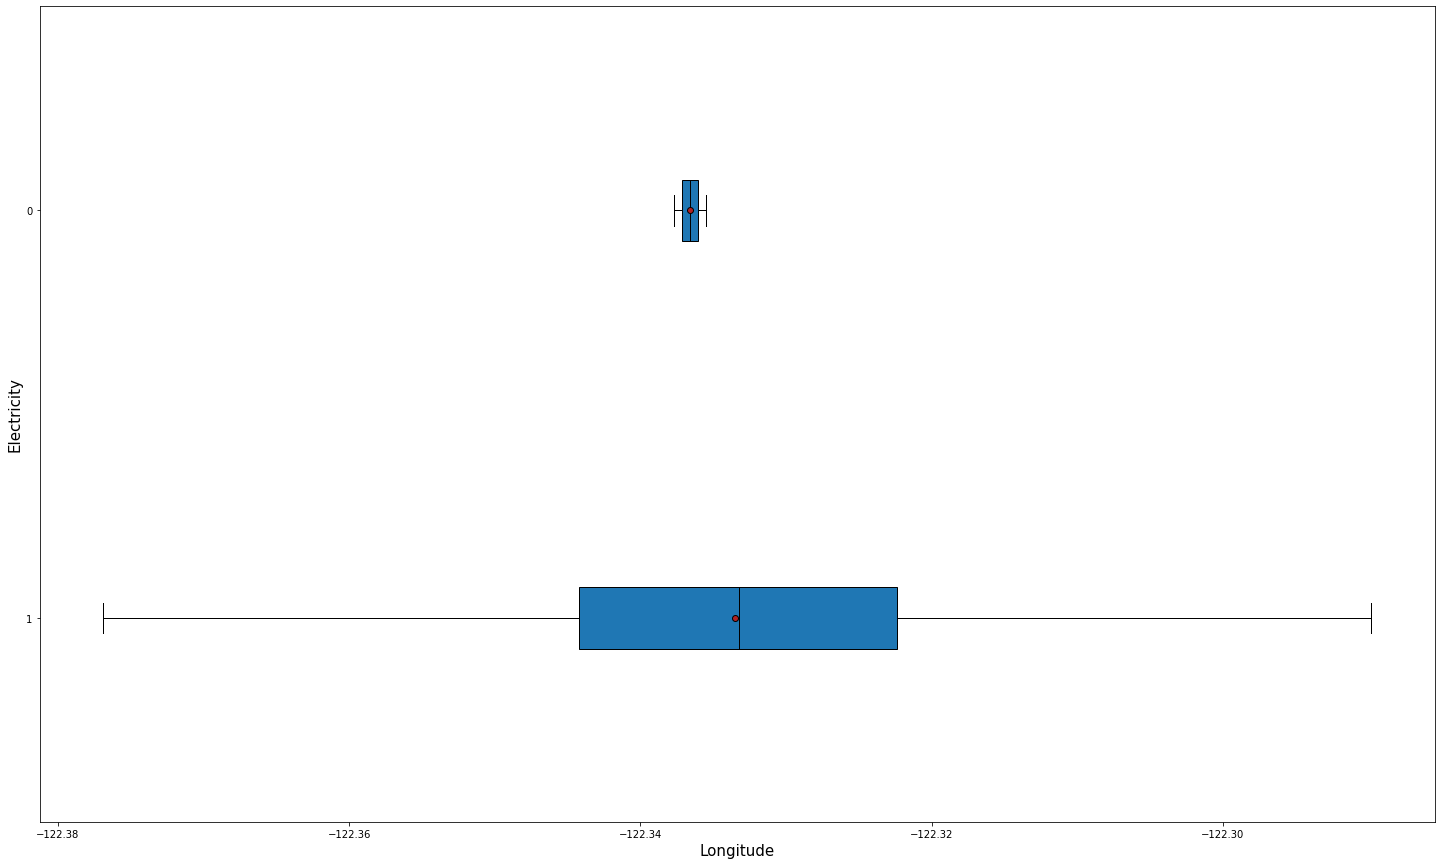

stat=0.032, p=0.859
Les variables sont indépendantes (H0 n'est pas rejetée)
        Source        SS    DF        MS         F     p-unc       np2
0  Electricity  0.000019     1  0.000019  0.031755  0.858591  0.000021
1       Within  0.915488  1543  0.000593       NaN       NaN       NaN


In [134]:
# Test d'indépendance entre 'Longitude' et 'Electricity'
anova(df_build, 'Longitude', 'Electricity') 

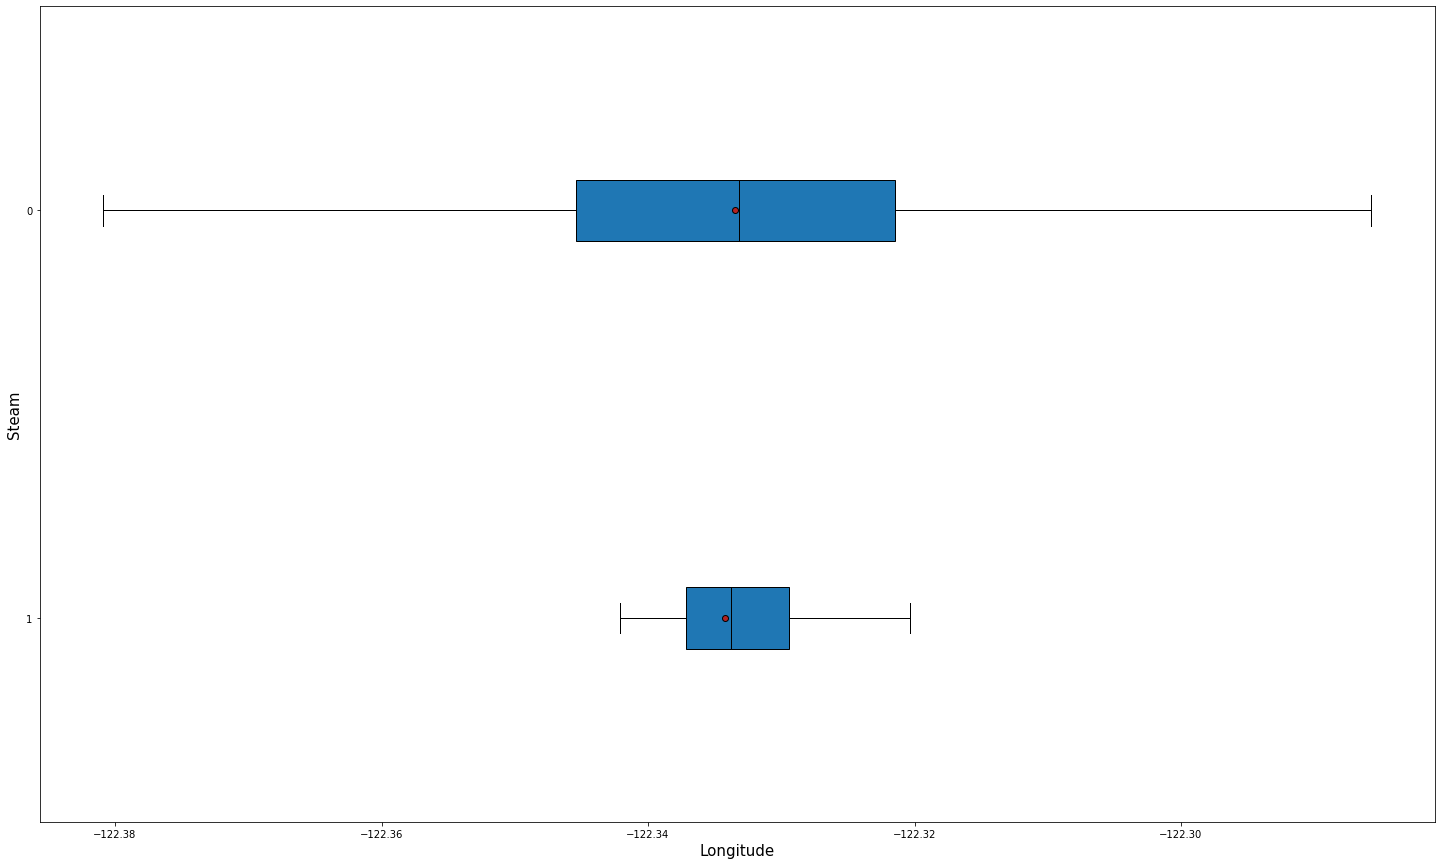

stat=0.098, p=0.754
Les variables sont indépendantes (H0 n'est pas rejetée)
   Source        SS    DF        MS         F     p-unc       np2
0   Steam  0.000058     1  0.000058  0.098286  0.753939  0.000064
1  Within  0.915449  1543  0.000593       NaN       NaN       NaN


In [135]:
# Test d'indépendance entre 'Longitude' et 'Steam'
anova(df_build, 'Longitude', 'Steam') 

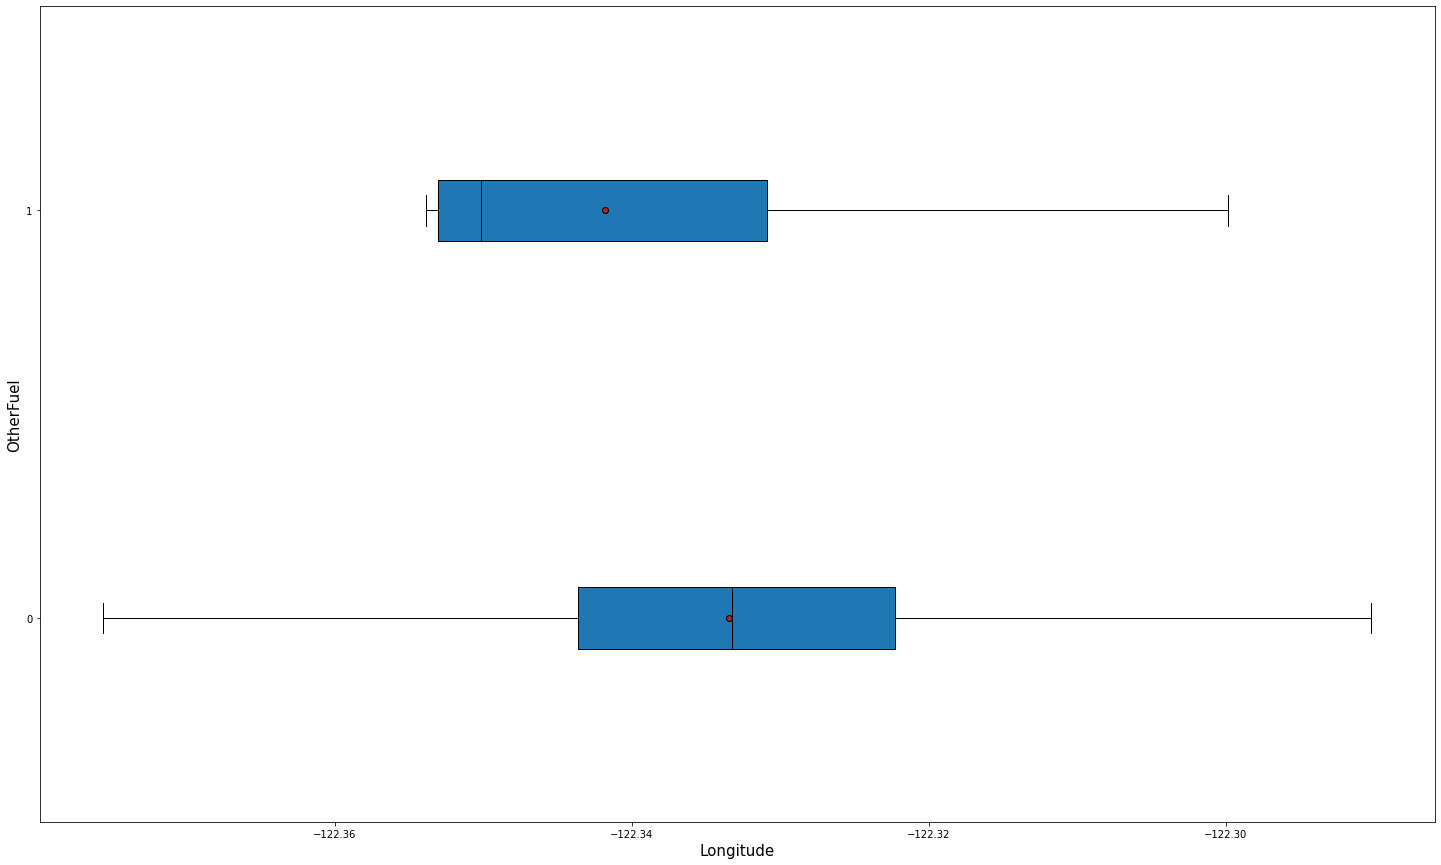

stat=1.629, p=0.202
Les variables sont indépendantes (H0 n'est pas rejetée)
      Source        SS    DF        MS         F     p-unc       np2
0  OtherFuel  0.000965     1  0.000965  1.628702  0.202075  0.001054
1     Within  0.914542  1543  0.000593       NaN       NaN       NaN


In [136]:
# Test d'indépendance entre 'Longitude' et 'OtherFuel'
anova(df_build, 'Longitude', 'OtherFuel') 

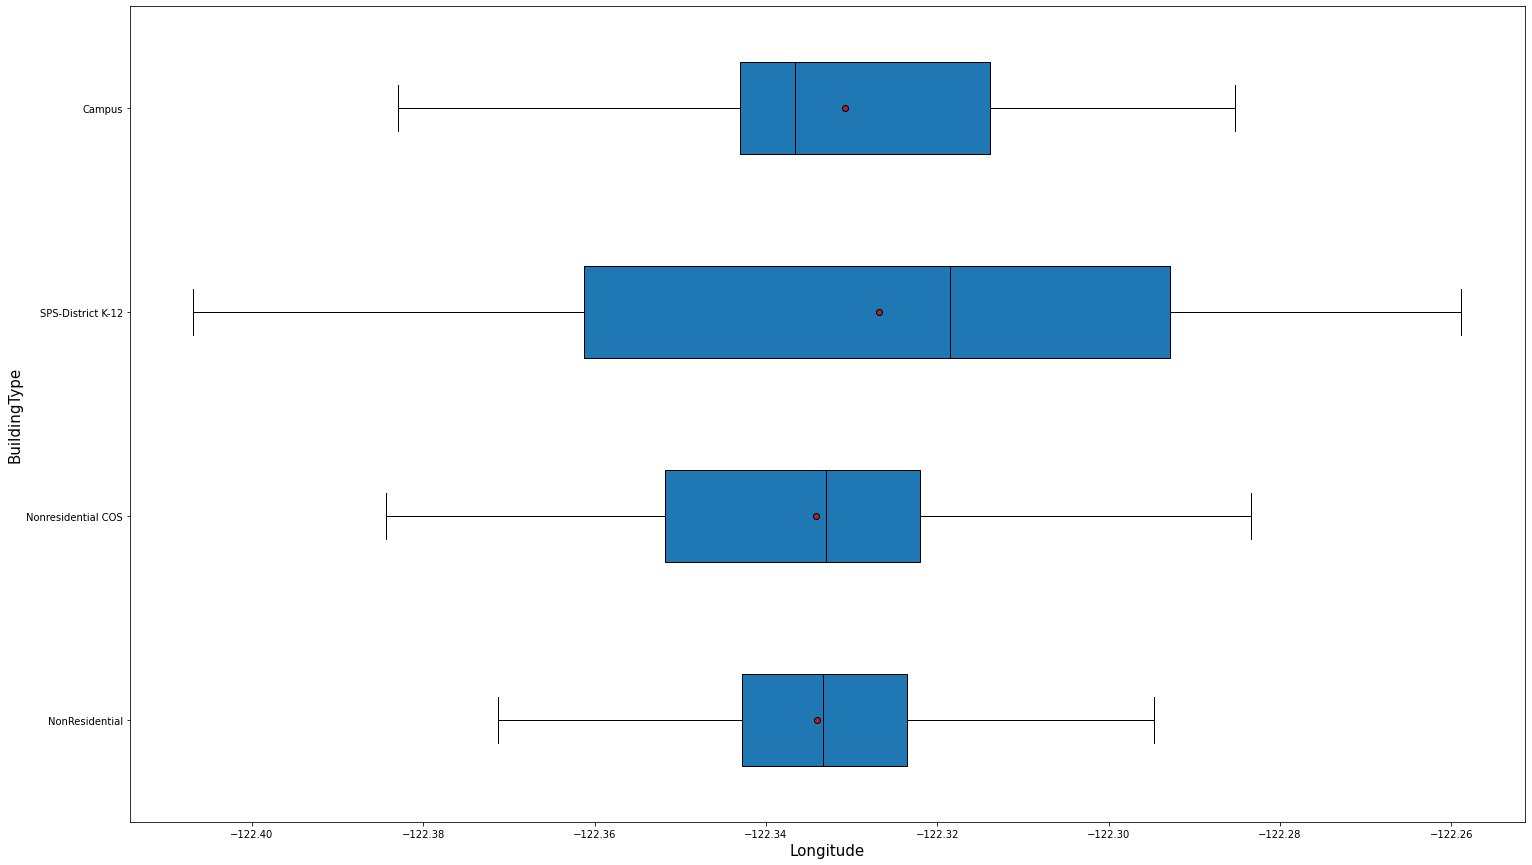

stat=2.571, p=0.053
Les variables sont indépendantes (H0 n'est pas rejetée)
         Source        SS    DF        MS         F     p-unc       np2
0  BuildingType  0.004560     3  0.001520  2.571129  0.052715  0.004981
1        Within  0.910948  1541  0.000591       NaN       NaN       NaN


In [137]:
# Test d'indépendance entre 'Longitude' et 'BuildingType'
anova(df_build, 'Longitude', 'BuildingType') 

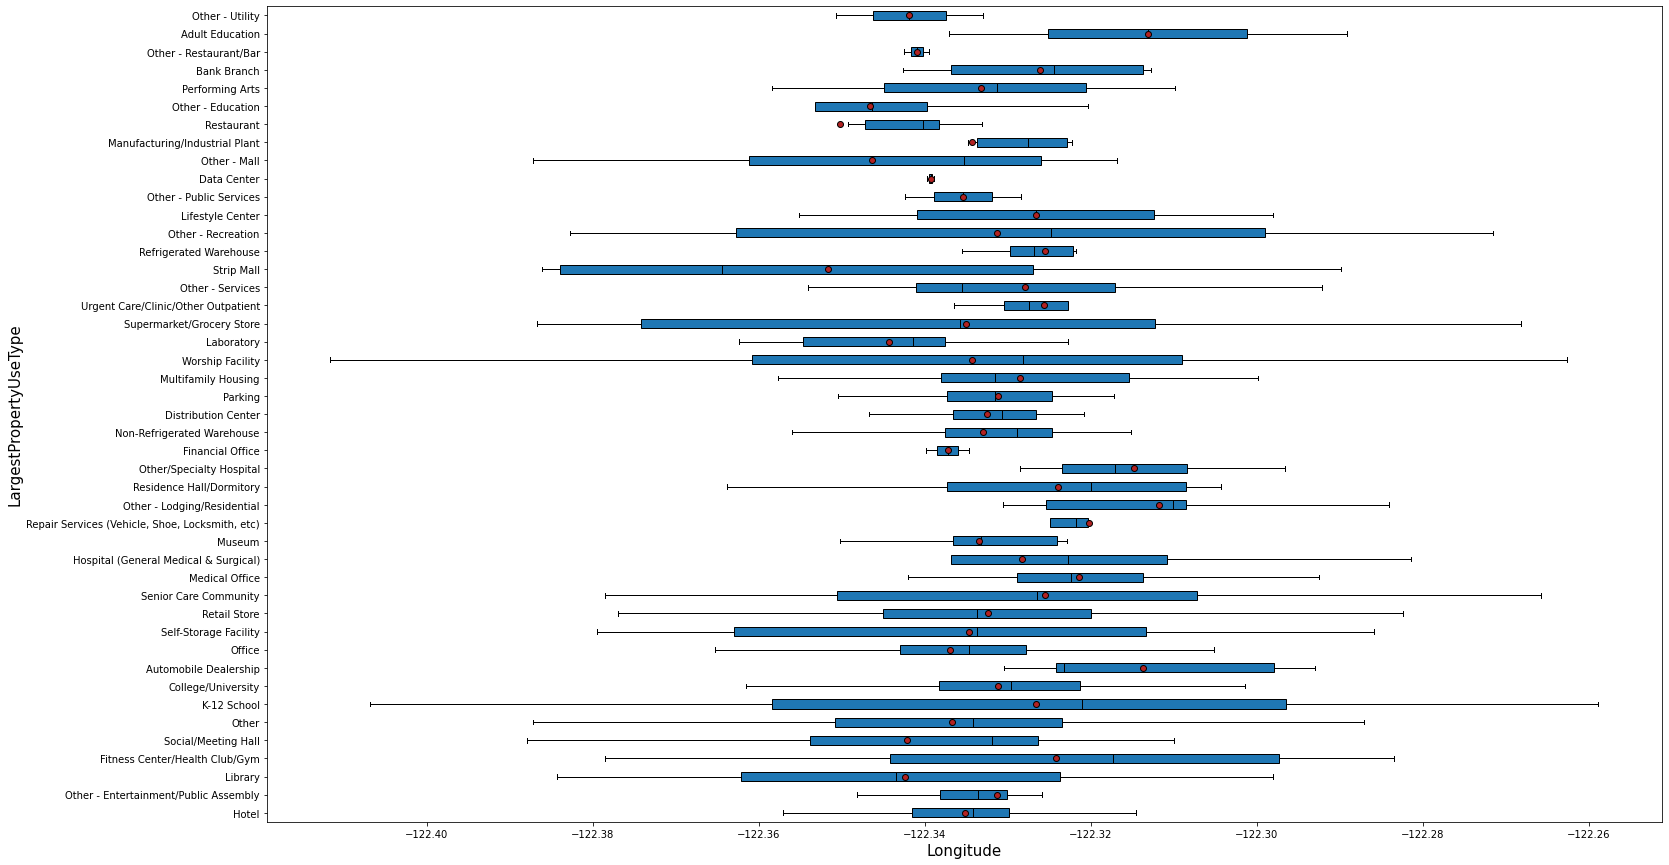

stat=1.565, p=0.011
Les variables sont corrélées (H0 est rejetée)
                   Source        SS    DF        MS         F     p-unc  \
0  LargestPropertyUseType  0.042468    54  0.000786  1.342216  0.051283   
1                  Within  0.873039  1490  0.000586       NaN       NaN   

        np2  
0  0.046388  
1       NaN  


In [138]:
# Test d'indépendance entre 'Longitude' et 'LargestPropertyUseType'
anova(df_build, 'Longitude', 'LargestPropertyUseType') 

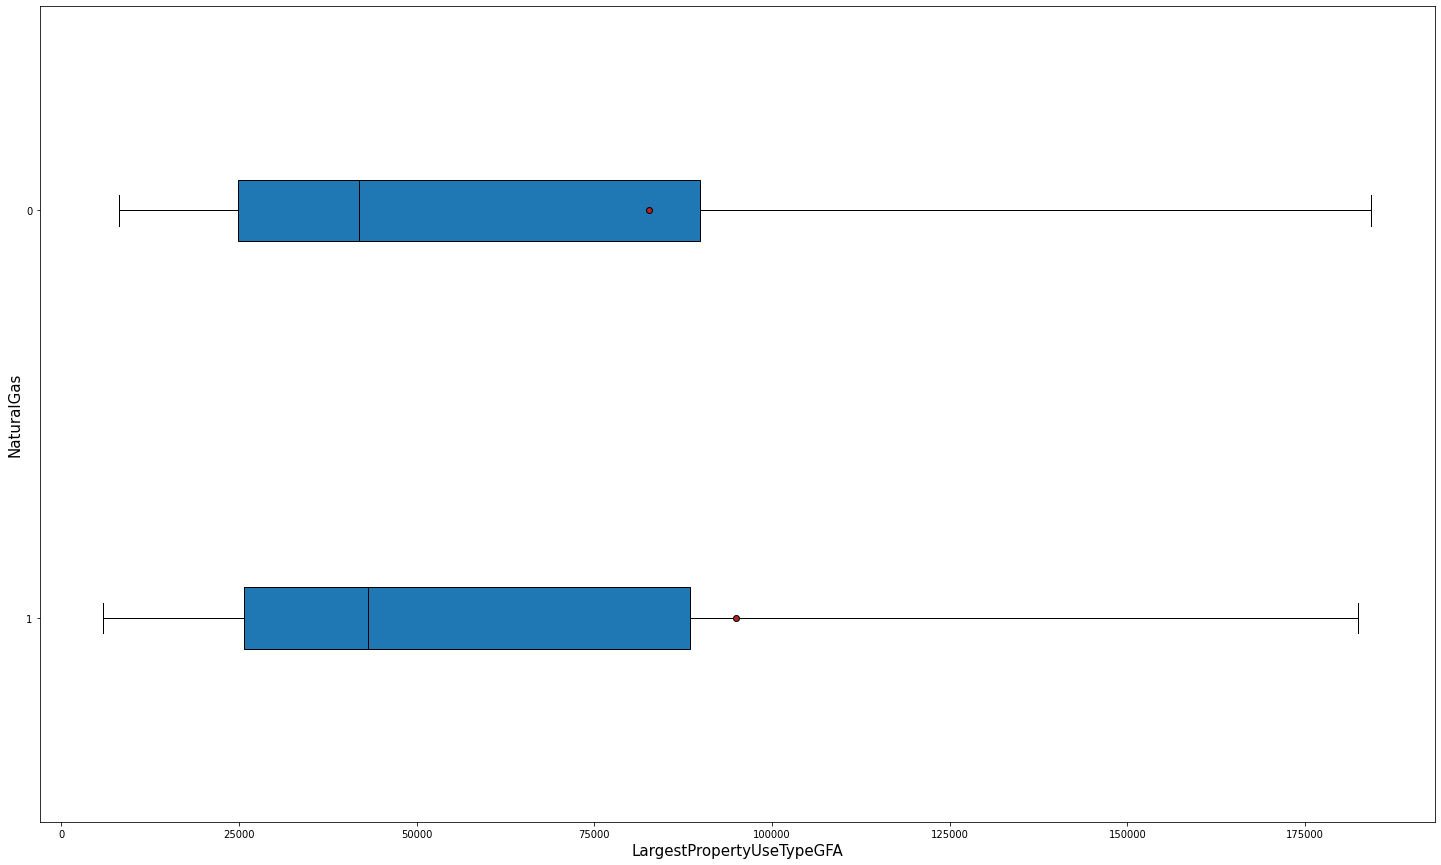

stat=1.821, p=0.177
Les variables sont indépendantes (H0 n'est pas rejetée)
       Source            SS    DF            MS         F     p-unc       np2
0  NaturalGas  4.668973e+10     1  4.668973e+10  1.820574  0.177443  0.001179
1      Within  3.957117e+13  1543  2.564560e+10       NaN       NaN       NaN


In [139]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'NaturalGas'
anova(df_build, 'LargestPropertyUseTypeGFA', 'NaturalGas') 

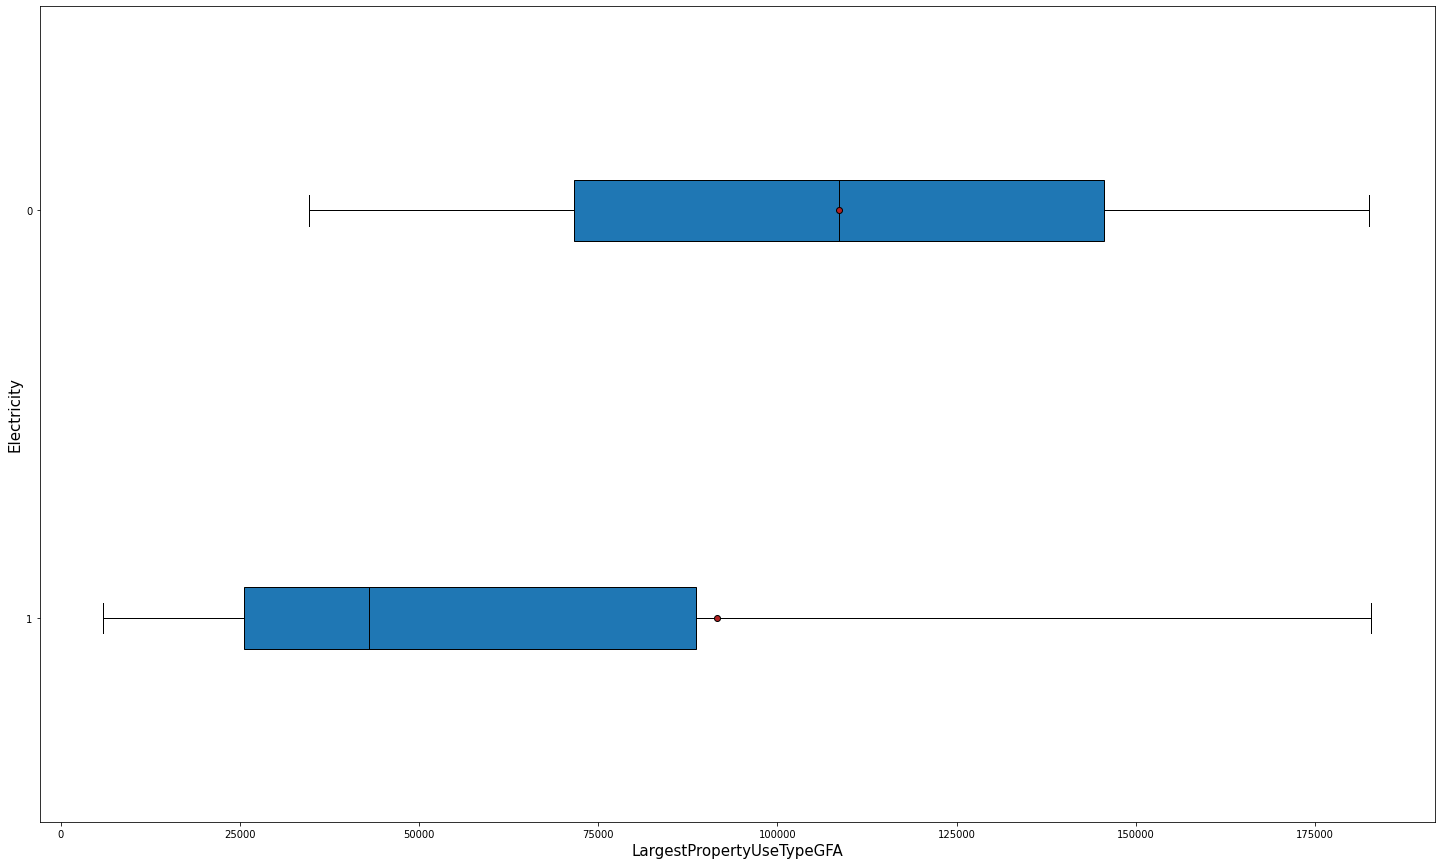

stat=0.023, p=0.880
Les variables sont indépendantes (H0 n'est pas rejetée)
        Source            SS    DF            MS         F     p-unc       np2
0  Electricity  5.824463e+08     1  5.824463e+08  0.022685  0.880299  0.000015
1       Within  3.961727e+13  1543  2.567549e+10       NaN       NaN       NaN


In [140]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'Electricity'
anova(df_build, 'LargestPropertyUseTypeGFA', 'Electricity') 

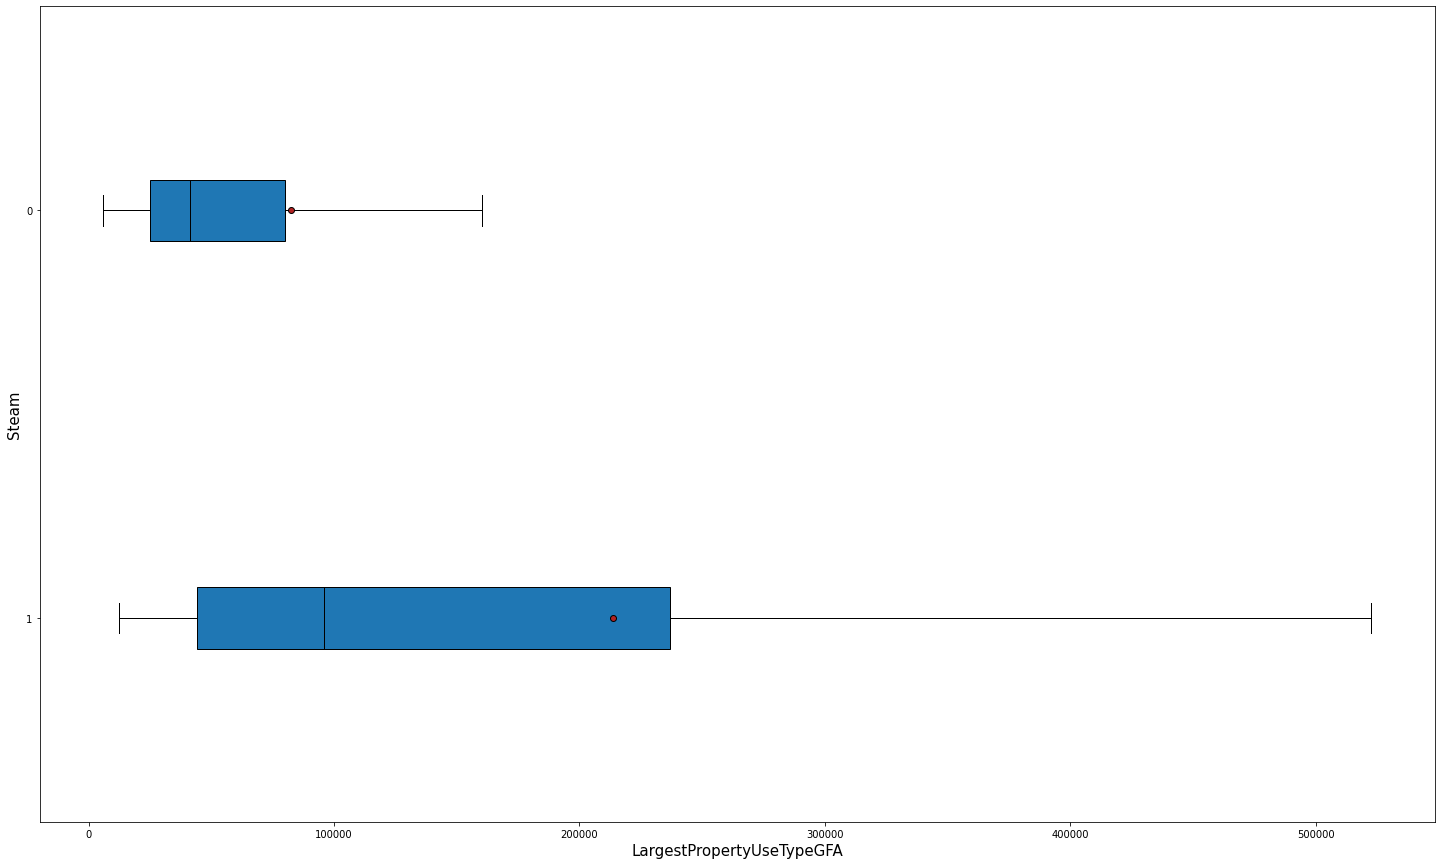

stat=68.383, p=0.000
Les variables sont corrélées (H0 est rejetée)
   Source            SS    DF            MS          F         p-unc       np2
0   Steam  1.681291e+12     1  1.681291e+12  68.383411  2.871137e-16  0.042438
1  Within  3.793657e+13  1543  2.458624e+10        NaN           NaN       NaN


In [141]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'Steam'
anova(df_build, 'LargestPropertyUseTypeGFA', 'Steam') 

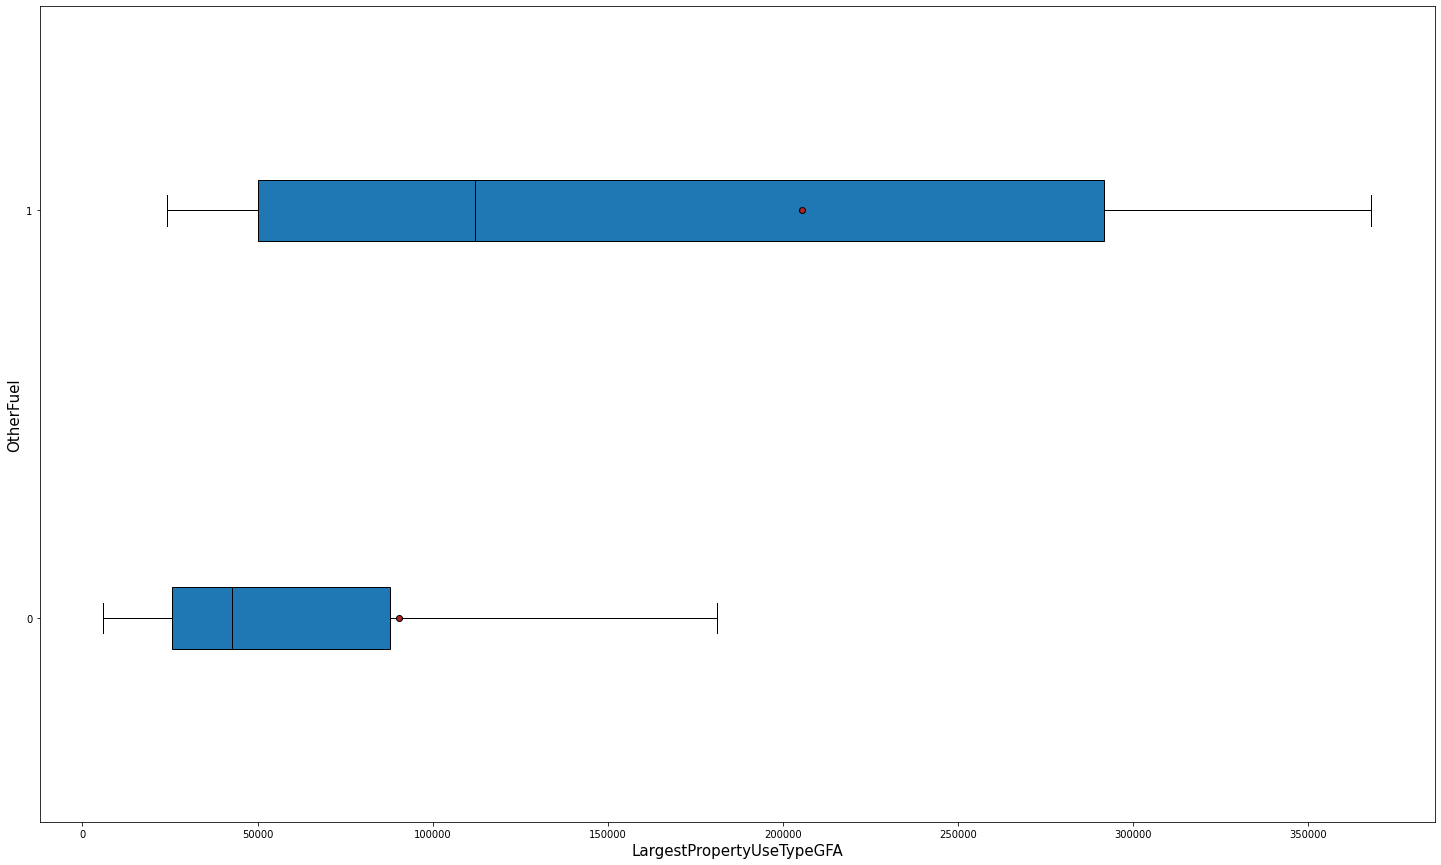

stat=7.172, p=0.007
Les variables sont corrélées (H0 est rejetée)
      Source            SS    DF            MS         F     p-unc       np2
0  OtherFuel  1.832876e+11     1  1.832876e+11  7.171697  0.007485  0.004626
1     Within  3.943457e+13  1543  2.555708e+10       NaN       NaN       NaN


In [142]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'OtherFuel'
anova(df_build, 'LargestPropertyUseTypeGFA', 'OtherFuel') 

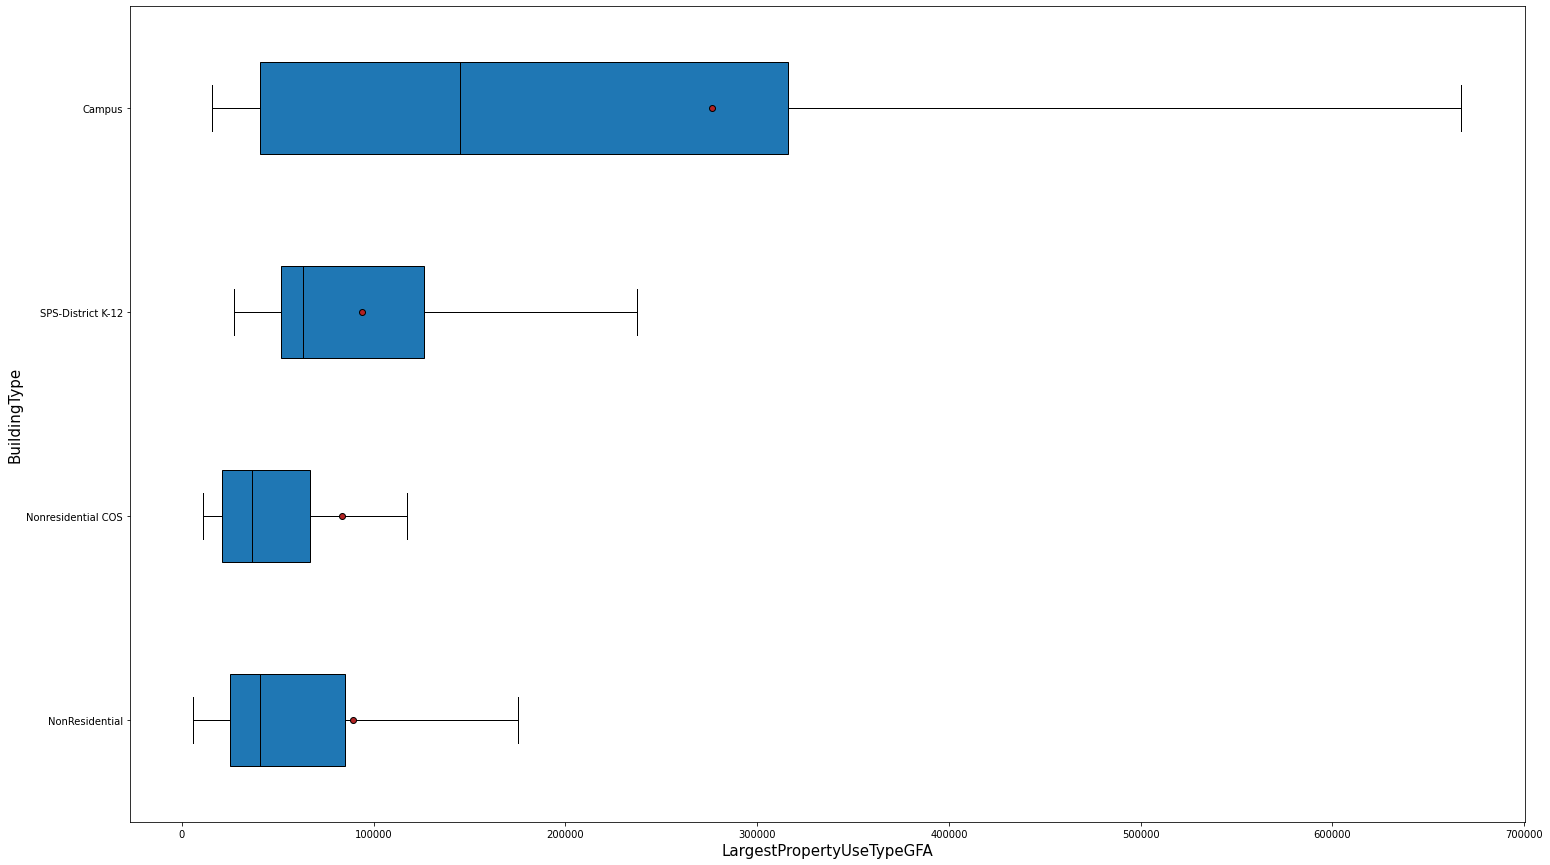

stat=9.180, p=0.000
Les variables sont corrélées (H0 est rejetée)
         Source            SS    DF            MS         F     p-unc  \
0  BuildingType  6.956258e+11     3  2.318753e+11  9.180352  0.000005   
1        Within  3.892223e+13  1541  2.525777e+10       NaN       NaN   

        np2  
0  0.017558  
1       NaN  


In [143]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'BuildingType'
anova(df_build, 'LargestPropertyUseTypeGFA', 'BuildingType') 

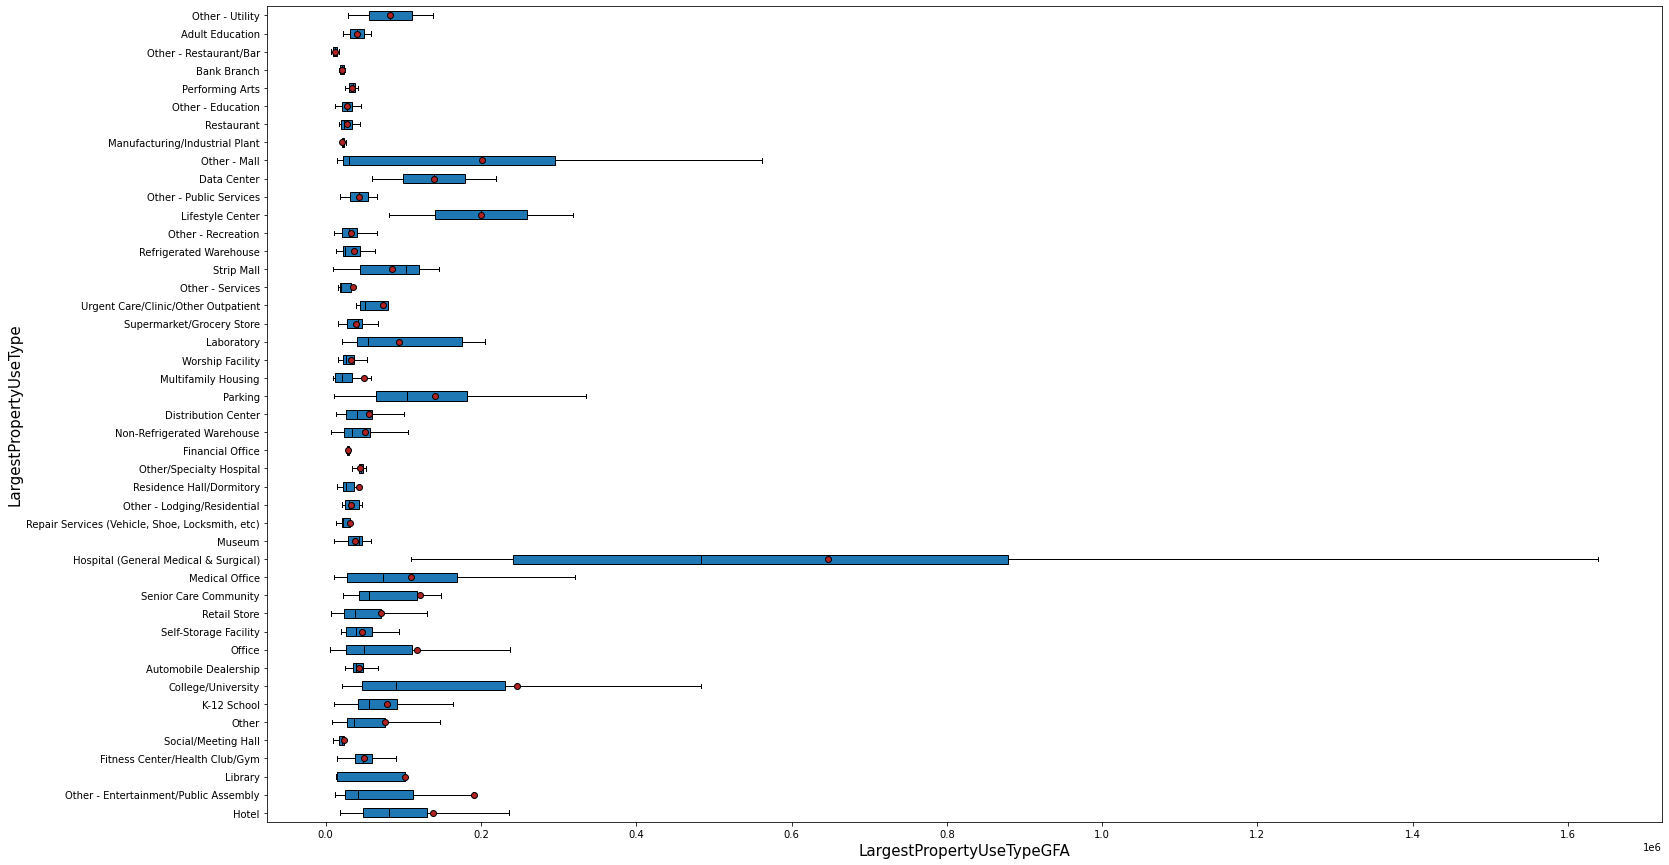

stat=5.542, p=0.000
Les variables sont corrélées (H0 est rejetée)
                   Source            SS    DF            MS         F  \
0  LargestPropertyUseType  6.590109e+12    54  1.220391e+11  5.505619   
1                  Within  3.302775e+13  1490  2.216627e+10       NaN   

          p-unc       np2  
0  1.727345e-31  0.166342  
1           NaN       NaN  


In [144]:
# Test d'indépendance entre 'LargestPropertyUseTypeGFA' et 'LargestPropertyUseType'
anova(df_build, 'LargestPropertyUseTypeGFA', 'LargestPropertyUseType') 

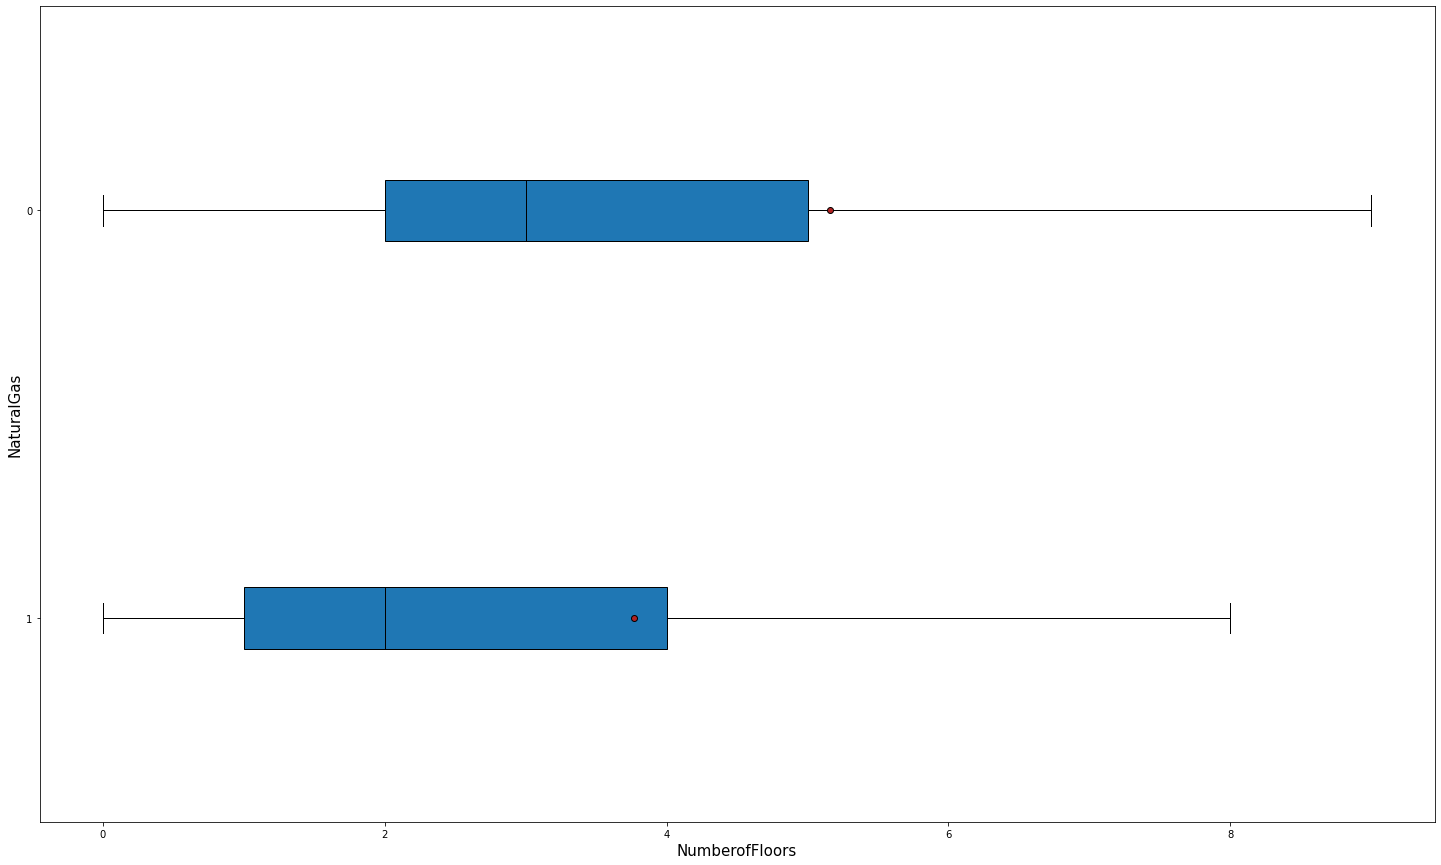

stat=13.719, p=0.000
Les variables sont corrélées (H0 est rejetée)
       Source            SS    DF          MS          F    p-unc       np2
0  NaturalGas    604.814356     1  604.814356  13.718573  0.00022  0.008812
1      Within  68026.651016  1543   44.087266        NaN      NaN       NaN


In [145]:
# Test d'indépendance entre 'NumberofFloors' et 'NaturalGas'
anova(df_build, 'NumberofFloors', 'NaturalGas') 

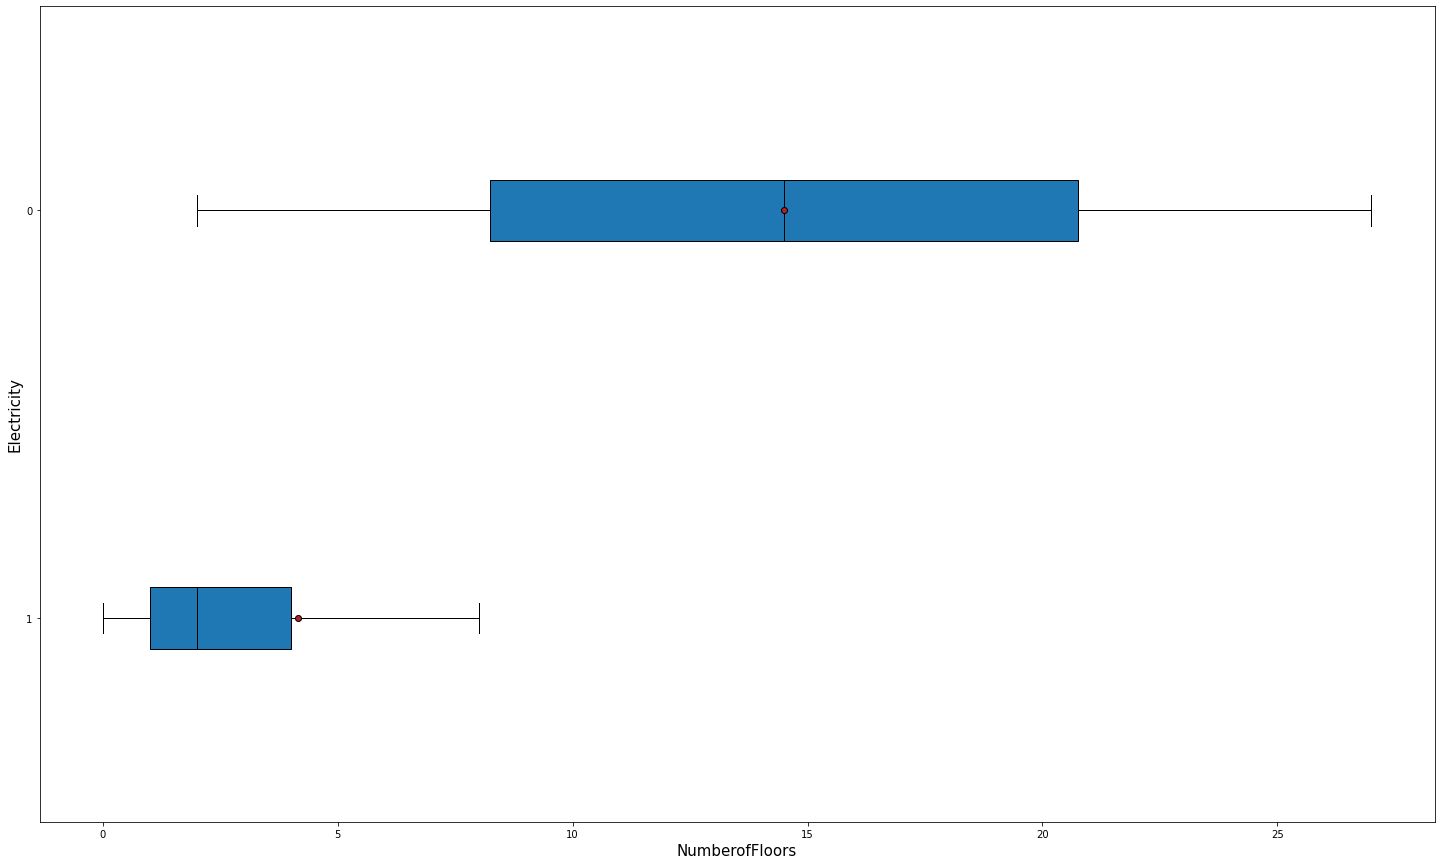

stat=4.831, p=0.028
Les variables sont corrélées (H0 est rejetée)
        Source            SS    DF          MS         F     p-unc       np2
0  Electricity    214.194147     1  214.194147  4.830675  0.028106  0.003121
1       Within  68417.271225  1543   44.340422       NaN       NaN       NaN


In [146]:
# Test d'indépendance entre 'NumberofFloors' et 'Electricity'
anova(df_build, 'NumberofFloors', 'Electricity') 

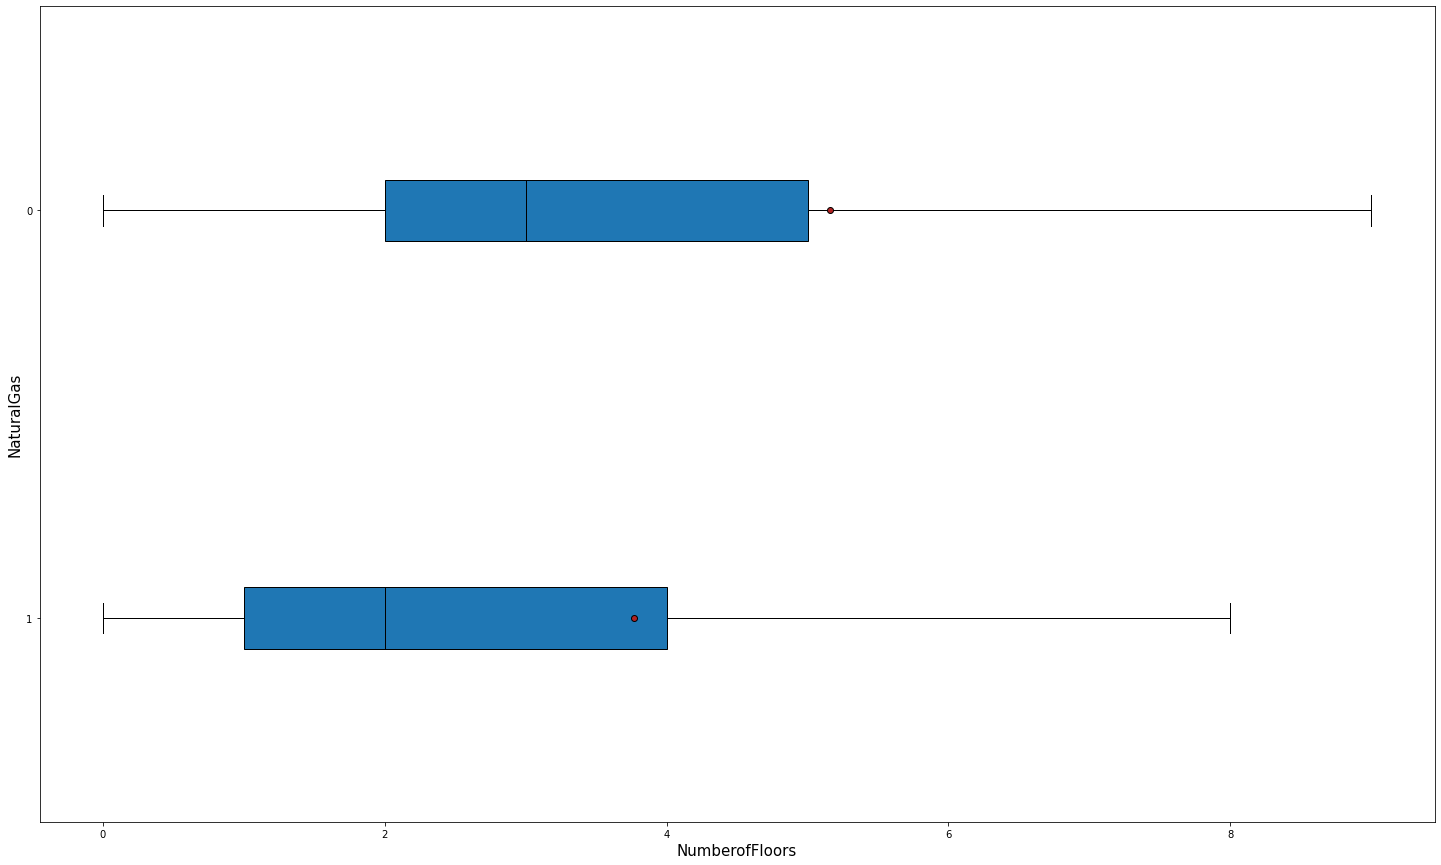

stat=13.719, p=0.000
Les variables sont corrélées (H0 est rejetée)
       Source            SS    DF          MS          F    p-unc       np2
0  NaturalGas    604.814356     1  604.814356  13.718573  0.00022  0.008812
1      Within  68026.651016  1543   44.087266        NaN      NaN       NaN


In [147]:
# Test d'indépendance entre 'NumberofFloors' et 'NaturalGas'
anova(df_build, 'NumberofFloors', 'NaturalGas') 

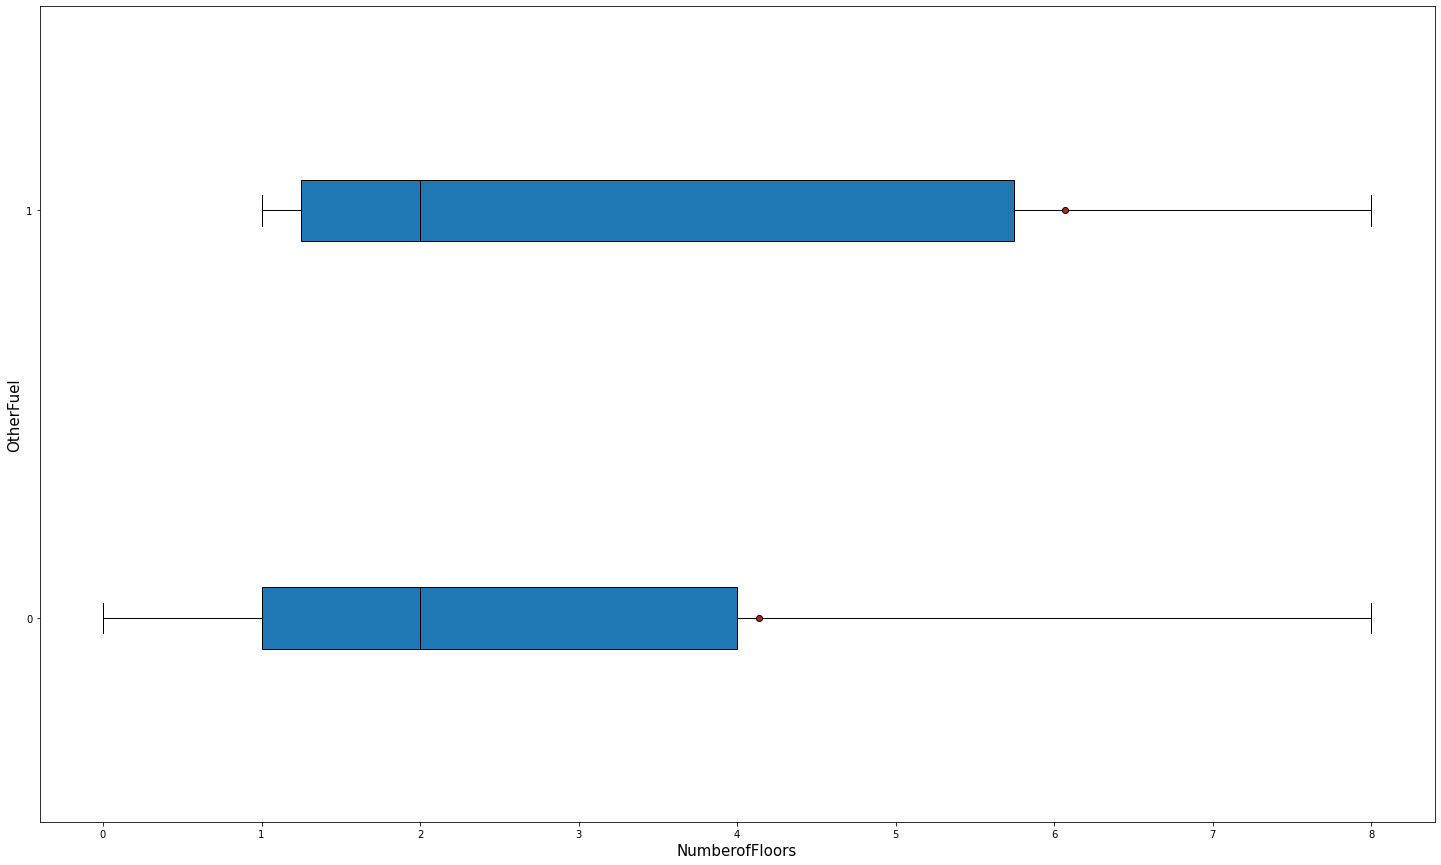

stat=1.164, p=0.281
Les variables sont indépendantes (H0 n'est pas rejetée)
      Source            SS    DF         MS        F     p-unc       np2
0  OtherFuel     51.729485     1  51.729485  1.16388  0.280831  0.000754
1     Within  68579.735887  1543  44.445713      NaN       NaN       NaN


In [148]:
# Test d'indépendance entre 'NumberofFloors' et 'OtherFuel'
anova(df_build, 'NumberofFloors', 'OtherFuel') 

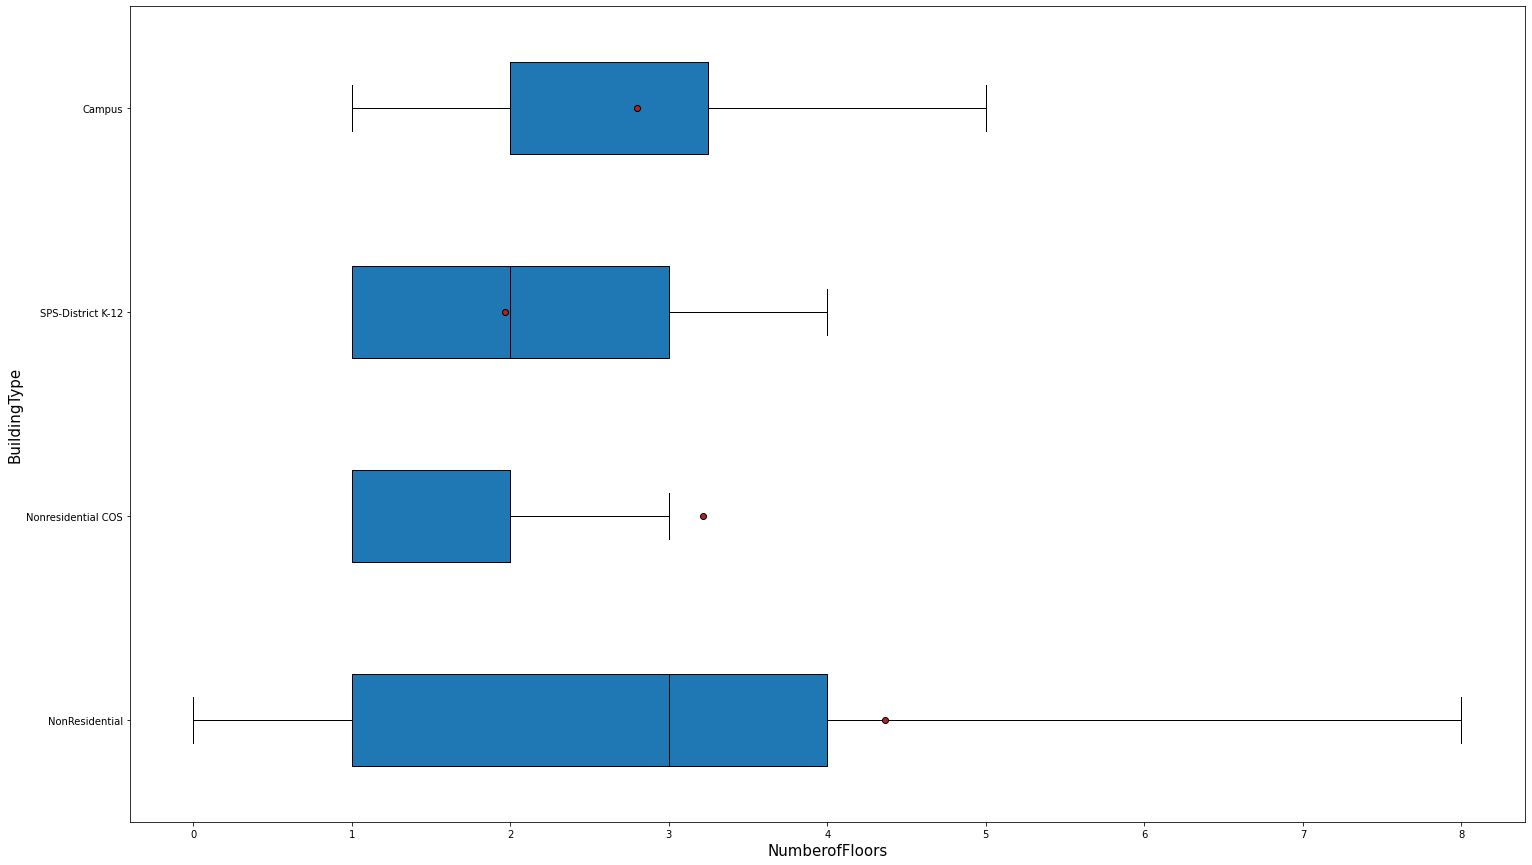

stat=4.384, p=0.004
Les variables sont corrélées (H0 est rejetée)
         Source            SS    DF          MS         F     p-unc       np2
0  BuildingType    580.730531     3  193.576844  4.383522  0.004427  0.008462
1        Within  68050.734841  1541   44.160113       NaN       NaN       NaN


In [149]:
# Test d'indépendance entre 'NumberofFloors' et 'BuildingType'
anova(df_build, 'NumberofFloors', 'BuildingType') 

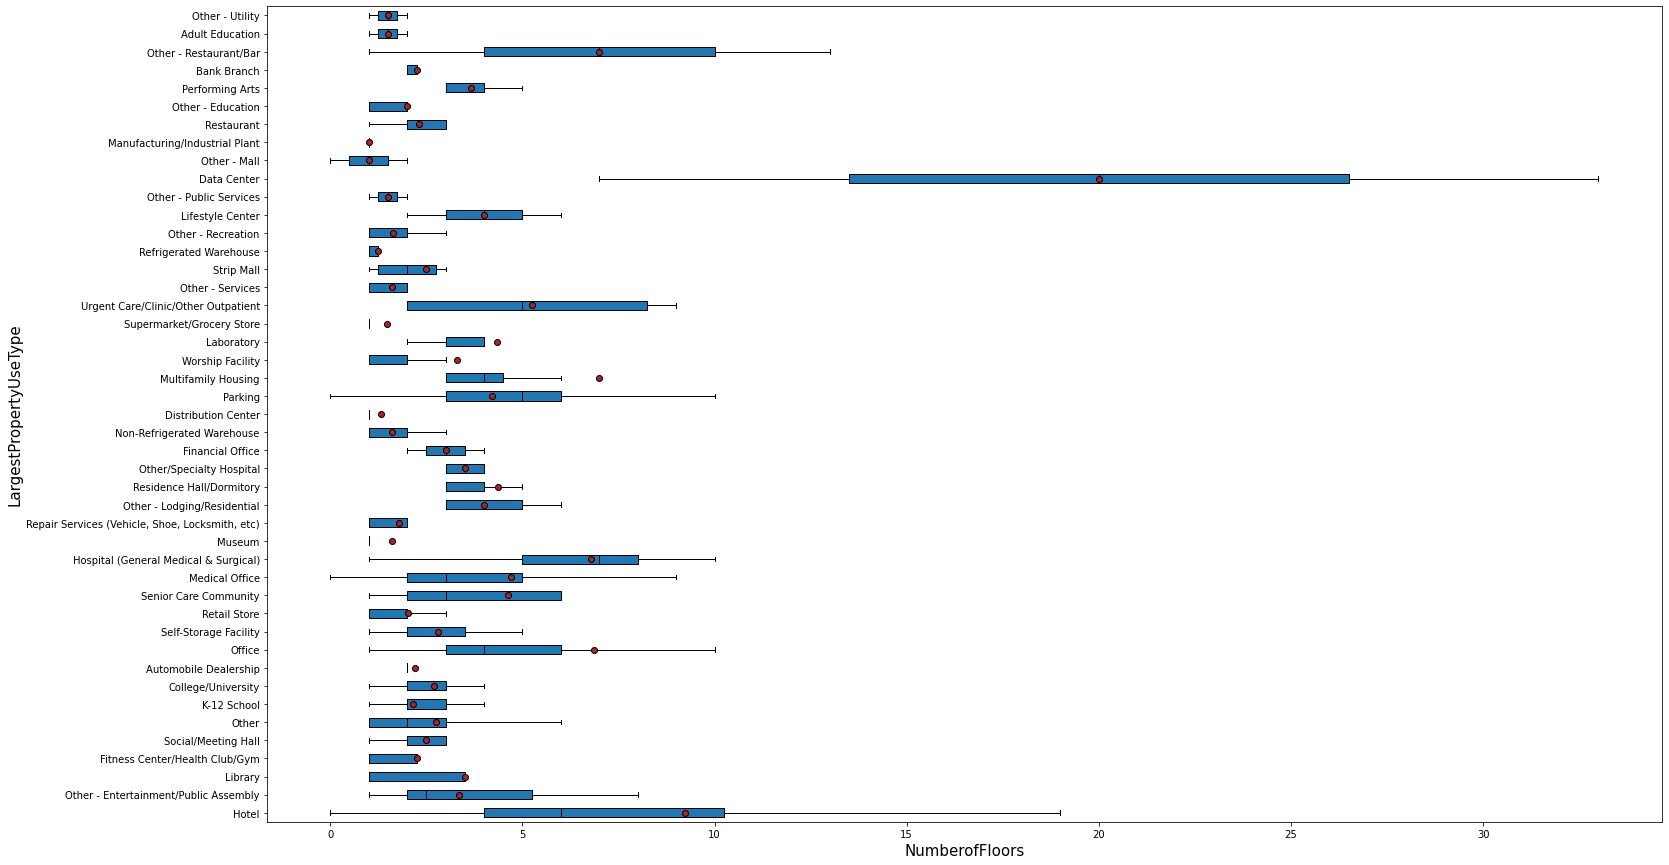

stat=5.592, p=0.000
Les variables sont corrélées (H0 est rejetée)
                   Source            SS    DF          MS        F  \
0  LargestPropertyUseType   9800.336579    54  181.487714  4.59649   
1                  Within  58831.128793  1490   39.483979      NaN   

          p-unc       np2  
0  3.496358e-24  0.142797  
1           NaN       NaN  


In [150]:
# Test d'indépendance entre 'NumberofFloors' et 'LargestPropertyUseType'
anova(df_build, 'NumberofFloors', 'LargestPropertyUseType') 

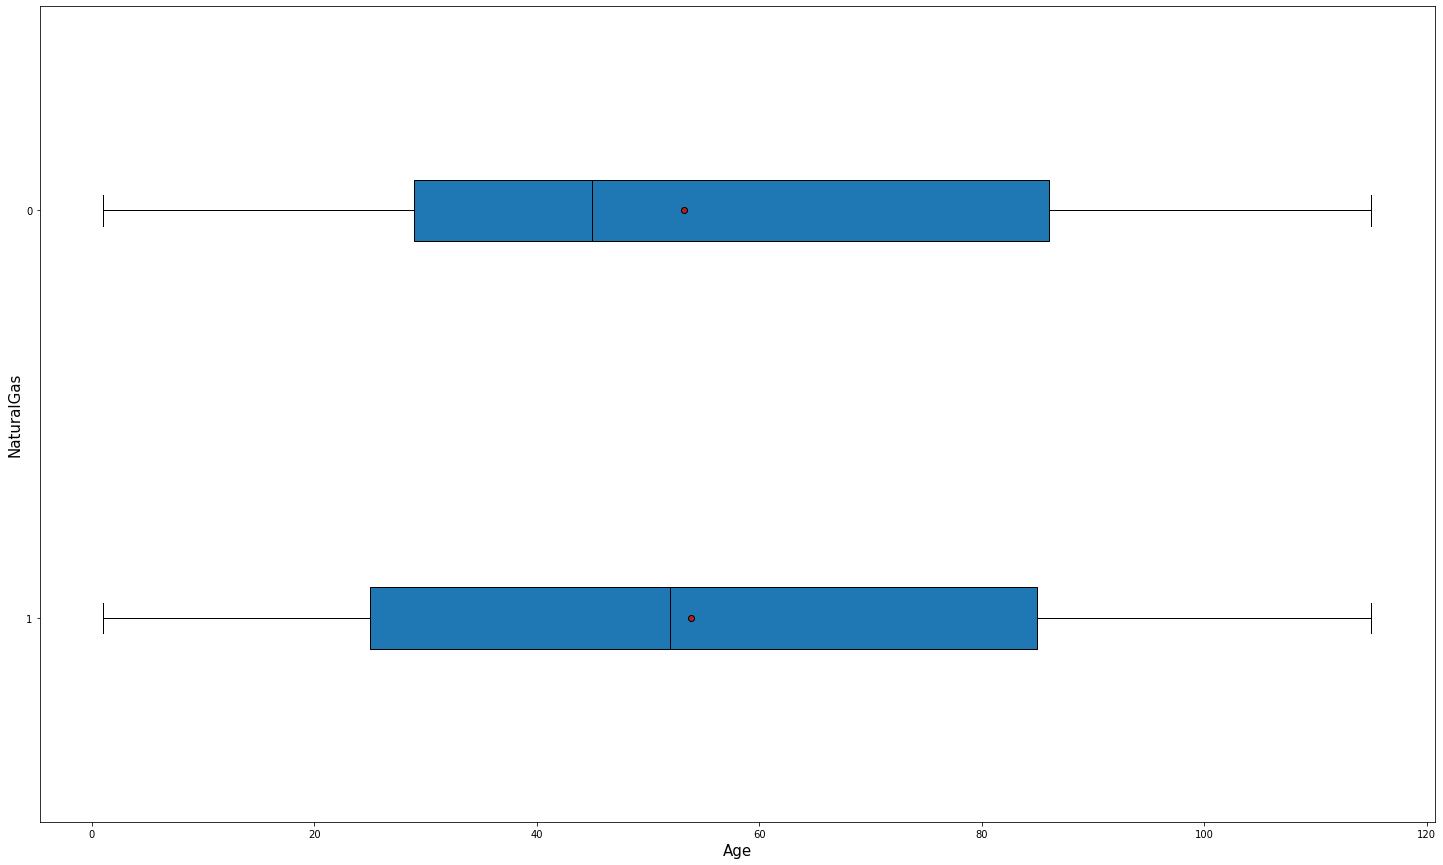

stat=0.090, p=0.764
Les variables sont indépendantes (H0 n'est pas rejetée)
       Source            SS    DF           MS         F     p-unc       np2
0  NaturalGas  9.623215e+01     1    96.232152  0.089962  0.764266  0.000058
1      Within  1.650547e+06  1543  1069.699764       NaN       NaN       NaN


In [151]:
# Test d'indépendance entre 'Age' et 'NaturalGas'
anova(df_build, 'Age', 'NaturalGas') 

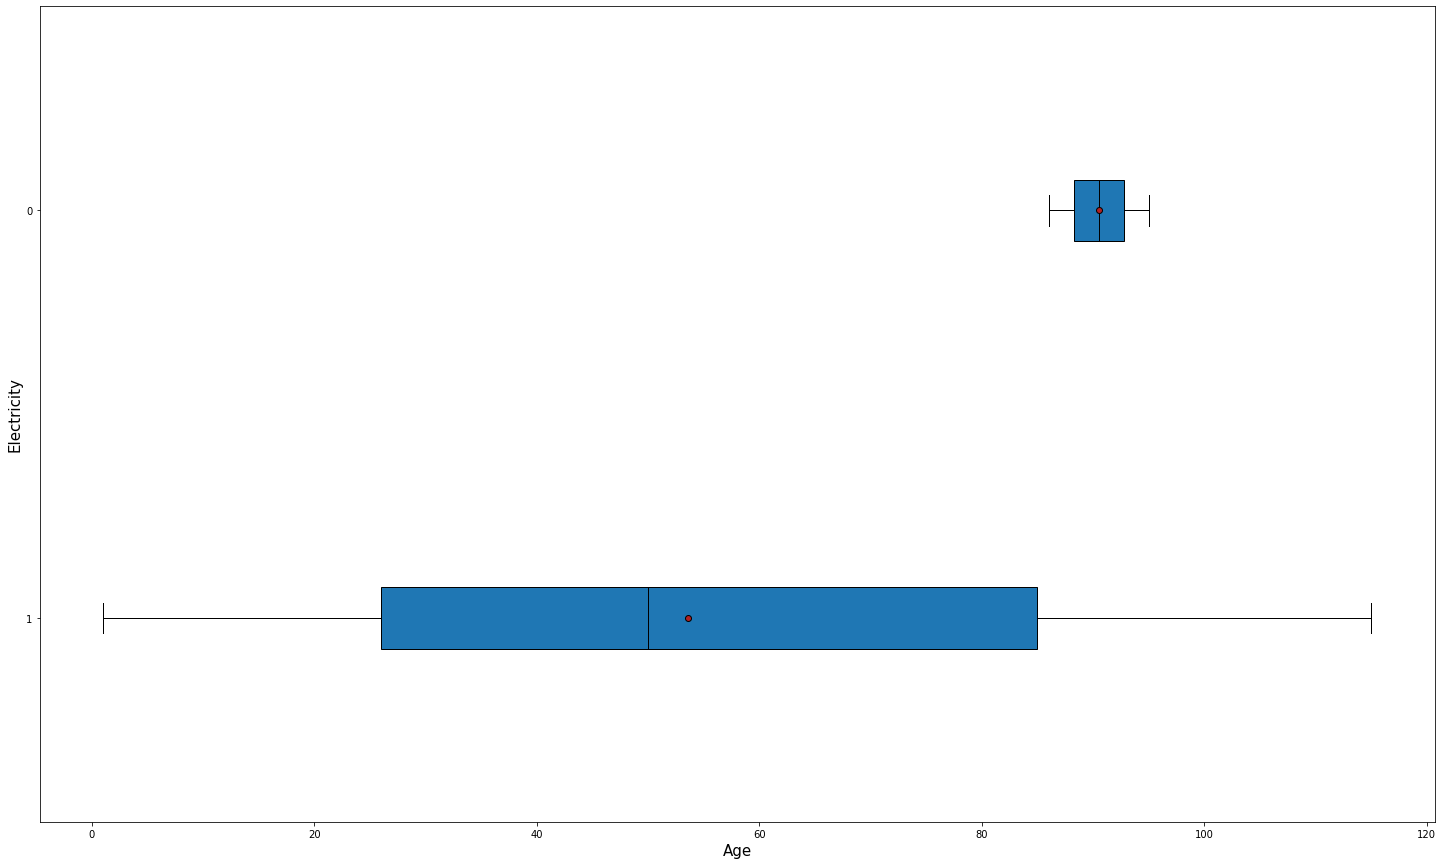

stat=2.543, p=0.111
Les variables sont indépendantes (H0 n'est pas rejetée)
        Source            SS    DF           MS         F     p-unc       np2
0  Electricity  2.716238e+03     1  2716.237565  2.543289  0.110969  0.001646
1       Within  1.647927e+06  1543  1068.001770       NaN       NaN       NaN


In [152]:
# Test d'indépendance entre 'Age' et 'Electricity'
anova(df_build, 'Age', 'Electricity') 

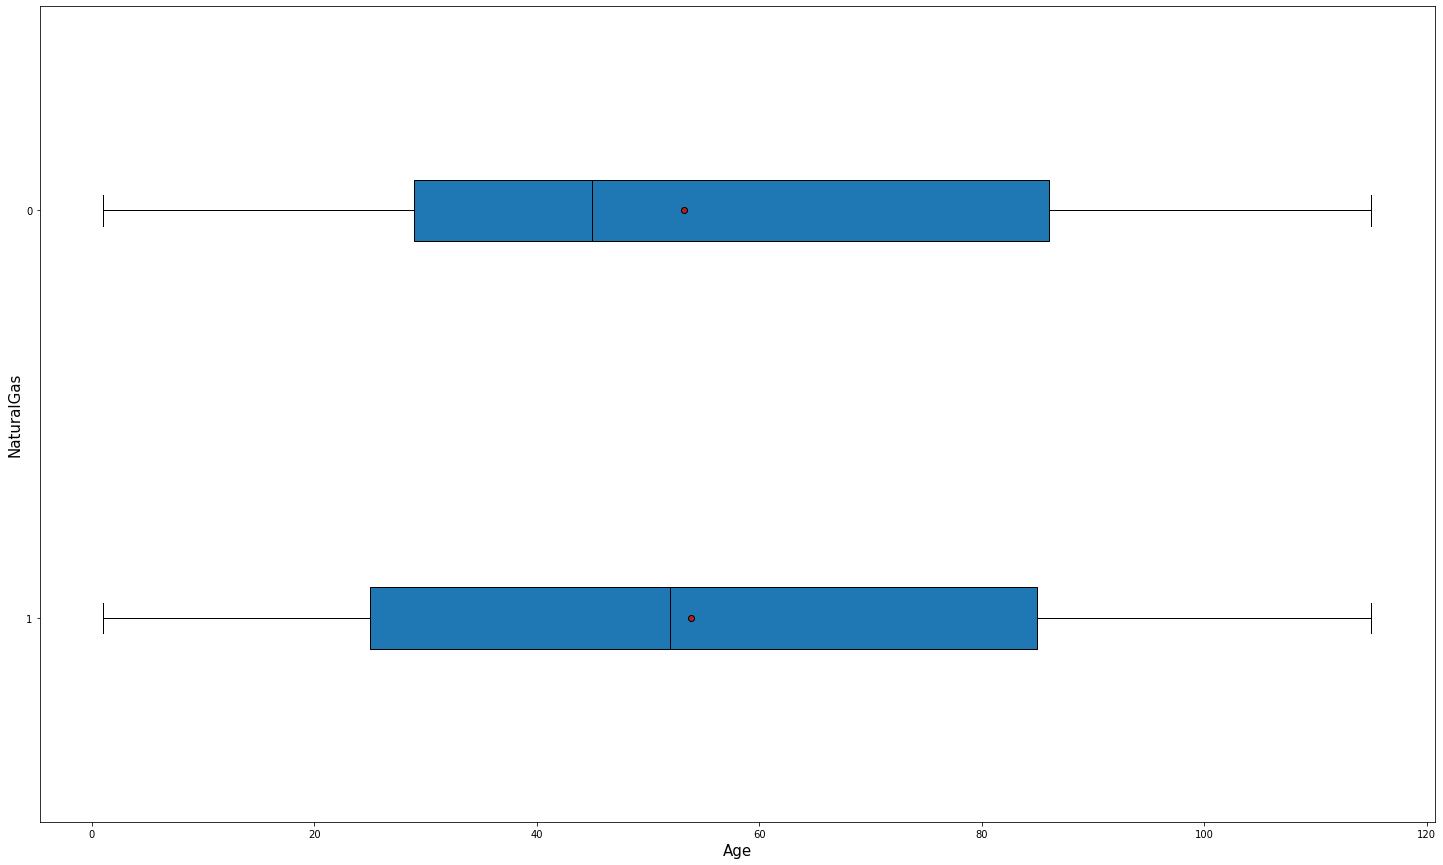

stat=0.090, p=0.764
Les variables sont indépendantes (H0 n'est pas rejetée)
       Source            SS    DF           MS         F     p-unc       np2
0  NaturalGas  9.623215e+01     1    96.232152  0.089962  0.764266  0.000058
1      Within  1.650547e+06  1543  1069.699764       NaN       NaN       NaN


In [153]:
# Test d'indépendance entre 'Age' et 'NaturalGas'
anova(df_build, 'Age', 'NaturalGas') 

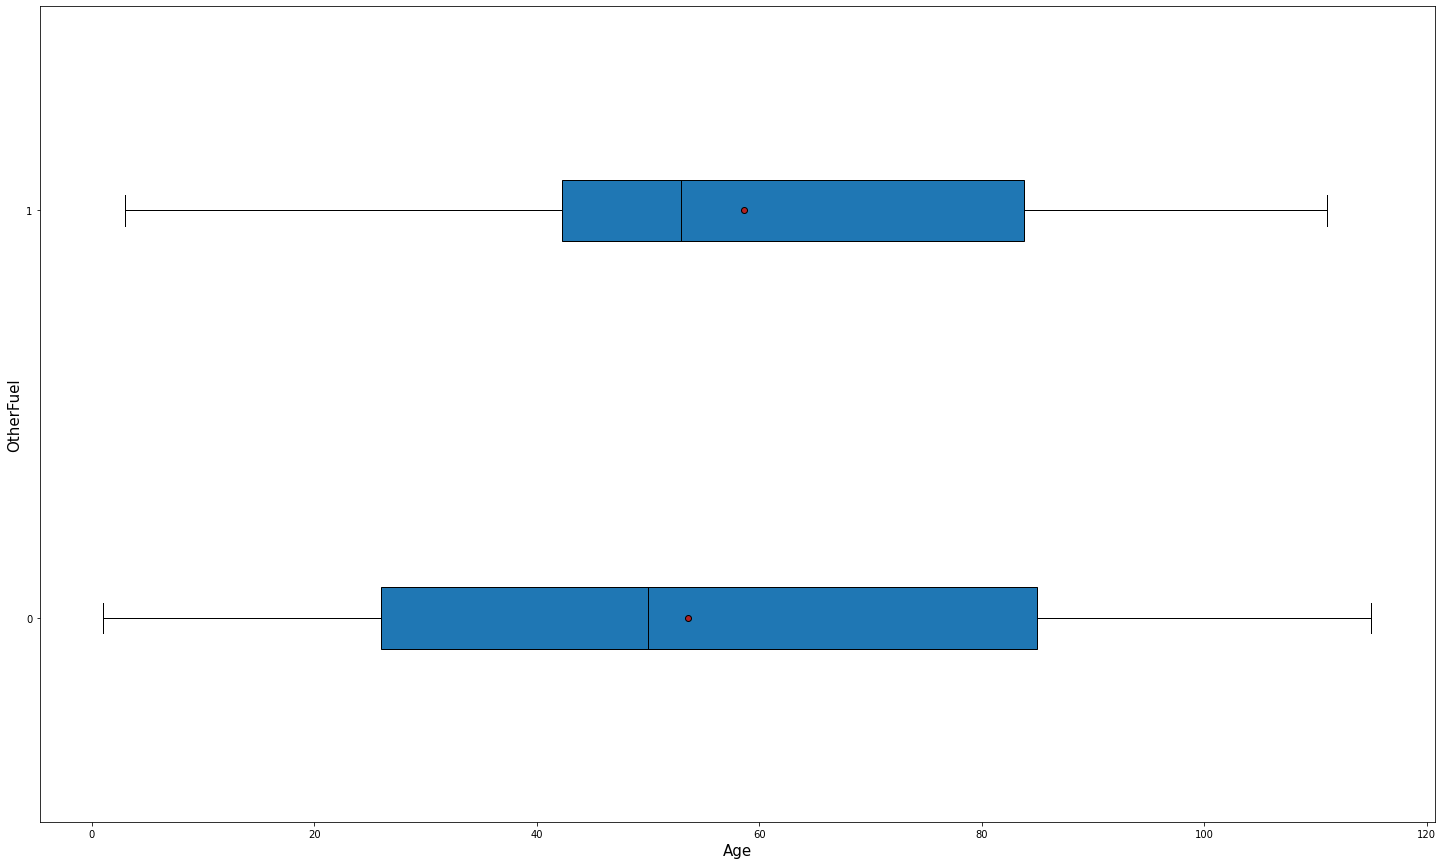

stat=0.327, p=0.568
Les variables sont indépendantes (H0 n'est pas rejetée)
      Source            SS    DF           MS         F     p-unc       np2
0  OtherFuel  3.492080e+02     1   349.207951  0.326504  0.567808  0.000212
1     Within  1.650294e+06  1543  1069.535814       NaN       NaN       NaN


In [154]:
# Test d'indépendance entre 'Age' et 'OtherFuel'
anova(df_build, 'Age', 'OtherFuel') 

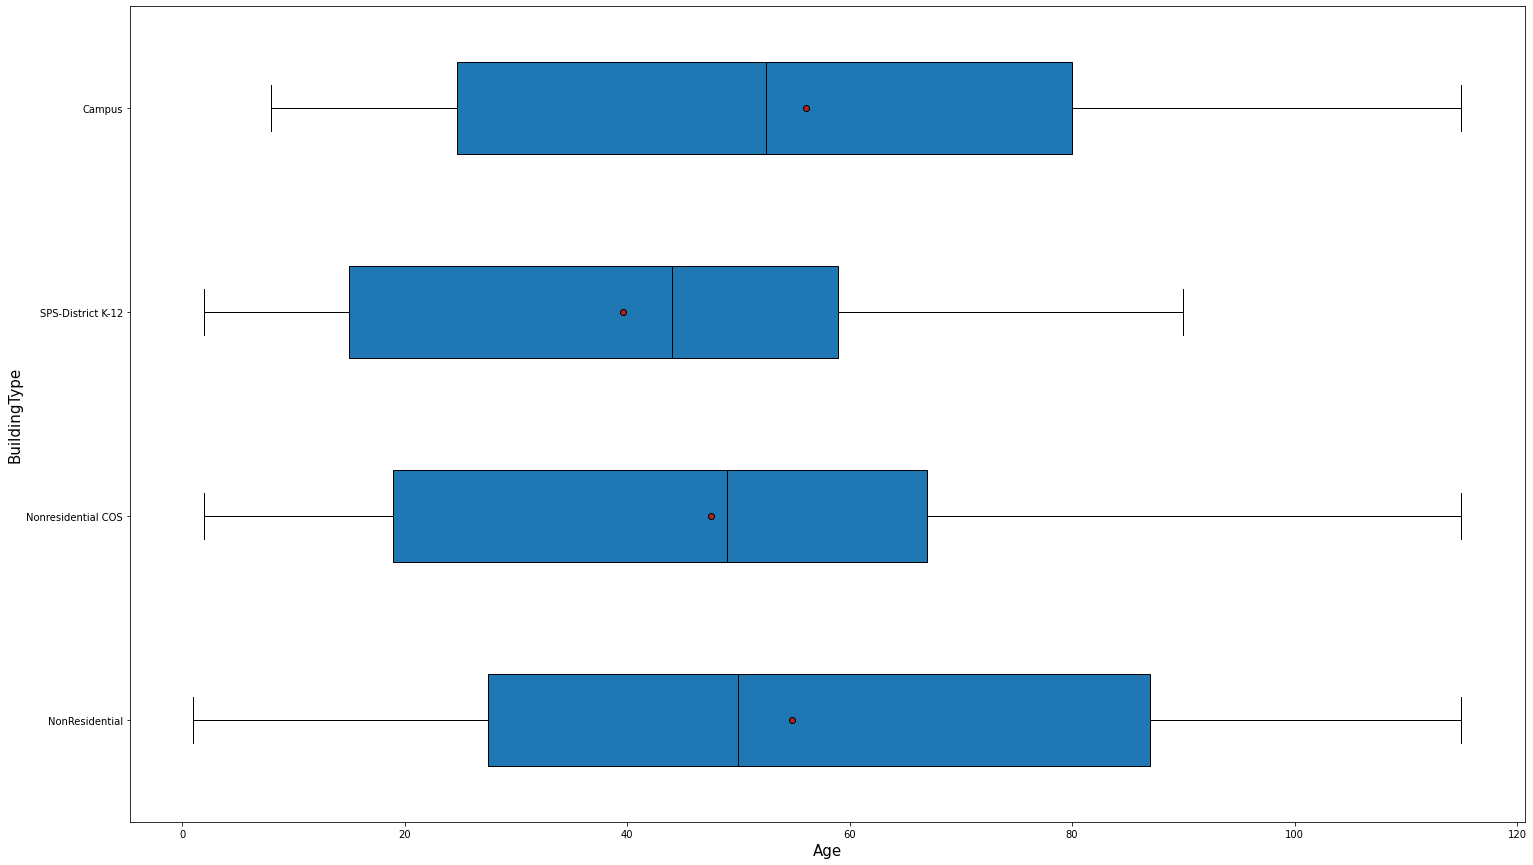

stat=6.898, p=0.000
Les variables sont corrélées (H0 est rejetée)
         Source            SS    DF           MS        F    p-unc       np2
0  BuildingType  2.187247e+04     3  7290.824555  6.89794  0.00013  0.013251
1        Within  1.628770e+06  1541  1056.956843      NaN      NaN       NaN


In [155]:
# Test d'indépendance entre 'Age' et 'BuildingType'
anova(df_build, 'Age', 'BuildingType') 

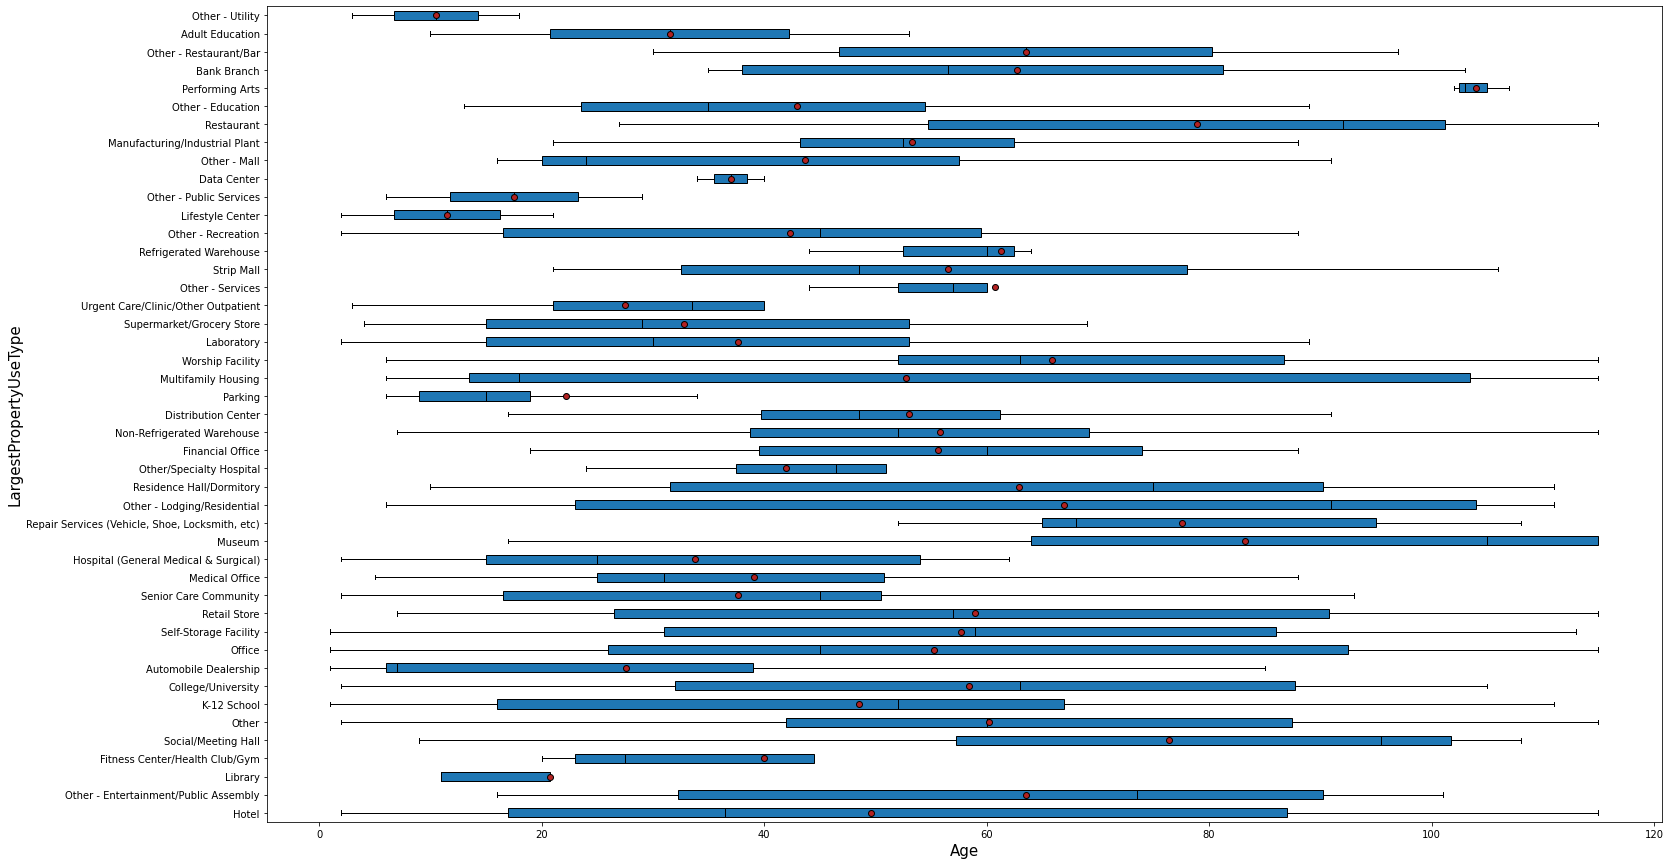

stat=3.232, p=0.000
Les variables sont corrélées (H0 est rejetée)
                   Source            SS    DF           MS         F  \
0  LargestPropertyUseType  1.532944e+05    54  2838.784405  2.824852   
1                  Within  1.497349e+06  1490  1004.931953       NaN   

          p-unc       np2  
0  1.196144e-10  0.092869  
1           NaN       NaN  


In [156]:
# Test d'indépendance entre 'Age' et 'LargestPropertyUseType'
anova(df_build, 'Age', 'LargestPropertyUseType') 

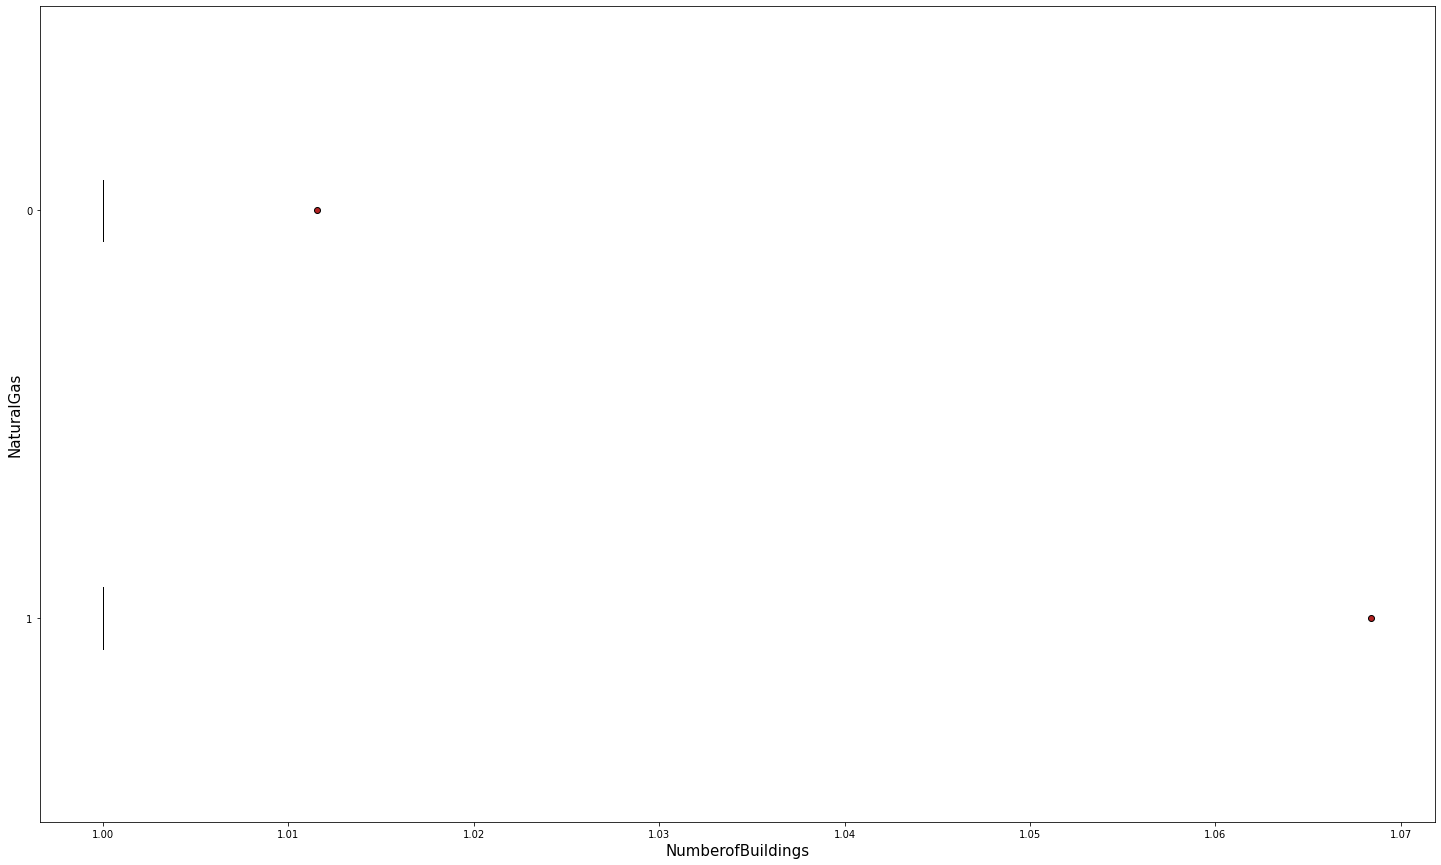

stat=0.851, p=0.356
Les variables sont indépendantes (H0 n'est pas rejetée)
       Source           SS    DF        MS         F     p-unc       np2
0  NaturalGas     1.009922     1  1.009922  0.850725  0.356492  0.000551
1      Within  1831.743476  1543  1.187131       NaN       NaN       NaN


In [157]:
# Test d'indépendance entre 'NumberofBuildings' et 'NaturalGas'
anova(df_build, 'NumberofBuildings', 'NaturalGas') 

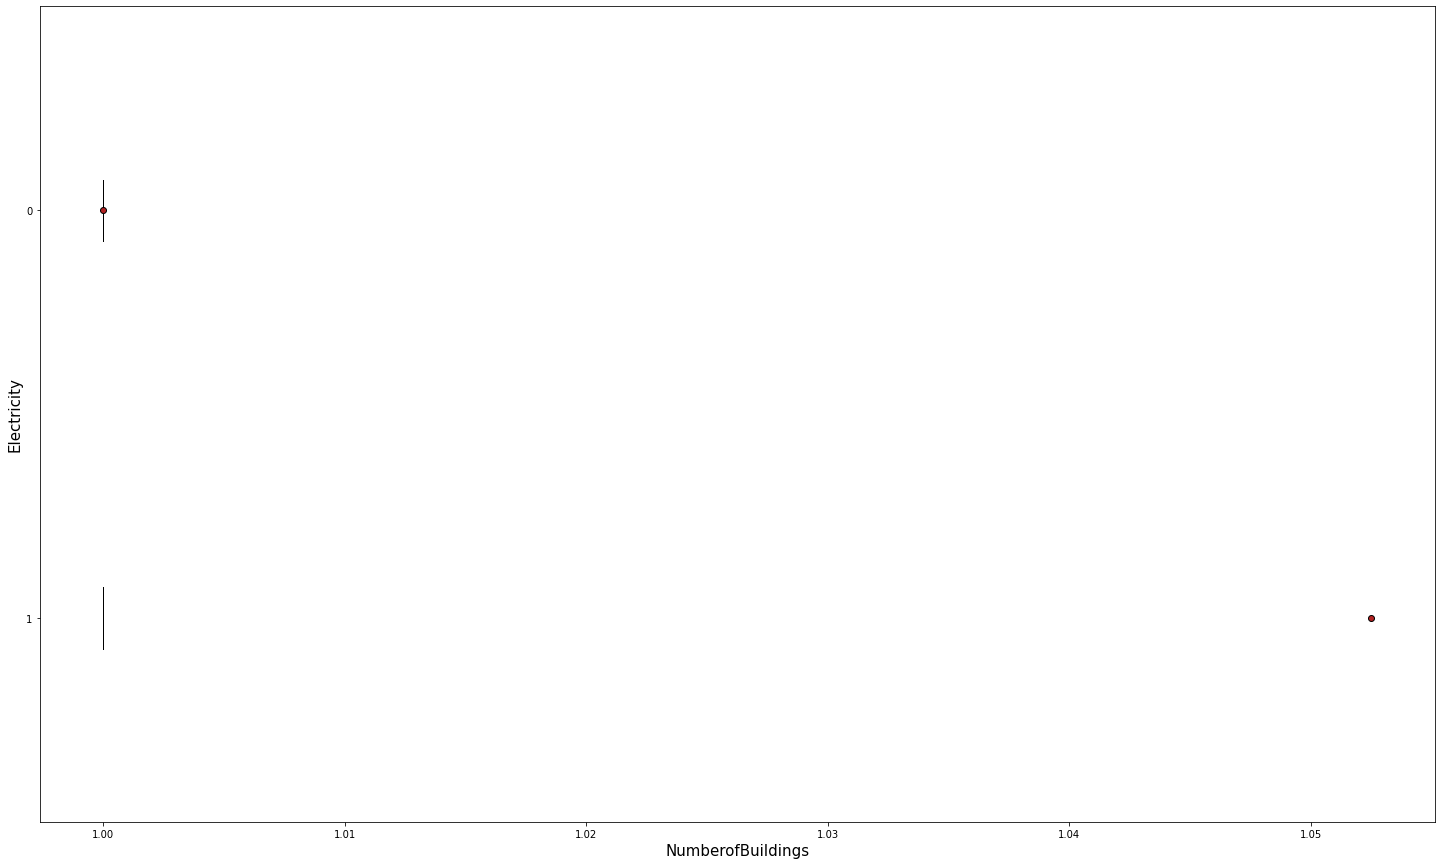

stat=0.005, p=0.946
Les variables sont indépendantes (H0 n'est pas rejetée)
        Source           SS    DF        MS         F     p-unc       np2
0  Electricity     0.005504     1  0.005504  0.004634  0.945735  0.000003
1       Within  1832.747894  1543  1.187782       NaN       NaN       NaN


In [158]:
# Test d'indépendance entre 'NumberofBuildings' et 'Electricity'
anova(df_build, 'NumberofBuildings', 'Electricity') 

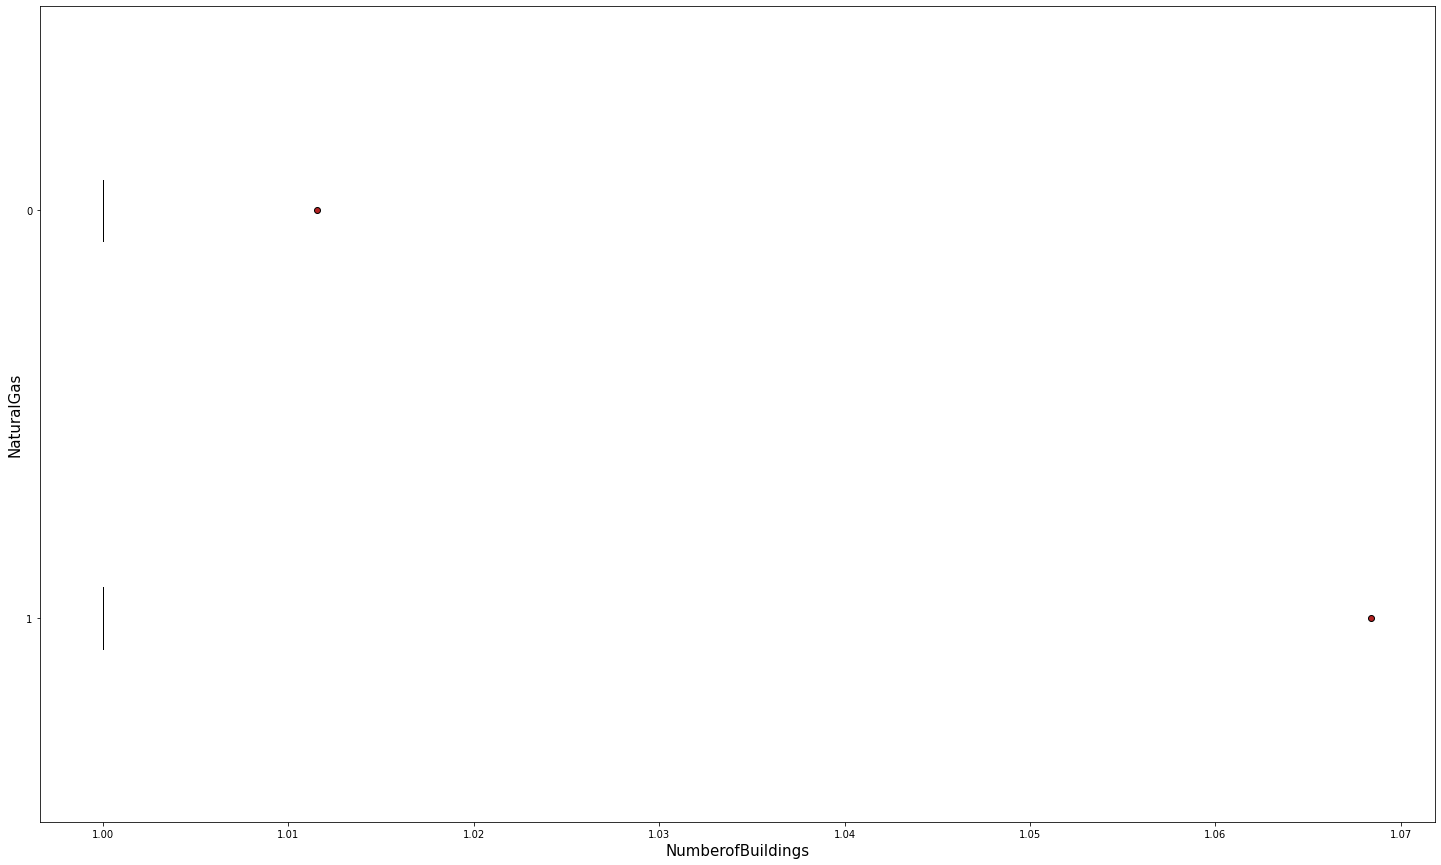

stat=0.851, p=0.356
Les variables sont indépendantes (H0 n'est pas rejetée)
       Source           SS    DF        MS         F     p-unc       np2
0  NaturalGas     1.009922     1  1.009922  0.850725  0.356492  0.000551
1      Within  1831.743476  1543  1.187131       NaN       NaN       NaN


In [159]:
# Test d'indépendance entre 'NumberofBuildings' et 'NaturalGas'
anova(df_build, 'NumberofBuildings', 'NaturalGas') 

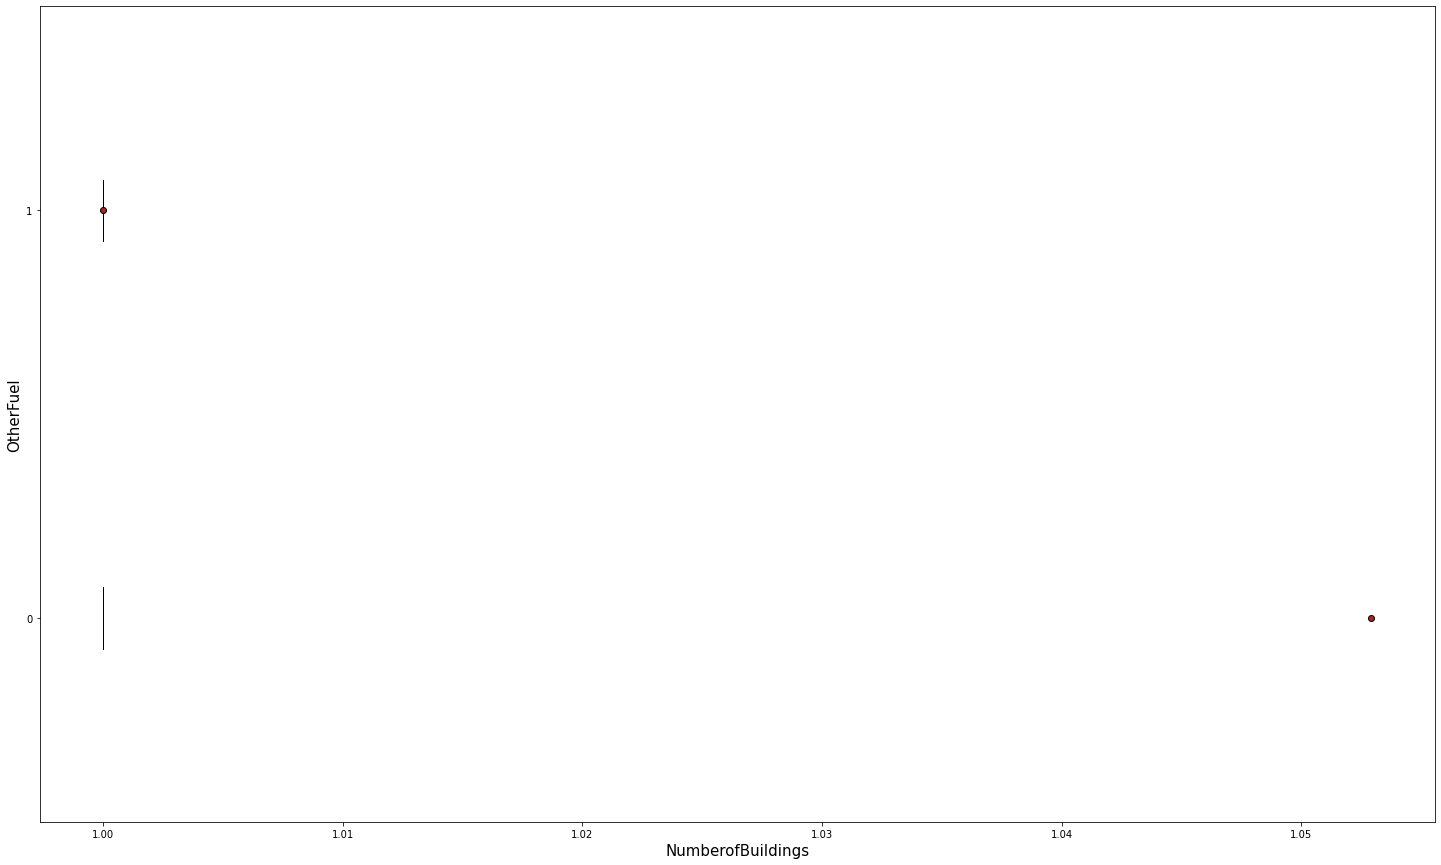

stat=0.033, p=0.857
Les variables sont indépendantes (H0 n'est pas rejetée)
      Source           SS    DF        MS         F     p-unc       np2
0  OtherFuel     0.038832     1  0.038832  0.032694  0.856537  0.000021
1     Within  1832.714566  1543  1.187761       NaN       NaN       NaN


In [160]:
# Test d'indépendance entre 'NumberofBuildings' et 'OtherFuel'
anova(df_build, 'NumberofBuildings', 'OtherFuel') 

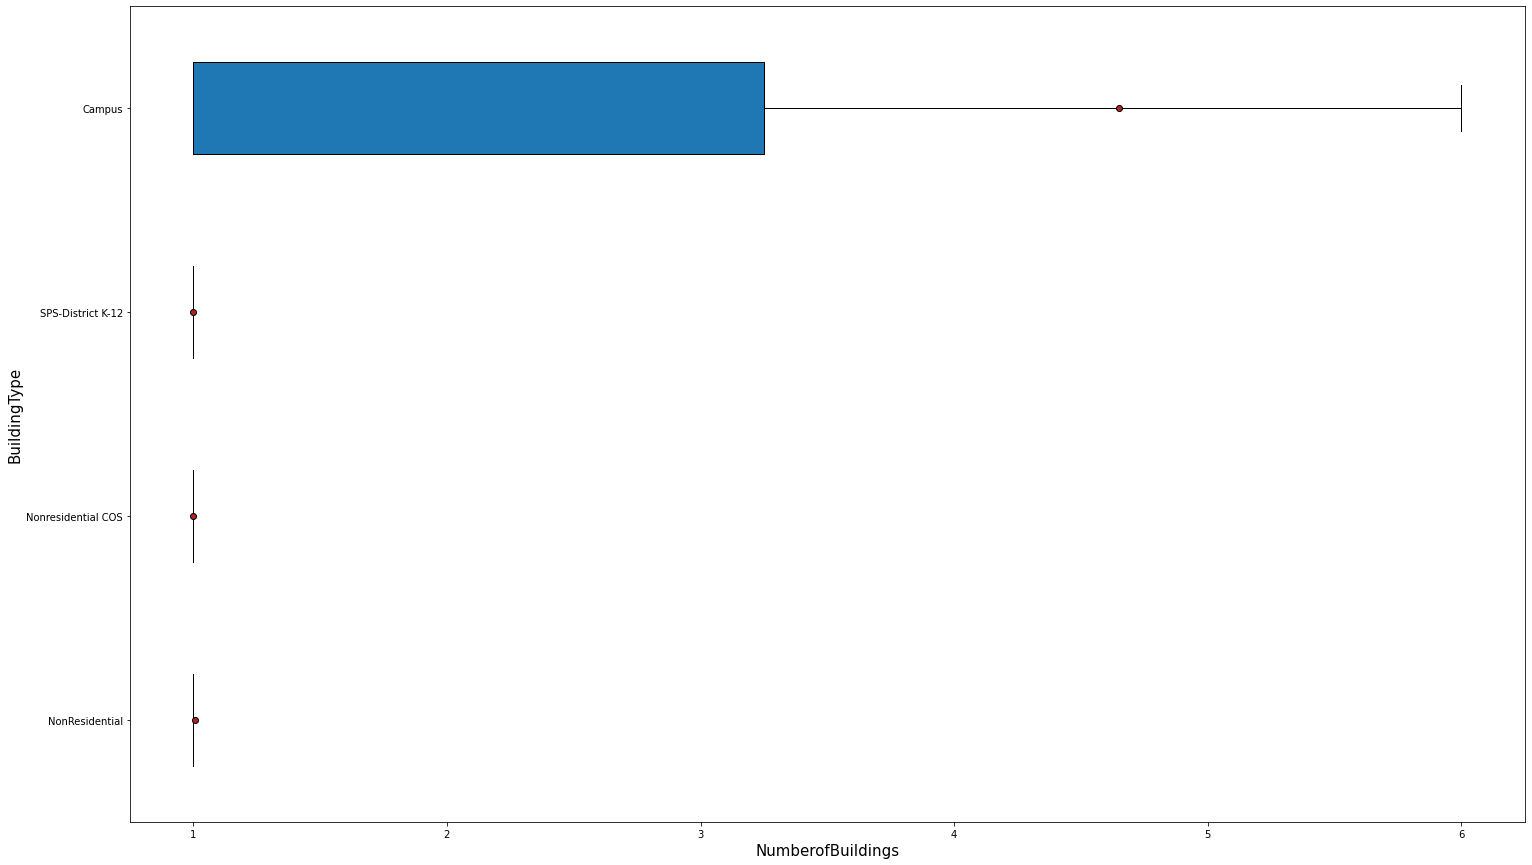

stat=85.774, p=0.000
Les variables sont corrélées (H0 est rejetée)
         Source           SS    DF         MS          F         p-unc  \
0  BuildingType   262.250079     3  87.416693  85.774492  2.522418e-51   
1        Within  1570.503319  1541   1.019146        NaN           NaN   

        np2  
0  0.143091  
1       NaN  


In [161]:
# Test d'indépendance entre 'NumberofBuildings' et 'BuildingType'
anova(df_build, 'NumberofBuildings', 'BuildingType') 

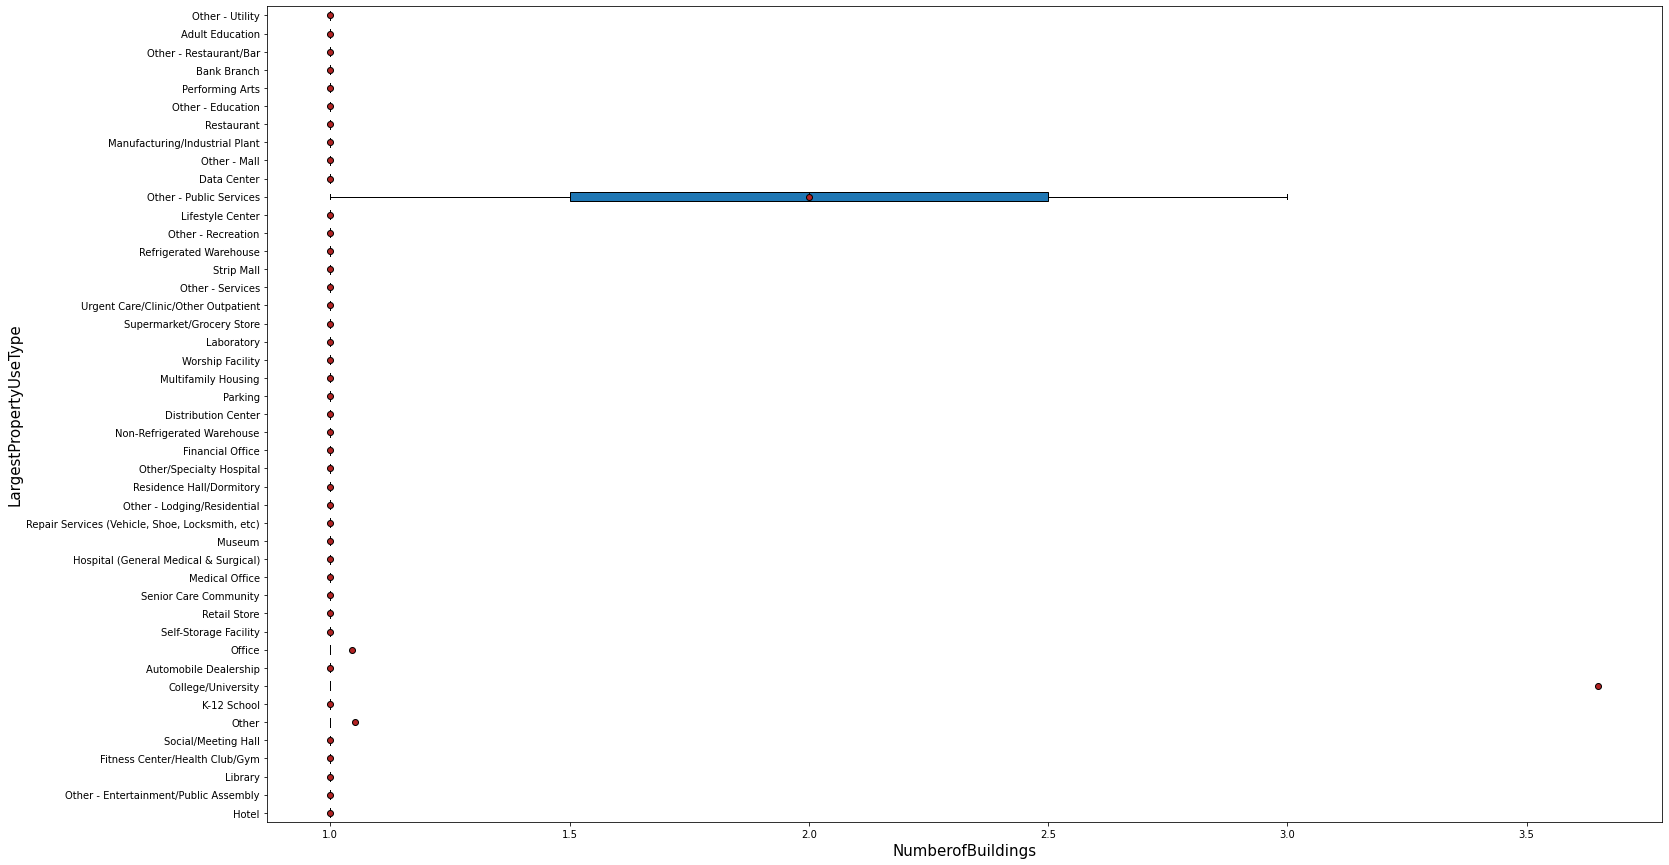

stat=2.787, p=0.000
Les variables sont corrélées (H0 est rejetée)
                   Source           SS    DF        MS         F  \
0  LargestPropertyUseType   139.410881    54  2.581683  2.271665   
1                  Within  1693.342517  1490  1.136471       NaN   

          p-unc       np2  
0  6.557326e-07  0.076066  
1           NaN       NaN  


In [162]:
# Test d'indépendance entre 'NumberofBuildings' et 'LargestPropertyUseType'
anova(df_build, 'NumberofBuildings', 'LargestPropertyUseType') 

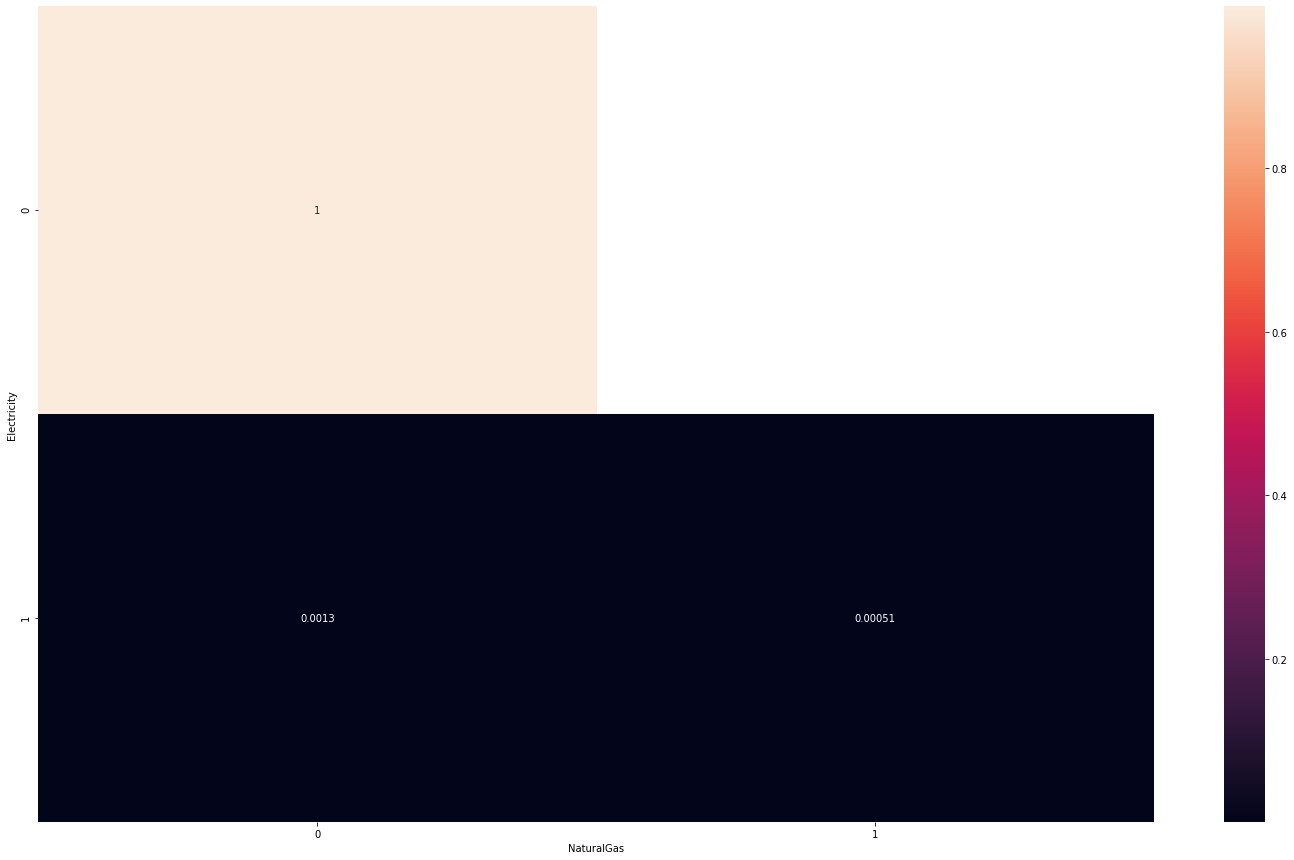

nan nan 4 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [163]:
# Tester l'indépendance entre 'Electricity' et 'NaturalGas'
chi_2(df_build, 'Electricity', 'NaturalGas')

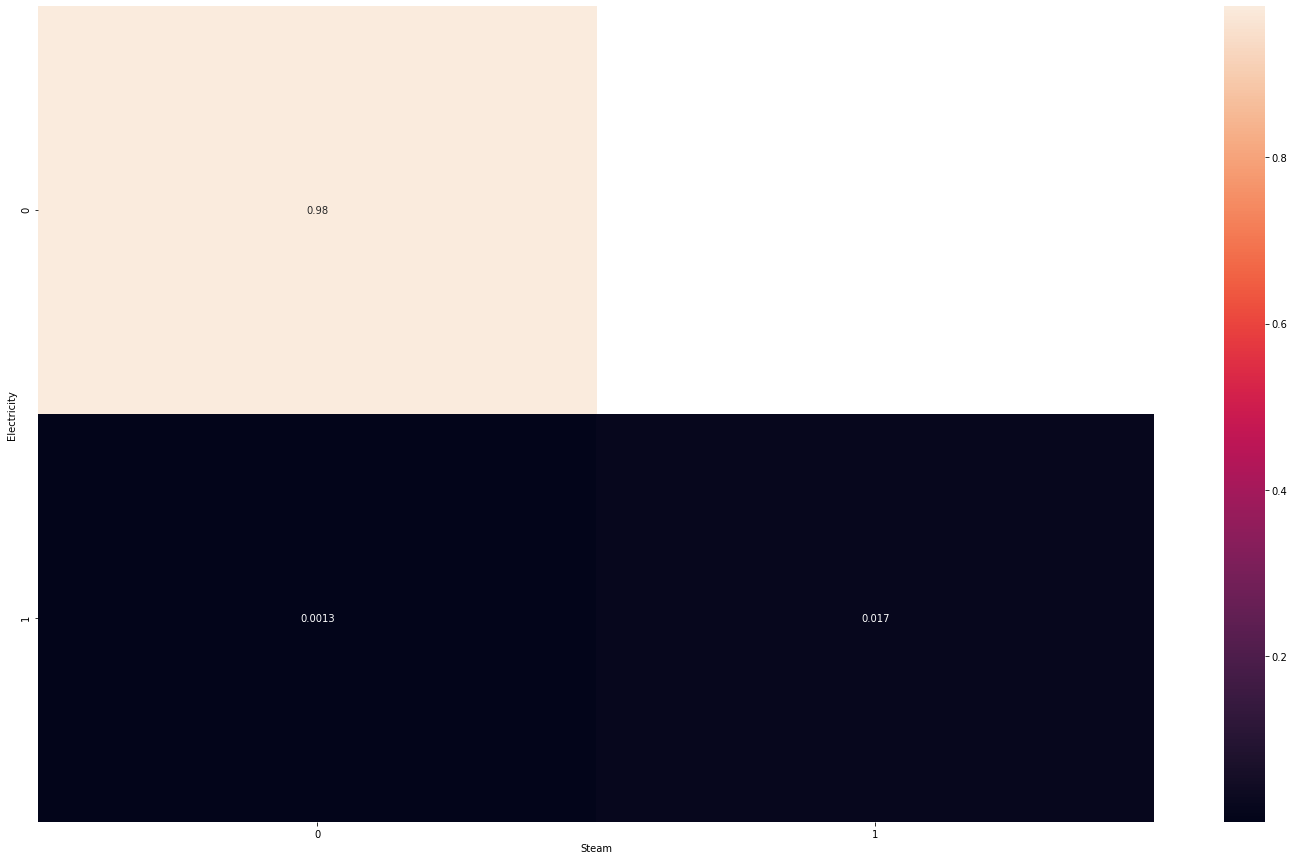

nan nan 4 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [164]:
# Tester l'indépendance entre 'Electricity' et 'Steam'
chi_2(df_build, 'Electricity', 'Steam')

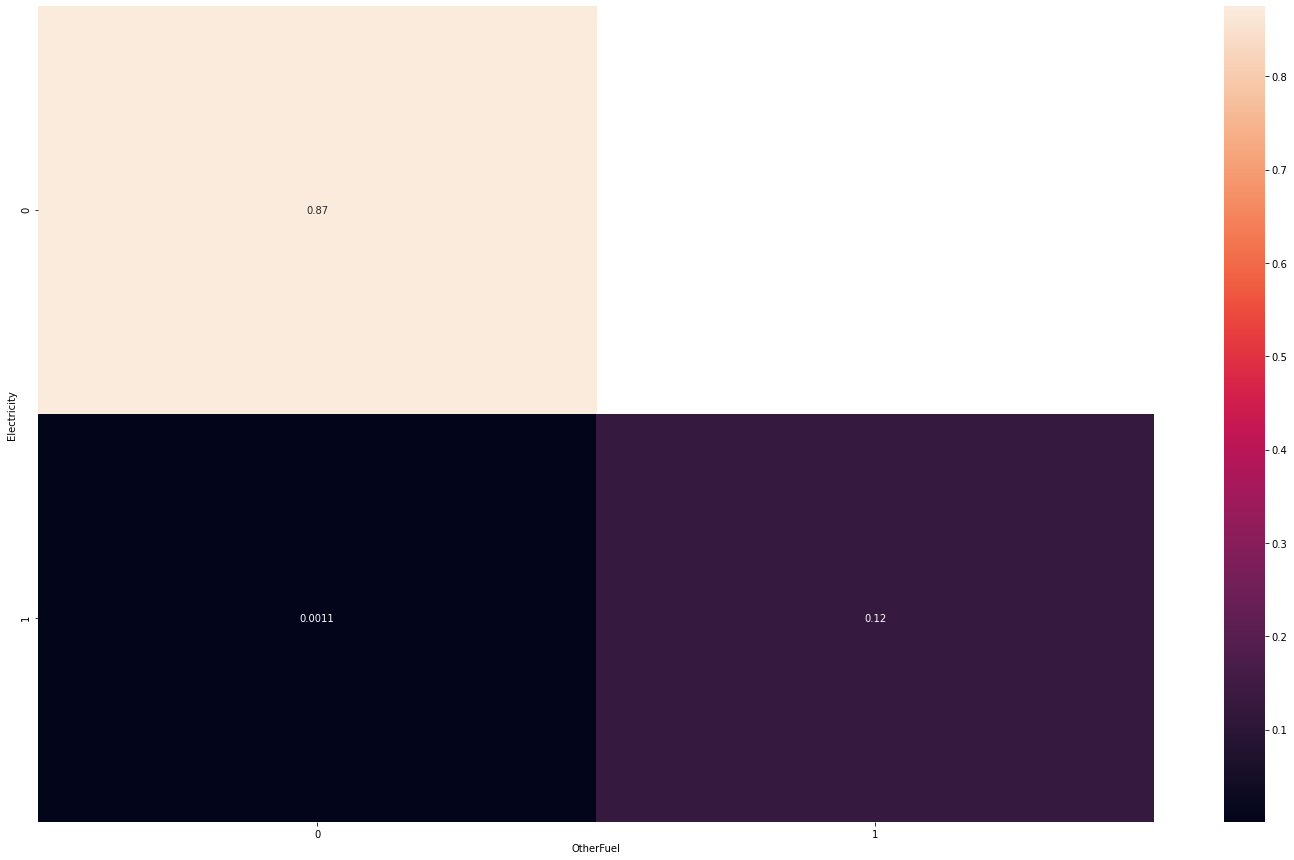

nan nan 4 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [165]:
# Tester l'indépendance entre 'Electricity' et 'OtherFuel'
chi_2(df_build, 'Electricity', 'OtherFuel')

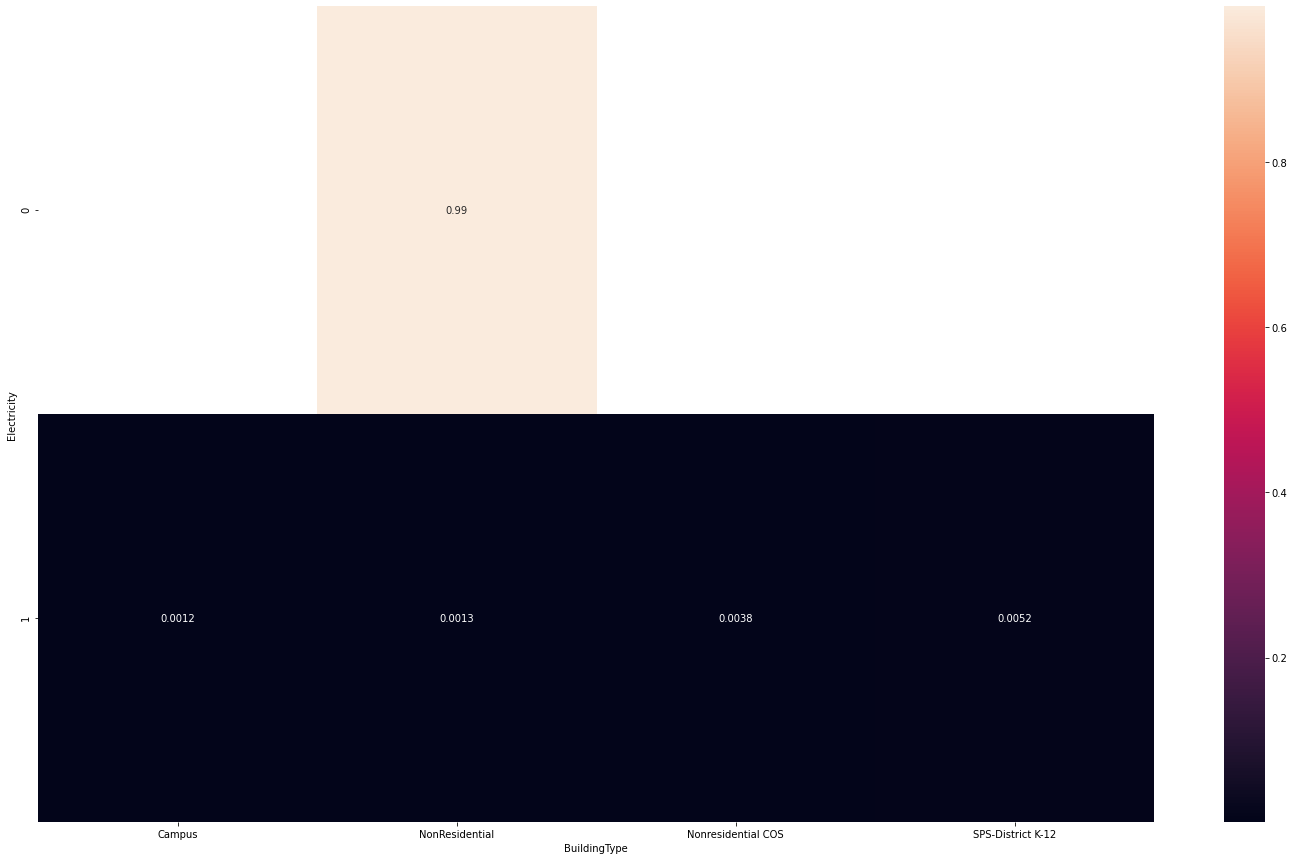

nan nan 8 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [166]:
# Tester l'indépendance entre 'Electricity' et 'BuildingType'
chi_2(df_build, 'Electricity', 'BuildingType')

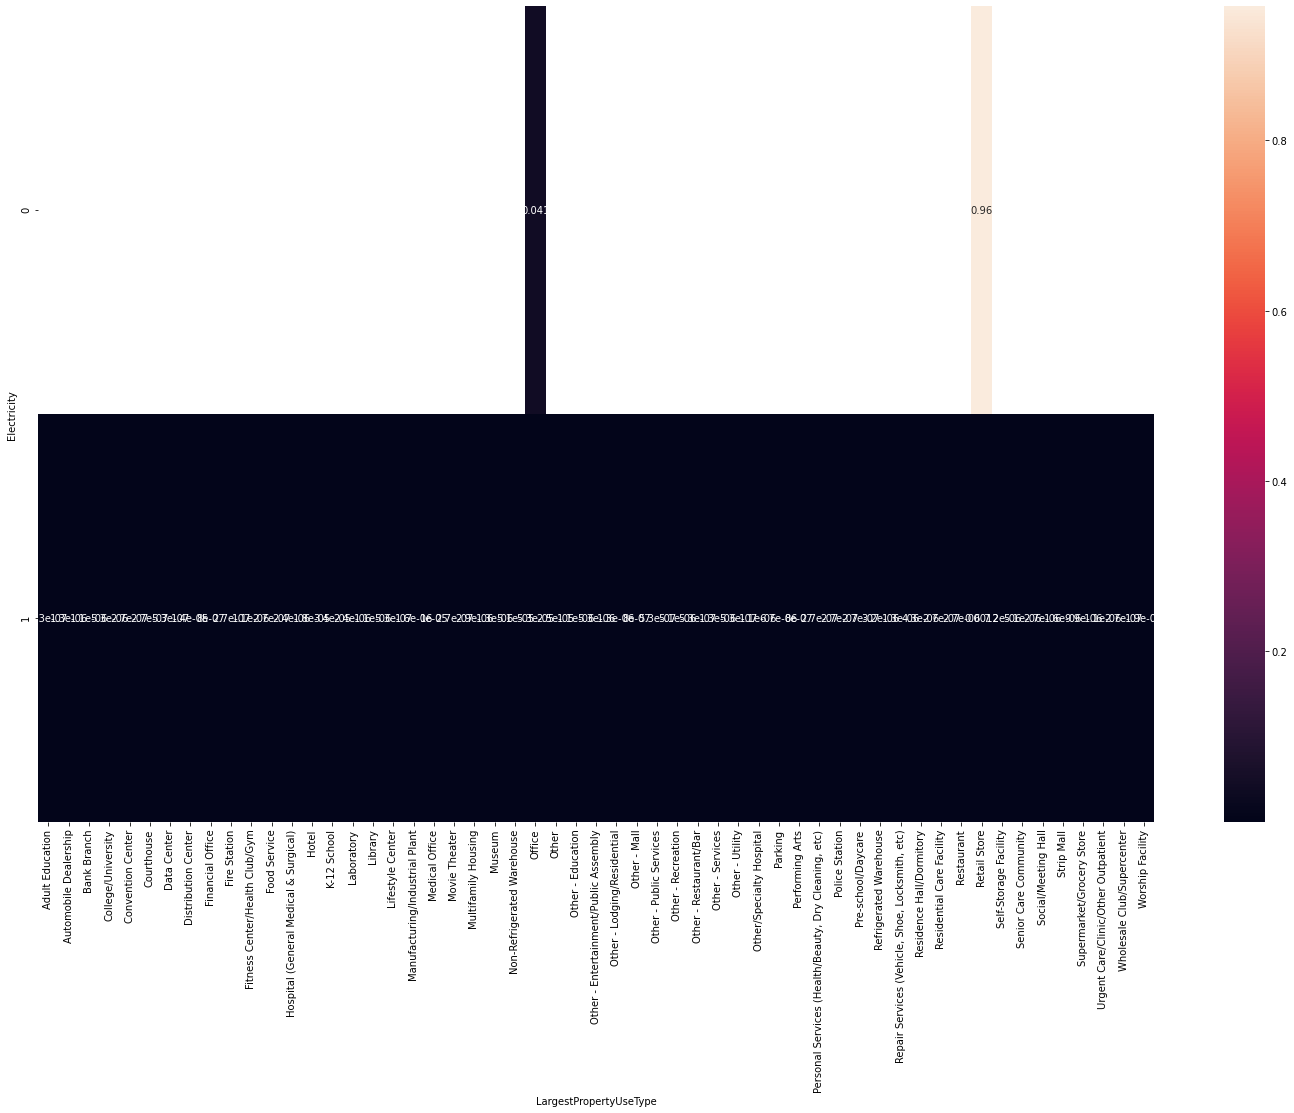

nan nan 110 [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [167]:
# Tester l'indépendance entre 'Electricity' et 'LargestPropertyUseType'
chi_2(df_build, 'Electricity', 'LargestPropertyUseType')

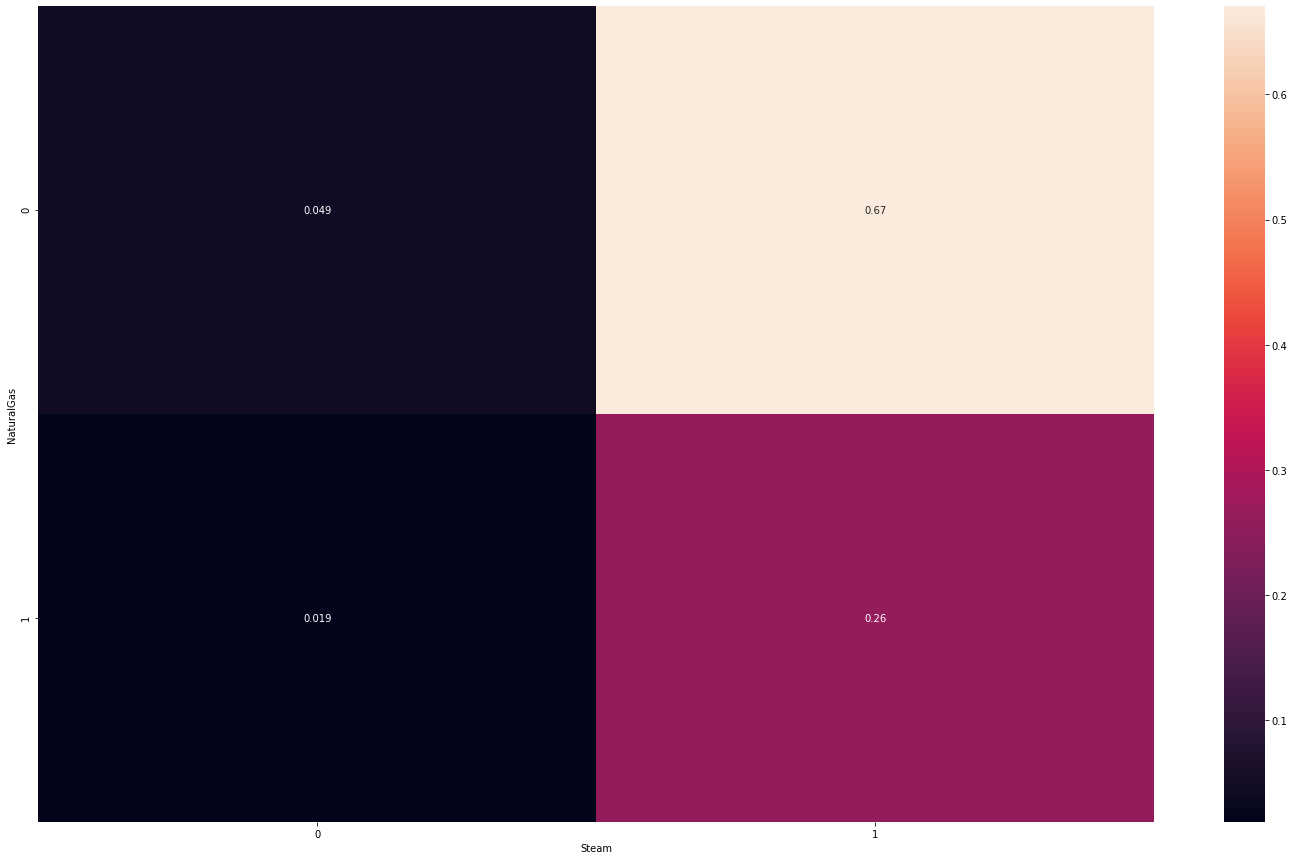

13.780128424297342 0.008030889870637731 4 [[ 404.50485437   29.49514563  434.        ]
 [1035.49514563   75.50485437 1111.        ]
 [1440.          105.         1545.        ]]
Les variables sont corrélées (H0 est rejetée)


In [168]:
# Tester l'indépendance entre 'NaturalGas' et 'Steam'
chi_2(df_build, 'NaturalGas', 'Steam')

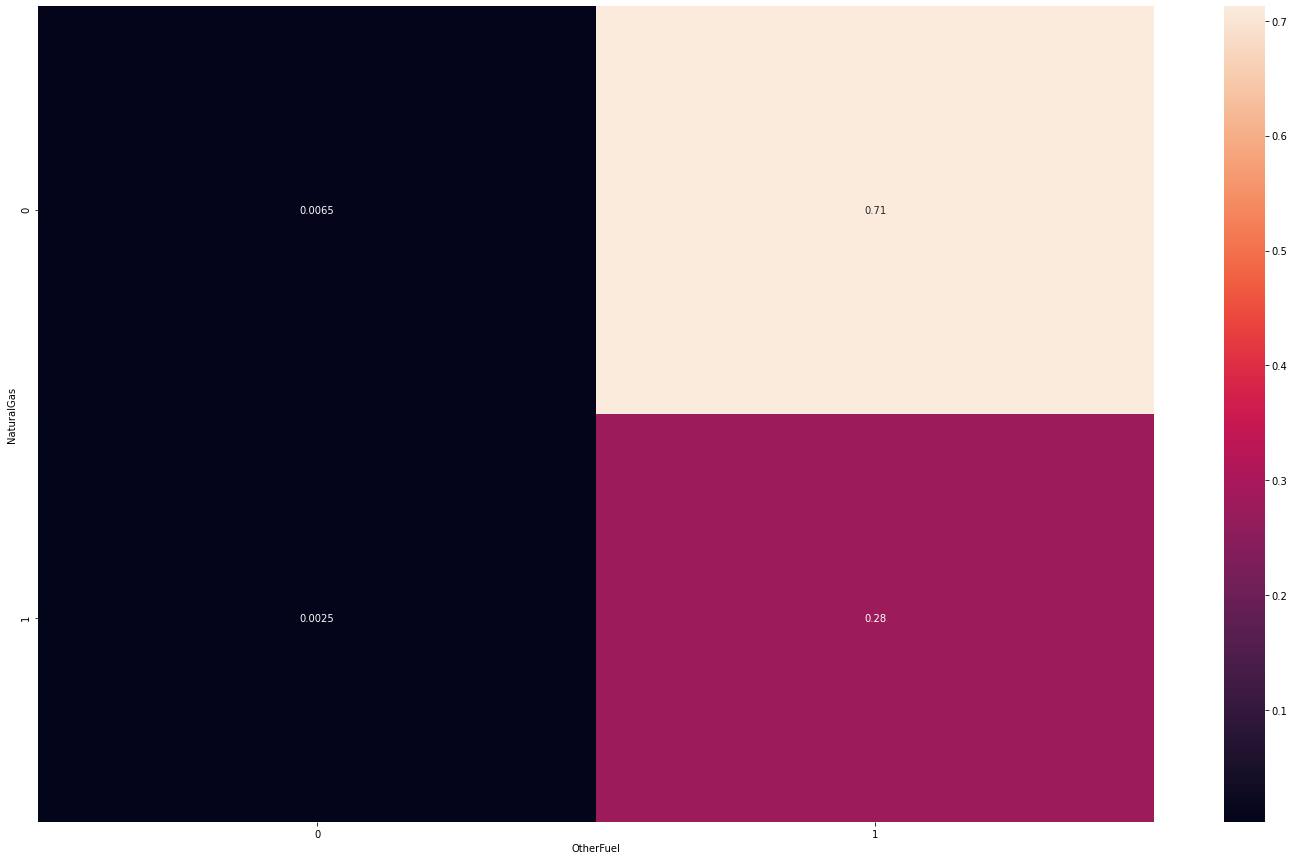

17.823262397578677 0.0013362043450230717 4 [[ 430.06731392    3.93268608  434.        ]
 [1100.93268608   10.06731392 1111.        ]
 [1531.           14.         1545.        ]]
Les variables sont corrélées (H0 est rejetée)


In [169]:
# Tester l'indépendance entre 'NaturalGas' et 'OtherFuel'
chi_2(df_build, 'NaturalGas', 'OtherFuel')

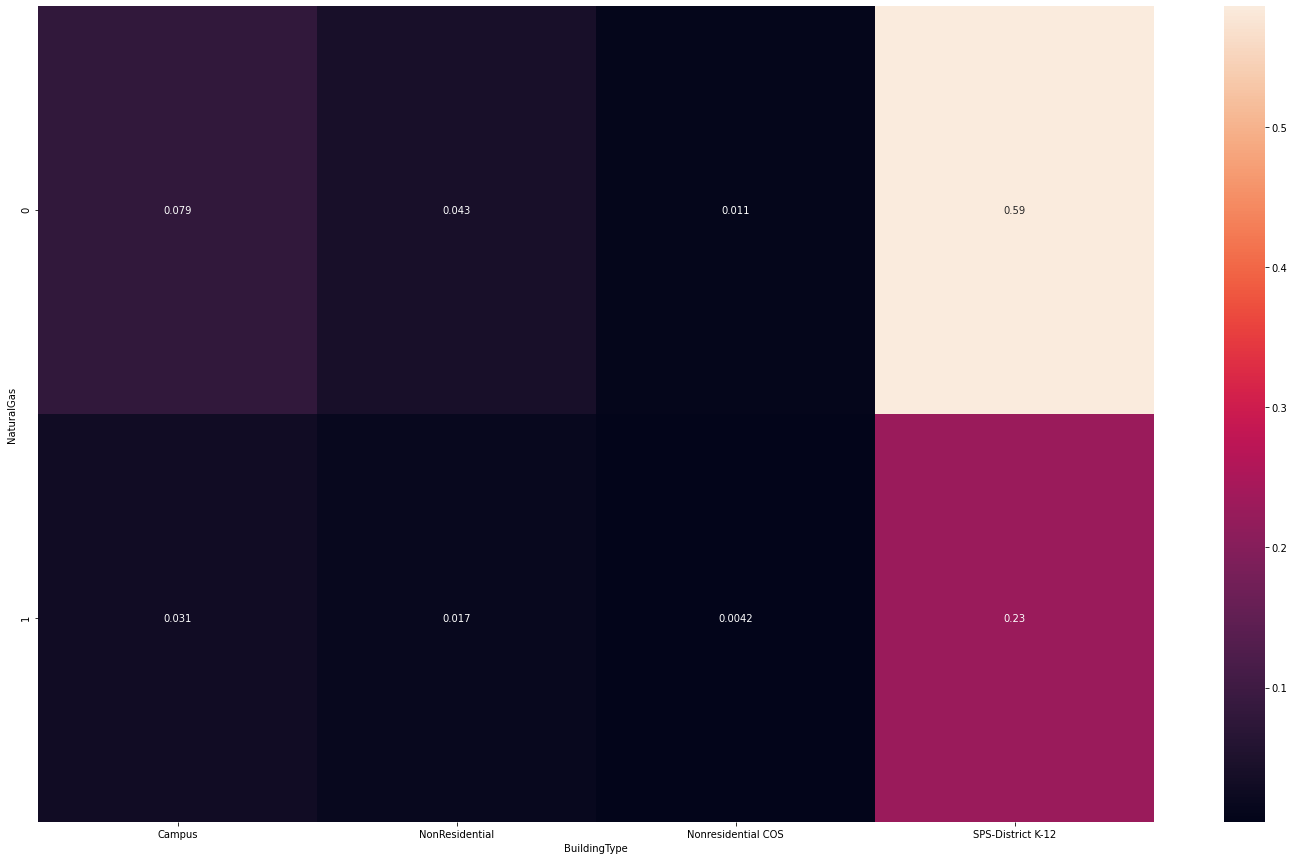

15.354391129904004 0.05260996977064168 8 [[   5.61812298  385.1223301    18.25889968   25.00064725  434.        ]
 [  14.38187702  985.8776699    46.74110032   63.99935275 1111.        ]
 [  20.         1371.           65.           89.         1545.        ]]
Les variables sont indépendantes (H0 n'est pas rejetée)


In [170]:
# Tester l'indépendance entre 'NaturalGas' et 'BuildingType'
chi_2(df_build, 'NaturalGas', 'BuildingType')

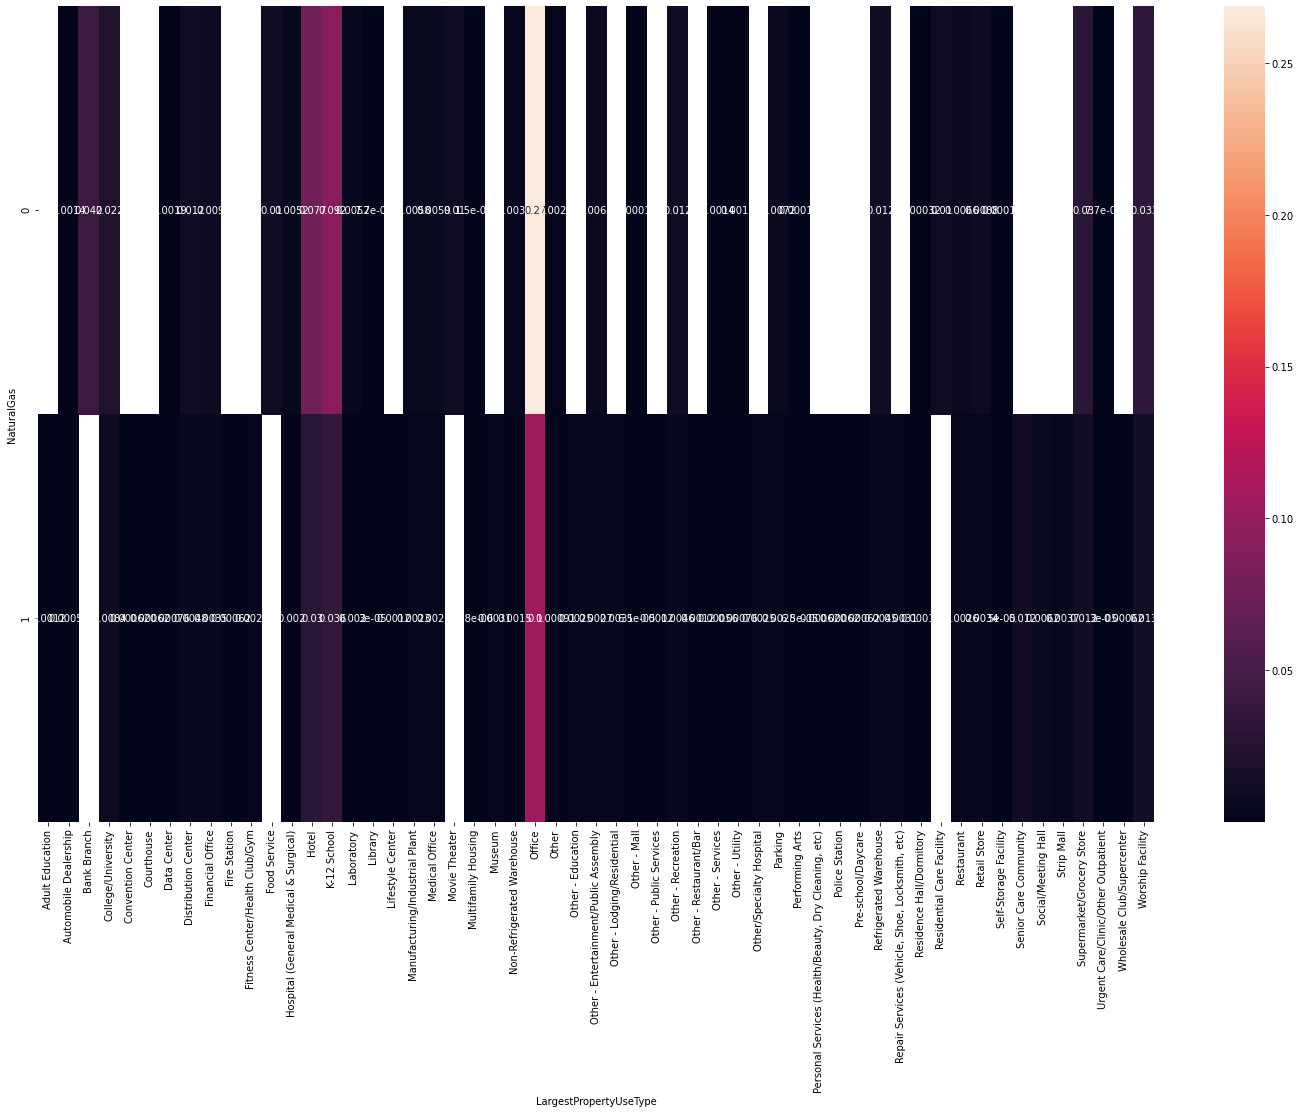

nan nan 110 [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [171]:
# Tester l'indépendance entre 'NaturalGas' et 'LargestPropertyUseType'
chi_2(df_build, 'NaturalGas', 'LargestPropertyUseType')

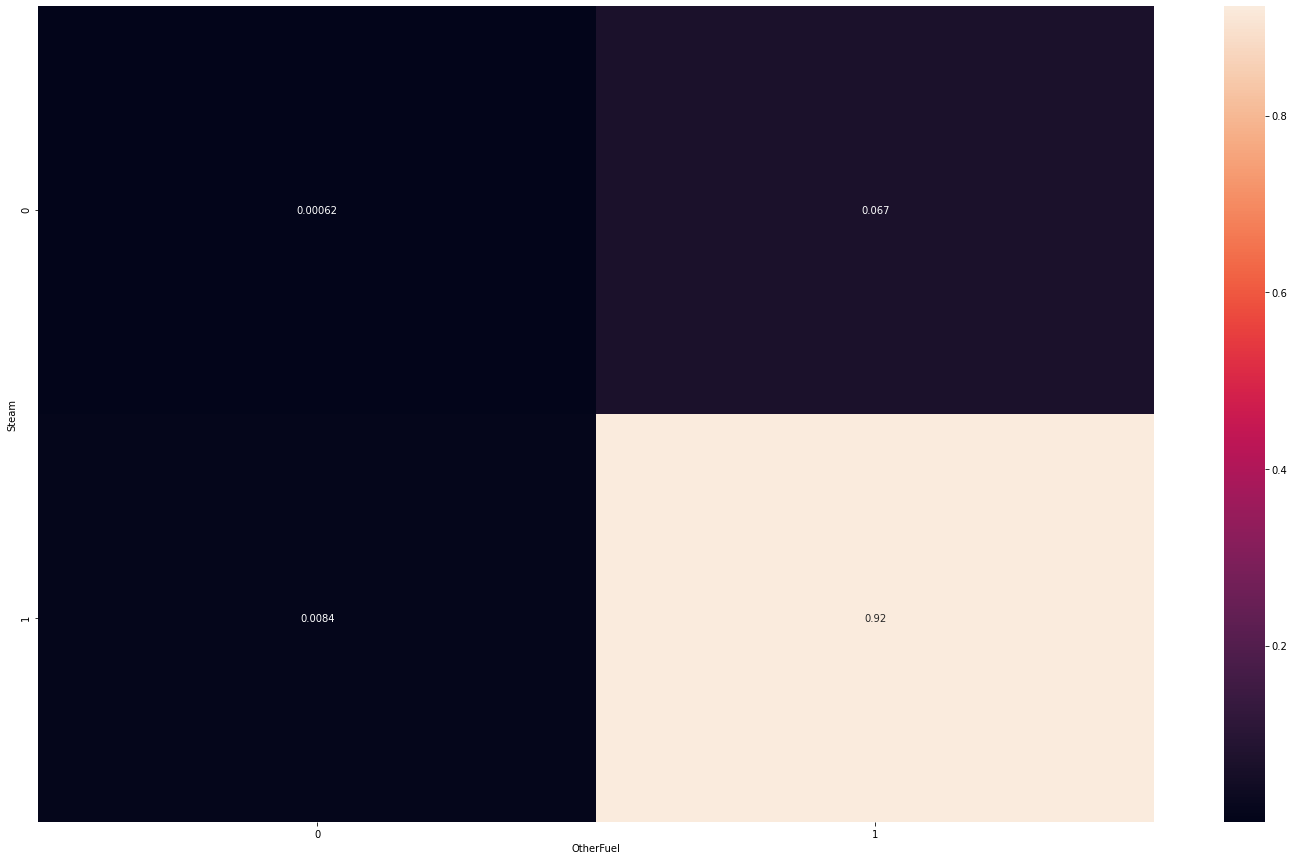

93.1725129633826 2.788222442394382e-19 4 [[1.42695146e+03 1.30485437e+01 1.44000000e+03]
 [1.04048544e+02 9.51456311e-01 1.05000000e+02]
 [1.53100000e+03 1.40000000e+01 1.54500000e+03]]
Les variables sont corrélées (H0 est rejetée)


In [172]:
# Tester l'indépendance entre 'Steam' et 'OtherFuel'
chi_2(df_build, 'Steam', 'OtherFuel')

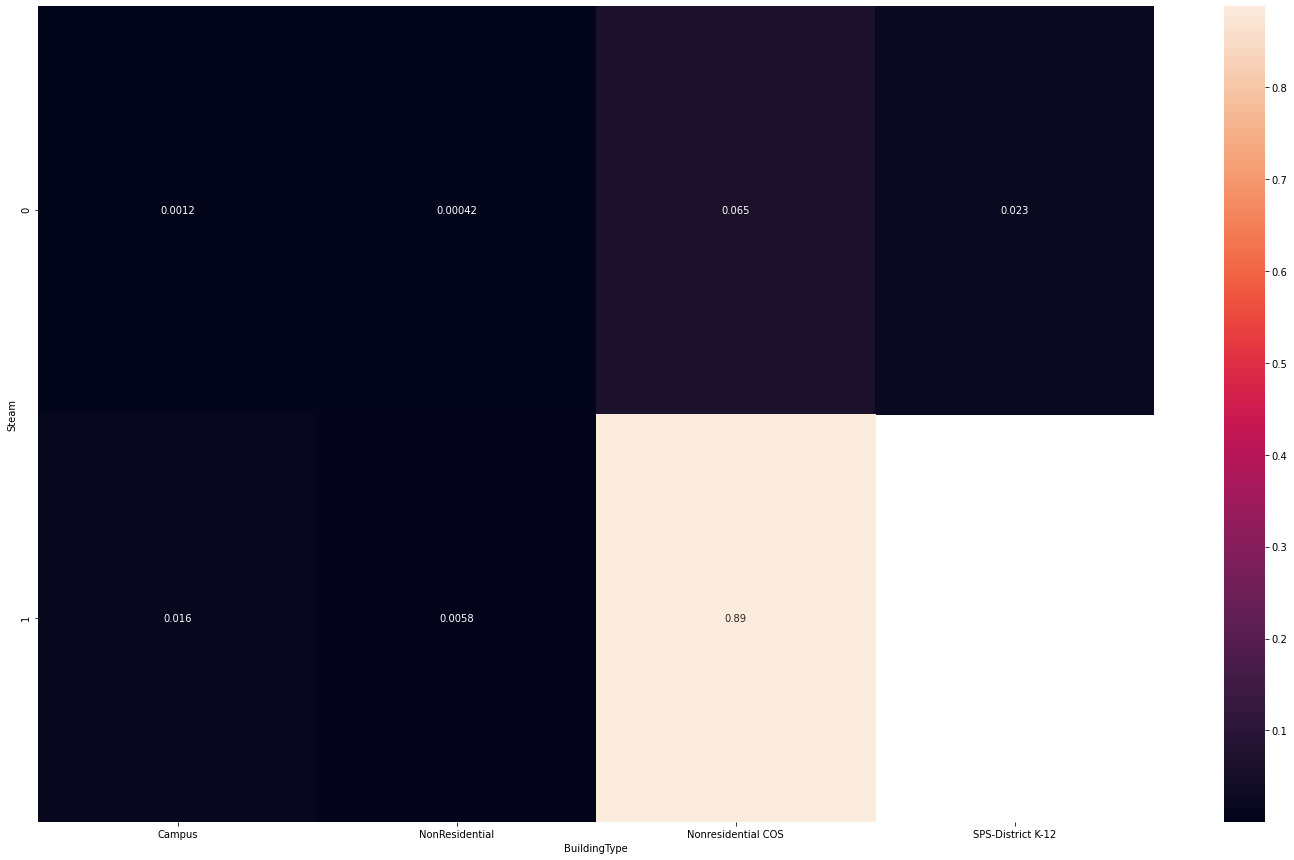

nan nan 8 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [173]:
# Tester l'indépendance entre 'Steam' et 'BuildingType'
chi_2(df_build, 'Steam', 'BuildingType')

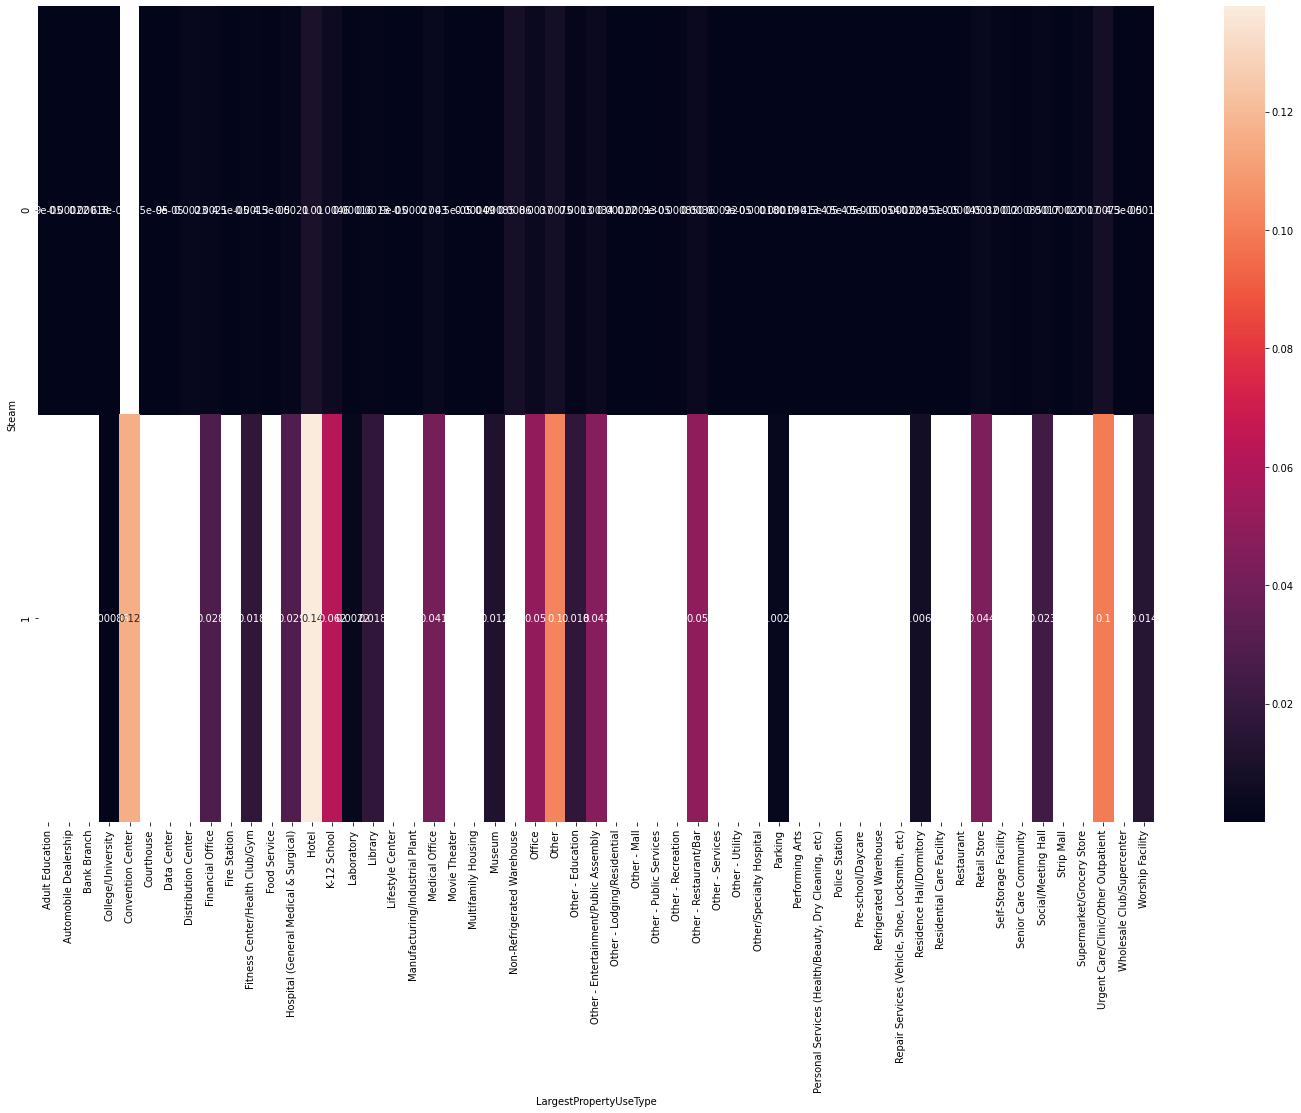

nan nan 110 [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]]
Les variables sont corrélées (H0 est rejetée)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [174]:
# Tester l'indépendance entre 'Steam' et 'LargestPropertyUseType'
chi_2(df_build, 'Steam', 'LargestPropertyUseType')

## Sauvegarder le data set final 

In [175]:
df_build.to_csv('df_build.csv', encoding='utf8')

## Data Set où l'on considère l'ENERGYSTARScore comme une feature

In [176]:
df_build_STARSCORE = df_build.dropna(subset=['ENERGYSTARScore'], how='any')

In [177]:
df_build_STARSCORE.shape

(1048, 19)

### Recherche de corrélation de l'ENERGYSTARScore et des targets

Le r de pearson est -0.42200578474185857 rpearson
La covariance empirique est -777.3856079009091 covar
            n         r           CI95%        r2    adj_r2         p-val  \
pearson  1048 -0.422006  [-0.47, -0.37]  0.178089  0.176516  1.652948e-46   

              BF10  power  
pearson  1.121e+43    1.0  


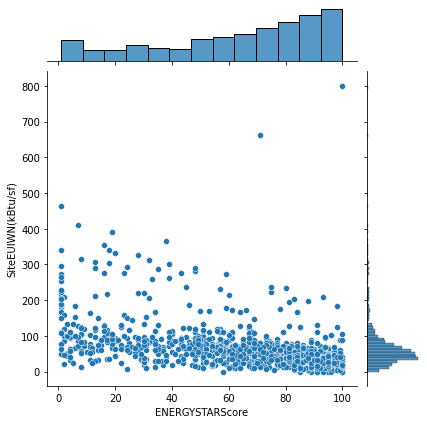

In [178]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'SiteEUI(kBtu/sf)

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)')

Le r de pearson est -0.30199230721431936 rpearson
La covariance empirique est -15.125208703601185 covar
            n         r           CI95%        r2   adj_r2         p-val  \
pearson  1048 -0.301992  [-0.36, -0.25]  0.091199  0.08946  1.538618e-23   

              BF10  power  
pearson  1.851e+20    1.0  


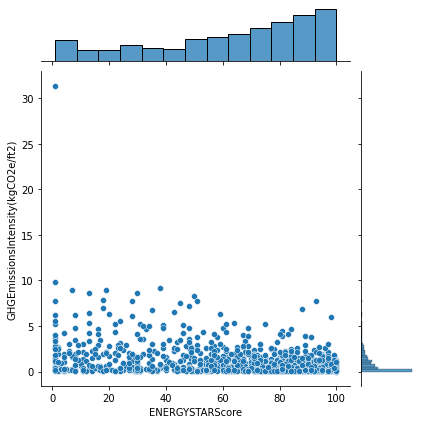

In [179]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'GHGEmissionsIntensity(kgCO2e/ft2)'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'GHGEmissionsIntensity(kgCO2e/ft2)')

### Recherche de corrélation de l'ENERGYSTARScore et des features

Le r de pearson est 0.12291882422914047 rpearson
La covariance empirique est 617833.7171411557 covar
            n         r         CI95%        r2    adj_r2     p-val     BF10  \
pearson  1048  0.122919  [0.06, 0.18]  0.015109  0.013224  0.000066  109.443   

            power  
pearson  0.979101  


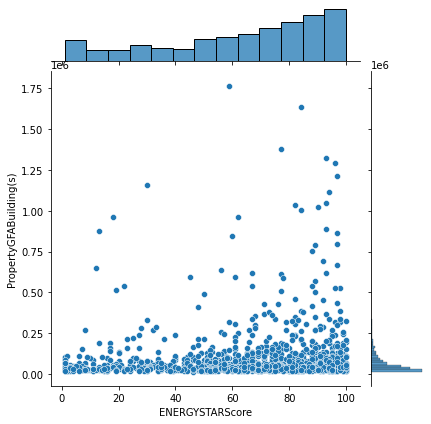

In [180]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'PropertyGFABuilding(s)'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'PropertyGFABuilding(s)')

Le r de pearson est 0.12276664135720003 rpearson
La covariance empirique est 576818.8390855356 covar
            n         r         CI95%        r2    adj_r2     p-val     BF10  \
pearson  1048  0.122767  [0.06, 0.18]  0.015072  0.013187  0.000068  107.296   

            power  
pearson  0.978849  


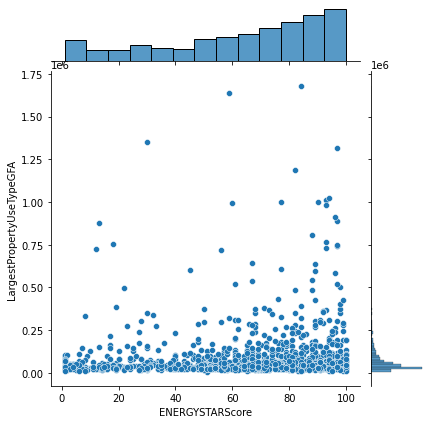

In [181]:
# Test d'indépendance entre 'ENERGYSTARScore' et 'LargestPropertyUseTypeGFA'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'LargestPropertyUseTypeGFA') 

Le r de pearson est 0.10428550905796595 rpearson
La covariance empirique est 23.264522390886313 covar
            n         r         CI95%        r2    adj_r2     p-val    BF10  \
pearson  1048  0.104286  [0.04, 0.16]  0.010875  0.008982  0.000722  11.662   

            power  
pearson  0.922921  


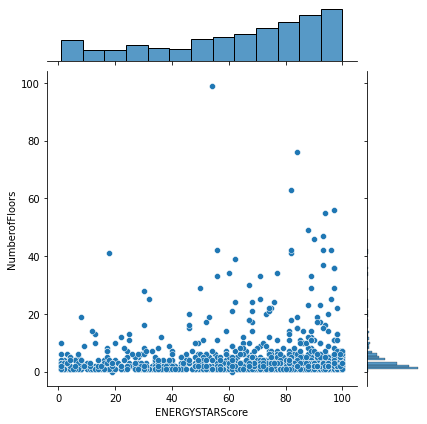

In [182]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'NumberofFloors'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'NumberofFloors')

Le r de pearson est 0.03902064489883139 rpearson
La covariance empirique est 35.34768333721811 covar
            n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  1048  0.039021  [-0.02, 0.1]  0.001523 -0.000388  0.206883  0.086   

            power  
pearson  0.243395  


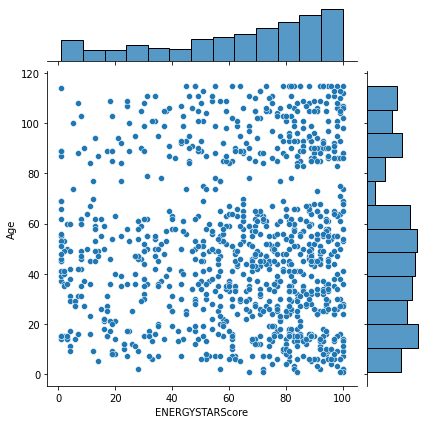

In [183]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'Age'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'Age')

Le r de pearson est -0.016584029653310853 rpearson
La covariance empirique est -0.014576110075170436 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  1048 -0.016584  [-0.08, 0.04]  0.000275 -0.001638  0.591773  0.045   

           power  
pearson  0.08354  


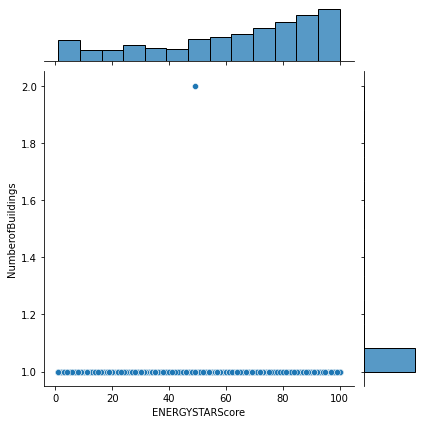

In [184]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'NumberofBuildings'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'NumberofBuildings')

Le r de pearson est 0.03820732837313525 rpearson
La covariance empirique est 0.05356581616055968 covar
            n         r         CI95%       r2    adj_r2     p-val   BF10  \
pearson  1048  0.038207  [-0.02, 0.1]  0.00146 -0.000451  0.216513  0.083   

            power  
pearson  0.235291  


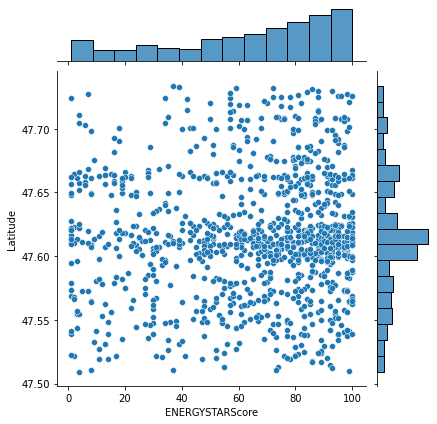

In [185]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'Latitude'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'Latitude')

Le r de pearson est -0.003779606192285758 rpearson
La covariance empirique est -0.0026519053493557028 covar
            n        r          CI95%        r2  adj_r2     p-val   BF10  \
pearson  1048 -0.00378  [-0.06, 0.06]  0.000014 -0.0019  0.902732  0.039   

            power  
pearson  0.051698  


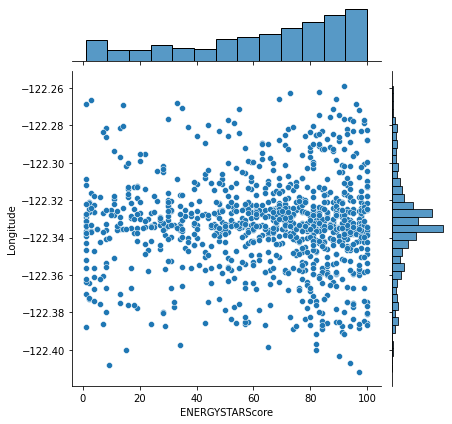

In [186]:
# Tester l'indépendance entre 'ENERGYSTARScore' et 'Longitude'

reg_lin(df_build_STARSCORE, 'ENERGYSTARScore', 'Longitude')

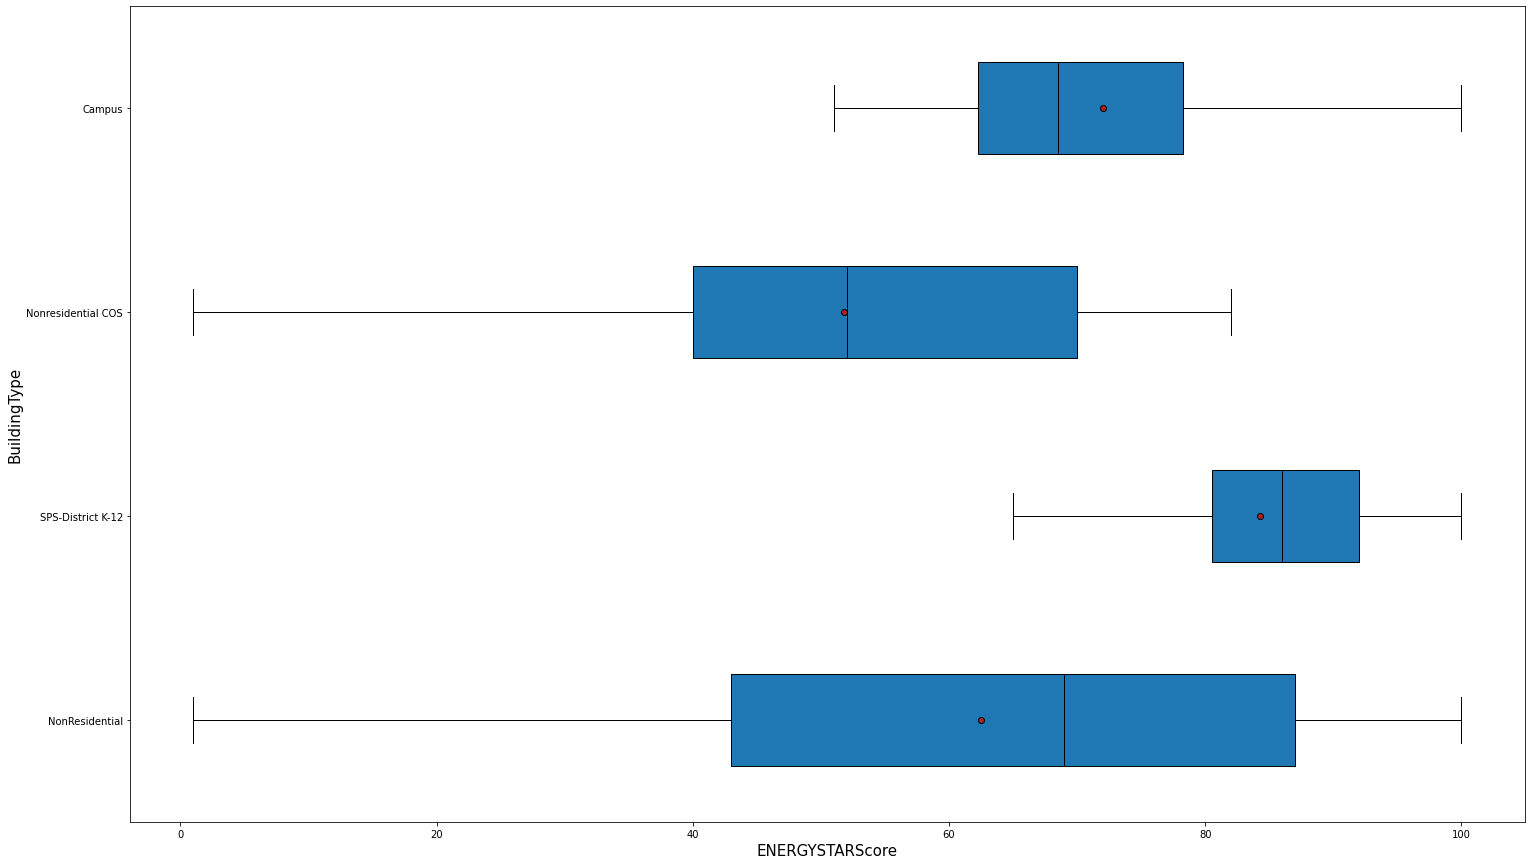

stat=16.906, p=0.000
Les variables sont corrélées (H0 est rejetée)
         Source             SS    DF            MS         F         p-unc  \
0  BuildingType   39346.028806     3  13115.342935  16.90603  9.970172e-11   
1        Within  809913.275583  1044    775.779000       NaN           NaN   

       np2  
0  0.04633  
1      NaN  


In [187]:
# Test d'indépendance entre 'ENERGYSTARScore' et 'BuildingType'

anova(df_build_STARSCORE, 'ENERGYSTARScore', 'BuildingType') 

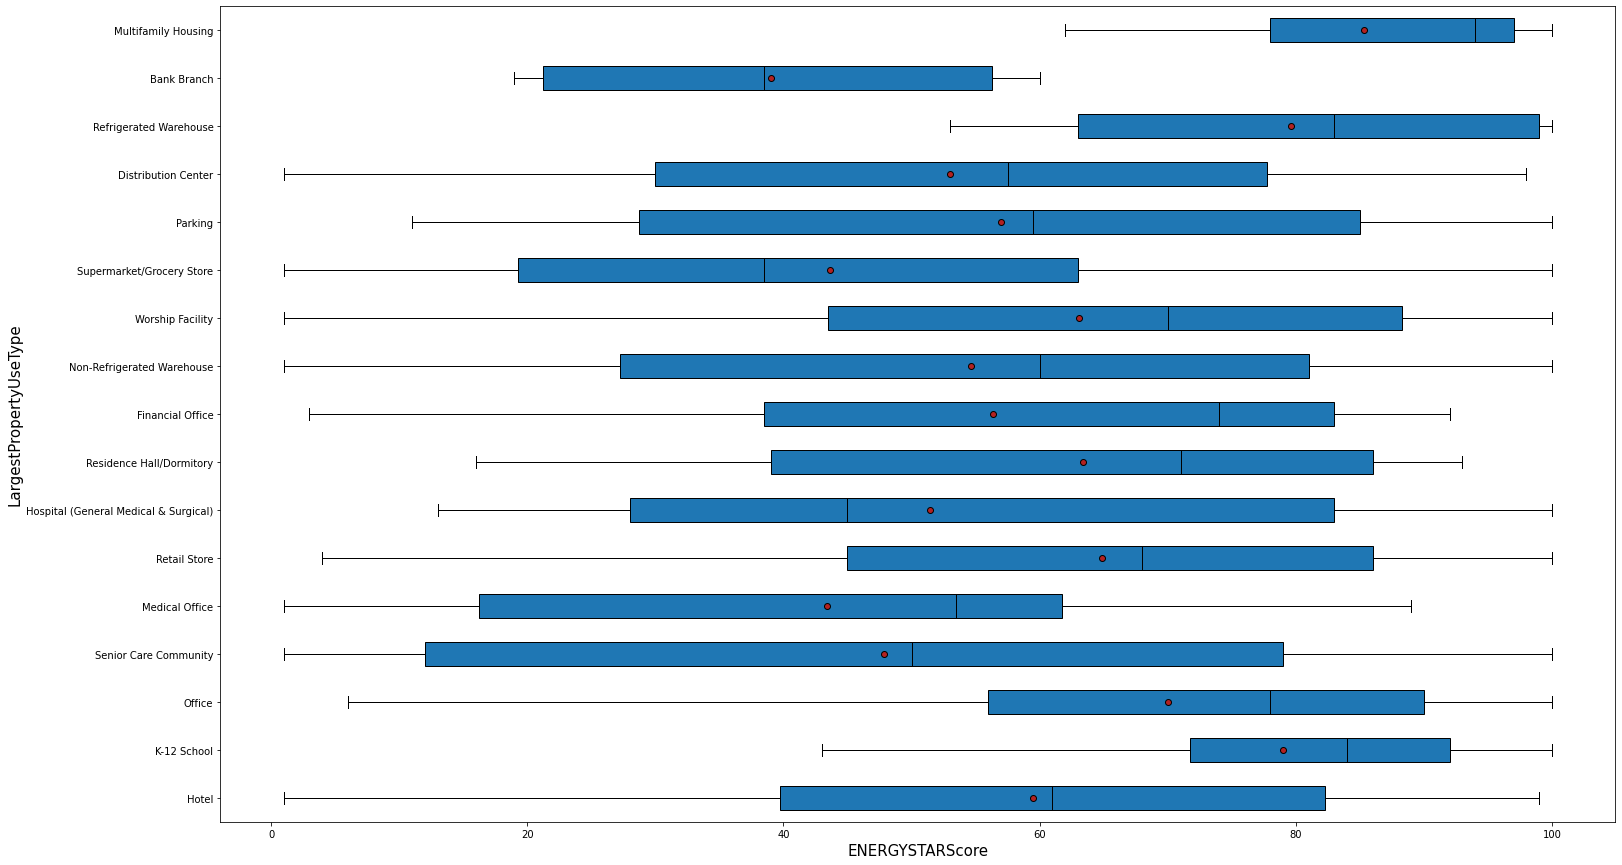

stat=8.794, p=0.000
Les variables sont corrélées (H0 est rejetée)
                   Source             SS    DF           MS         F  \
0  LargestPropertyUseType  112354.732314    25  4494.189293  6.232912   
1                  Within  736904.572075  1022   721.041656       NaN   

          p-unc       np2  
0  3.505245e-19  0.132297  
1           NaN       NaN  


In [188]:
# Test d'indépendance entre 'ENERGYSTARScore' et 'LargestPropertyUseType'

anova(df_build_STARSCORE, 'ENERGYSTARScore', 'LargestPropertyUseType') 

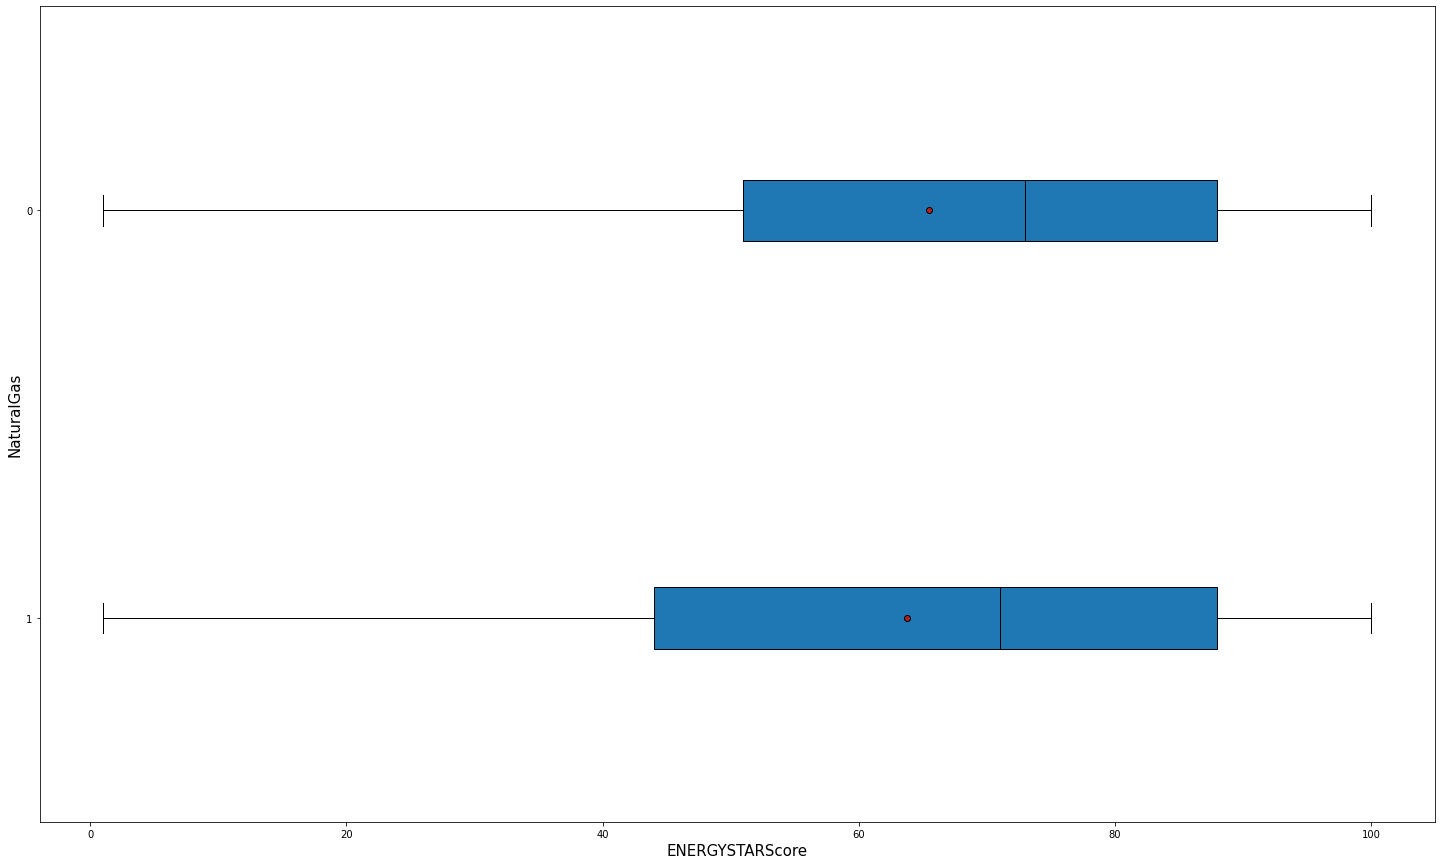

stat=0.819, p=0.366
Les variables sont indépendantes (H0 n'est pas rejetée)
       Source             SS    DF          MS         F     p-unc       np2
0  NaturalGas     664.545695     1  664.545695  0.819136  0.365641  0.000783
1      Within  848594.758694  1046  811.276060       NaN       NaN       NaN


In [189]:
# Test d'indépendance entre 'ENERGYSTARScore' et 'NaturalGas'

anova(df_build_STARSCORE, 'ENERGYSTARScore', 'NaturalGas') 

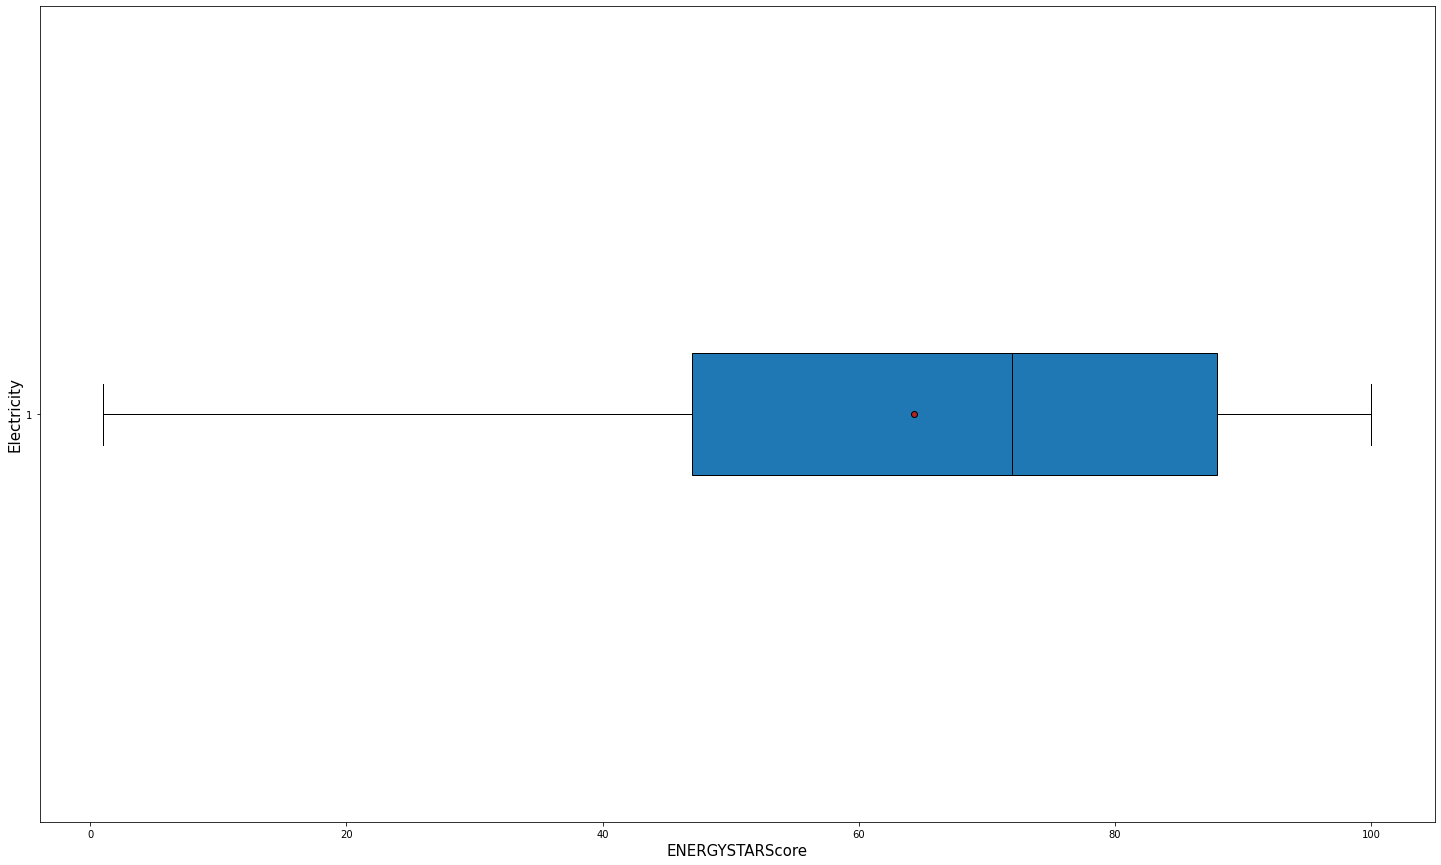

stat=nan, p=nan
Les variables sont indépendantes (H0 n'est pas rejetée)
        Source             SS    DF          MS  np2
0  Electricity       0.000000     0         NaN  0.0
1       Within  849259.304389  1047  811.135916  NaN


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3347: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn
/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:976: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1


In [190]:
# Test d'indépendance entre 'ENERGYSTARScore' et 'Electricity'

anova(df_build_STARSCORE, 'ENERGYSTARScore', 'Electricity') 

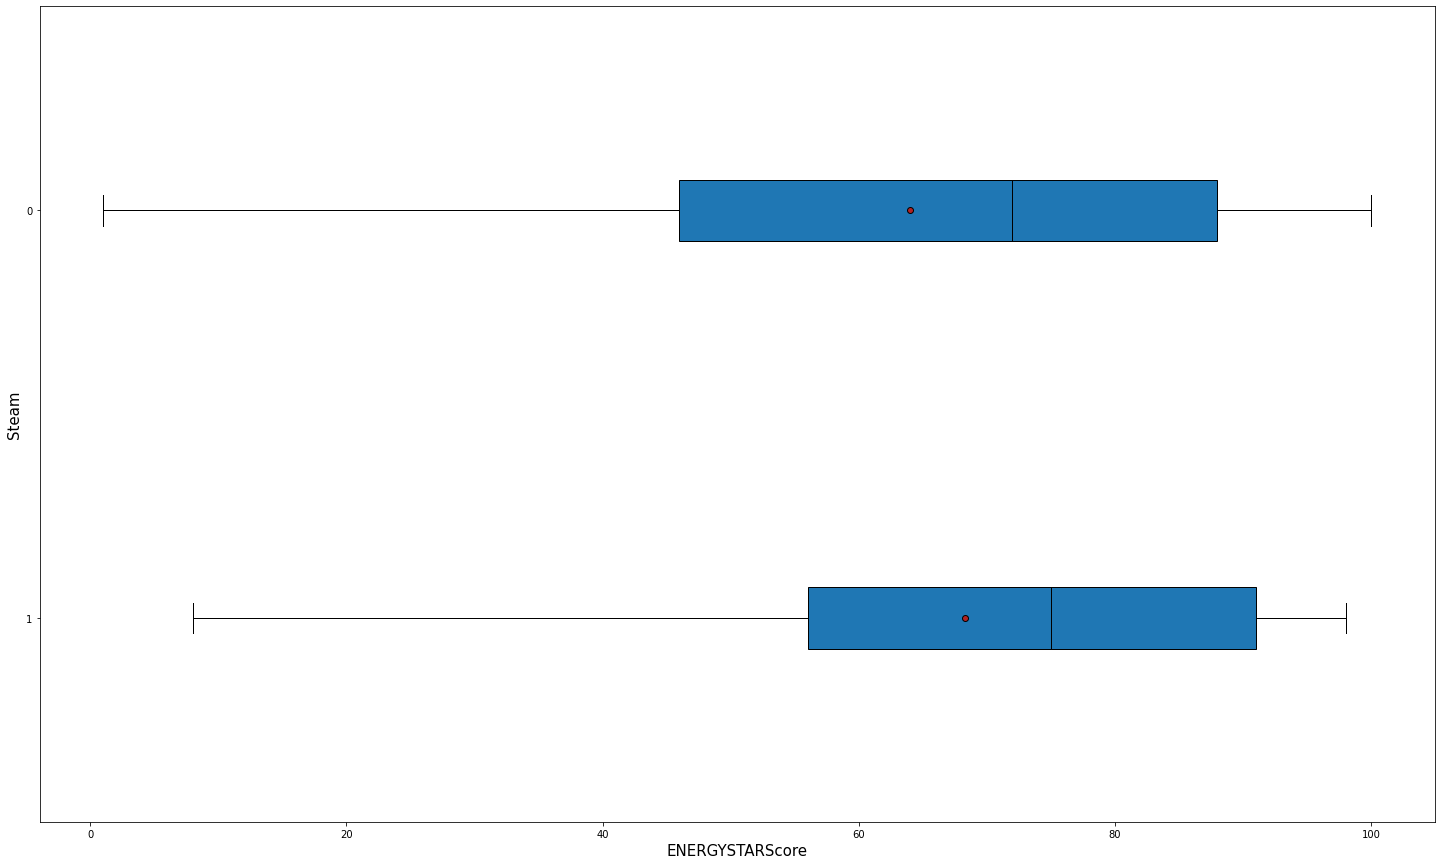

stat=1.489, p=0.223
Les variables sont indépendantes (H0 n'est pas rejetée)
   Source            SS    DF           MS         F     p-unc       np2
0   Steam    1207.40162     1  1207.401620  1.489227  0.222611  0.001422
1  Within  848051.90277  1046   810.757077       NaN       NaN       NaN


In [191]:
# Test d'indépendance entre 'ENERGYSTARScore' et 'Steam'

anova(df_build_STARSCORE, 'ENERGYSTARScore', 'Steam') 

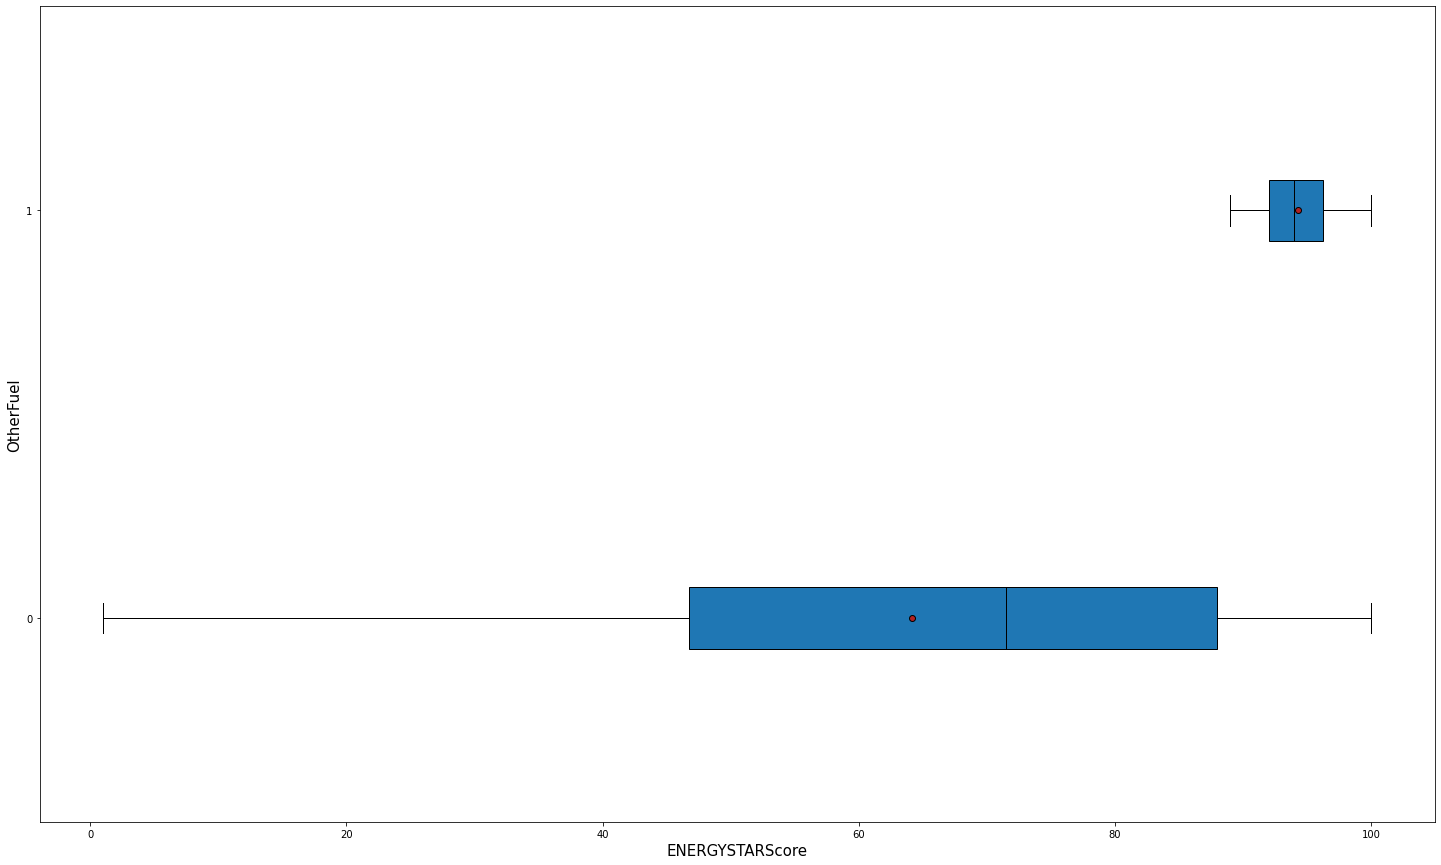

stat=4.462, p=0.035
Les variables sont corrélées (H0 est rejetée)
      Source             SS    DF           MS         F     p-unc       np2
0  OtherFuel    3607.588872     1  3607.588872  4.462284  0.034888  0.004248
1     Within  845651.715517  1046   808.462443       NaN       NaN       NaN


In [192]:
# Test d'indépendance entre 'ENERGYSTARScore' et 'OtherFuel'

anova(df_build_STARSCORE, 'ENERGYSTARScore', 'OtherFuel') 

### Sauvegarder le data set final avec l'EnergieStarScore comme une feature

In [193]:
df_build_STARSCORE.to_csv('df_build_STARSCORE.csv', encoding='utf8')